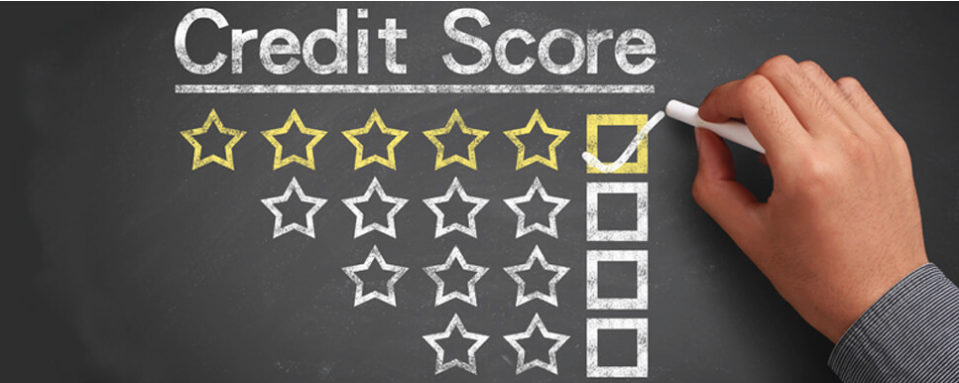

### KH.ABEDI
# 
# 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans

In [83]:
df = pd.read_csv('4_5810145845797981144.csv')
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

 
### We need to set clusters, in order to find a good strategy.The sample Dataset summarizes the usage behavior of about 9000 active credit card holders .there are 18 feauters that describe costomer behavior:
##### CUST_ID : شماره شناسایی صاحب حساب (Categorical)
##### BALANCE :  (0 -19k) numerical; مانده حساب 
##### BALANCE_FREQUENCY :  numerical; 1 =frequently updated, 0 = not frequently updated) ; میزان فراوانی به روز شدگی مانده حساب 
##### PURCHASES : (0 - 49k) مقدار خریدهای انجام شده از حساب 
##### ONEOFFPURCHASES : (0 - 40.8k) خریدهای یکباره
##### INSTALLMENTS_PURCHASES : (0 - 22.5k)خرید اقساطی
##### CASH_ADVANCE :  (0 - 47.1k) پول نقدی که به عنوان وام می توان از کارت برداشت کرد. در واقع بانک به شما پیش پرداخت می کند  و بعدا باید باز پرداخت نمایید 
##### PURCHASES_FREQUENCY : (0 -1) numerical; دفعات خرید
##### ONEOFF_PURCHASES_FREQUENCY : (0 - 1) numerical; دفعات خرید یکباره
##### PURCHASES_INSTALLMENTS_FREQUENCY : (0 - 1) numerical; دفعات خرید اقساطی
##### CASH_ADVANCE_FREQUENCY : (0 - 1.5) numerical; فراوانی پیش پرداخت نقدی بانک
##### CASH_ADVANCE_TRX : (0 - 123) numerical; تعداد تراکنشهای انجام شده در پیش پرداخت
##### PURCHASES_TRX : (0 - 358) numerical;  تعداد تراکنشهای خریدها
##### CREDIT_LIMIT: (50 - 30.0k) numerical; محدودیت اعتبار
##### PAYMENTS : (0 -50.7k) numerical;    مبلغ پرداختی توسط صاحب حساب
##### MINIMUM_PAYMENTS : (0.02 - 76.4k) numerical; حداقل پرداختی
##### PRC_FULL_PAYMENT : (0 - 1) numerical;  درصد پرداخت کاملتوسط مدت زمان خدمت کارت اعتباری
##### TENURE : (6 - 12) numerical; حق تصدی سرویس کارت، برای صاحب حساب
##### Cluster : ?


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [85]:
# dropping CUST_ID column
df.drop('CUST_ID',axis=1,inplace = True)

In [86]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

# 
### noise detection plots

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [88]:
# check duplicate entries in the dataset
df.duplicated().sum()

0

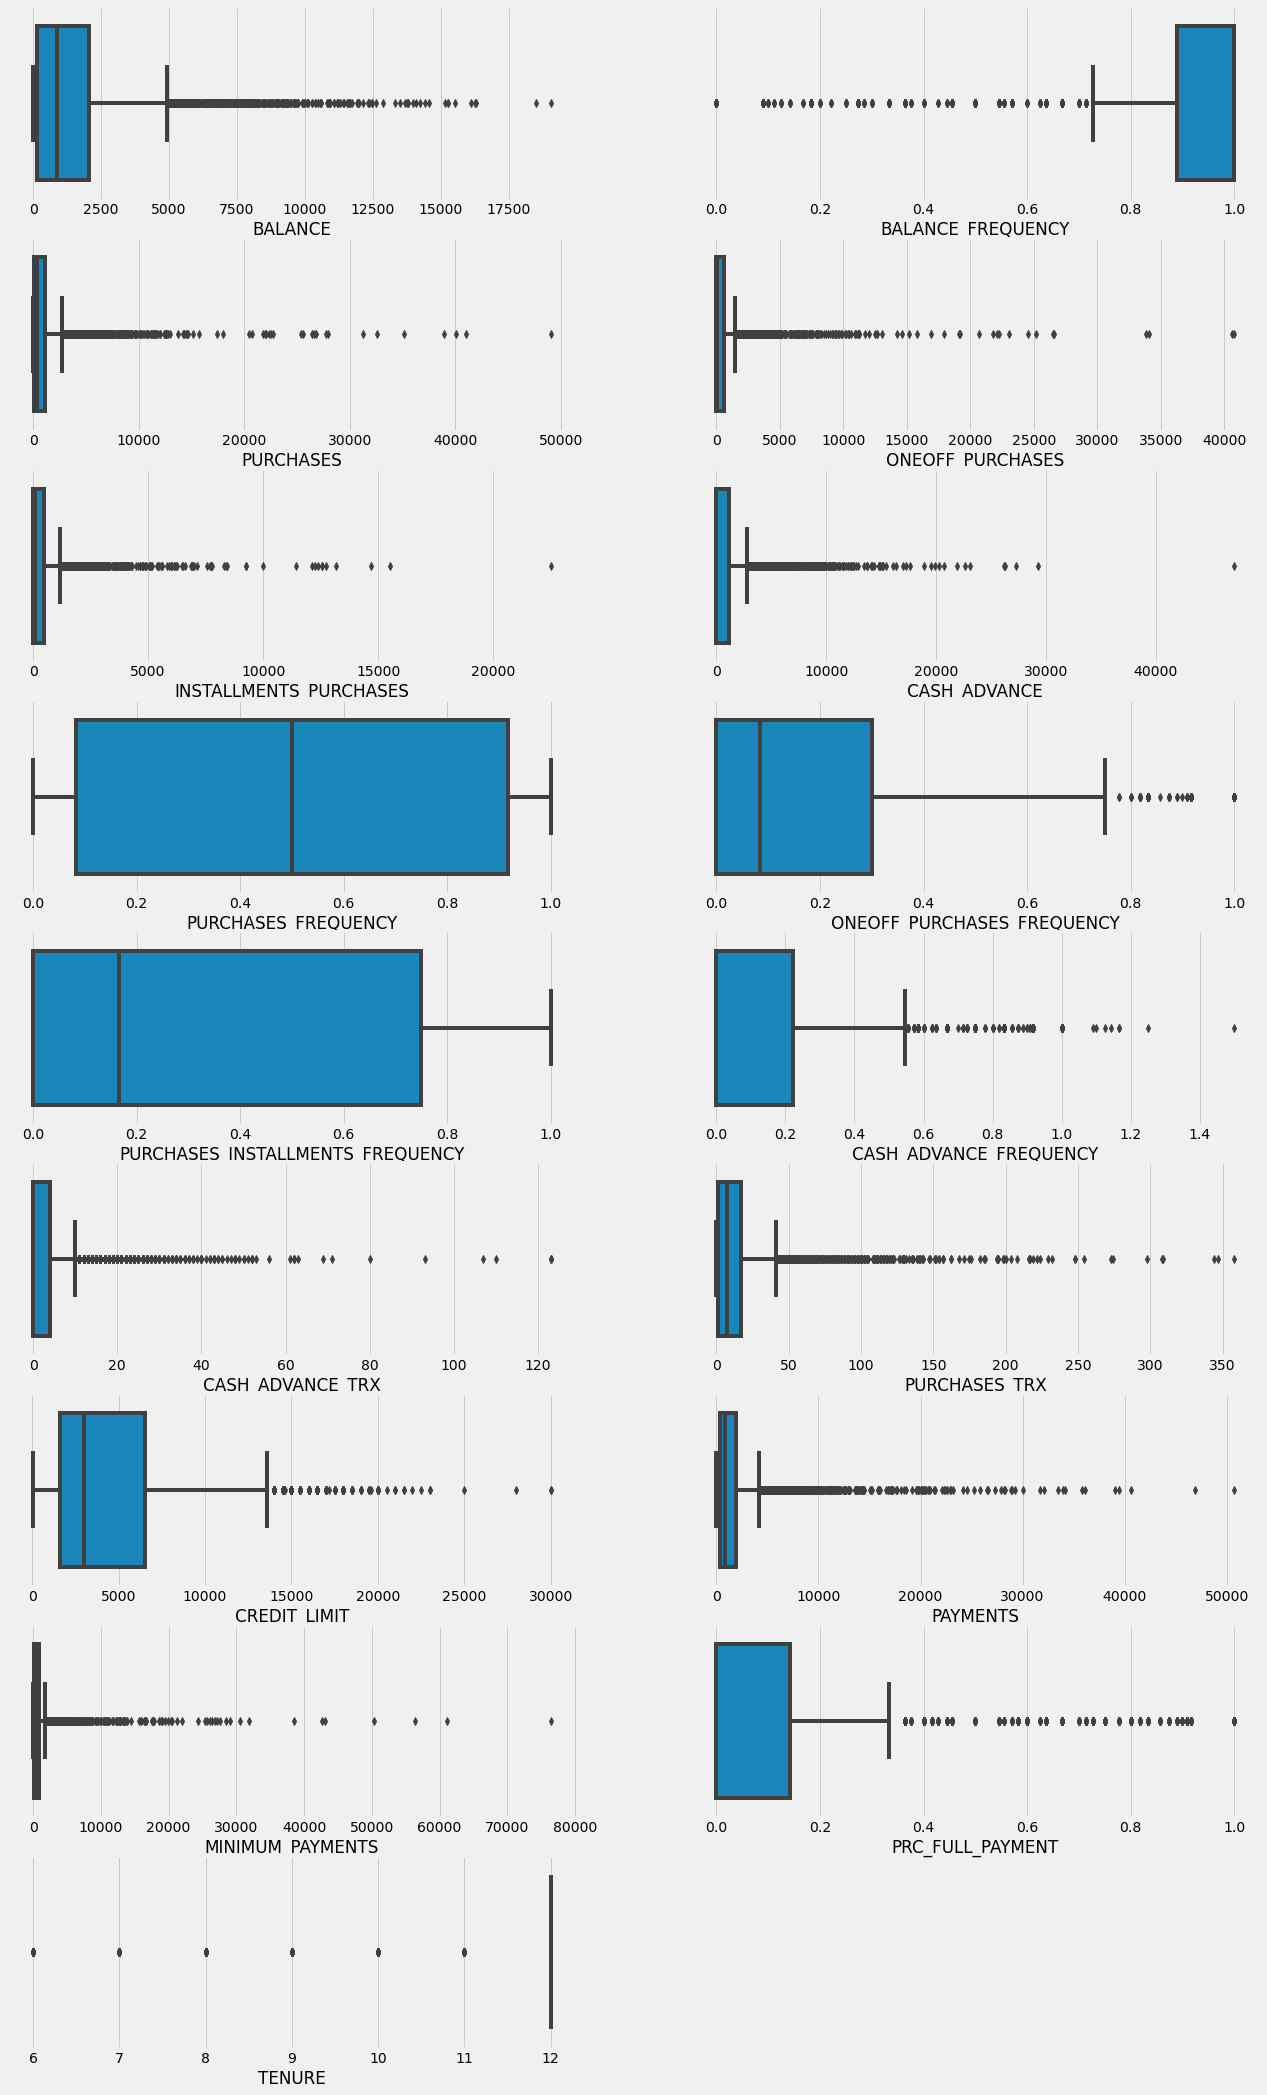

In [89]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    ax = plt.subplot(9, 2, i+1)
    sns.boxplot(df[col])
    plt.xlabel(col)
        
plt.show()

## all those far points aren't noise because they are rational
# 

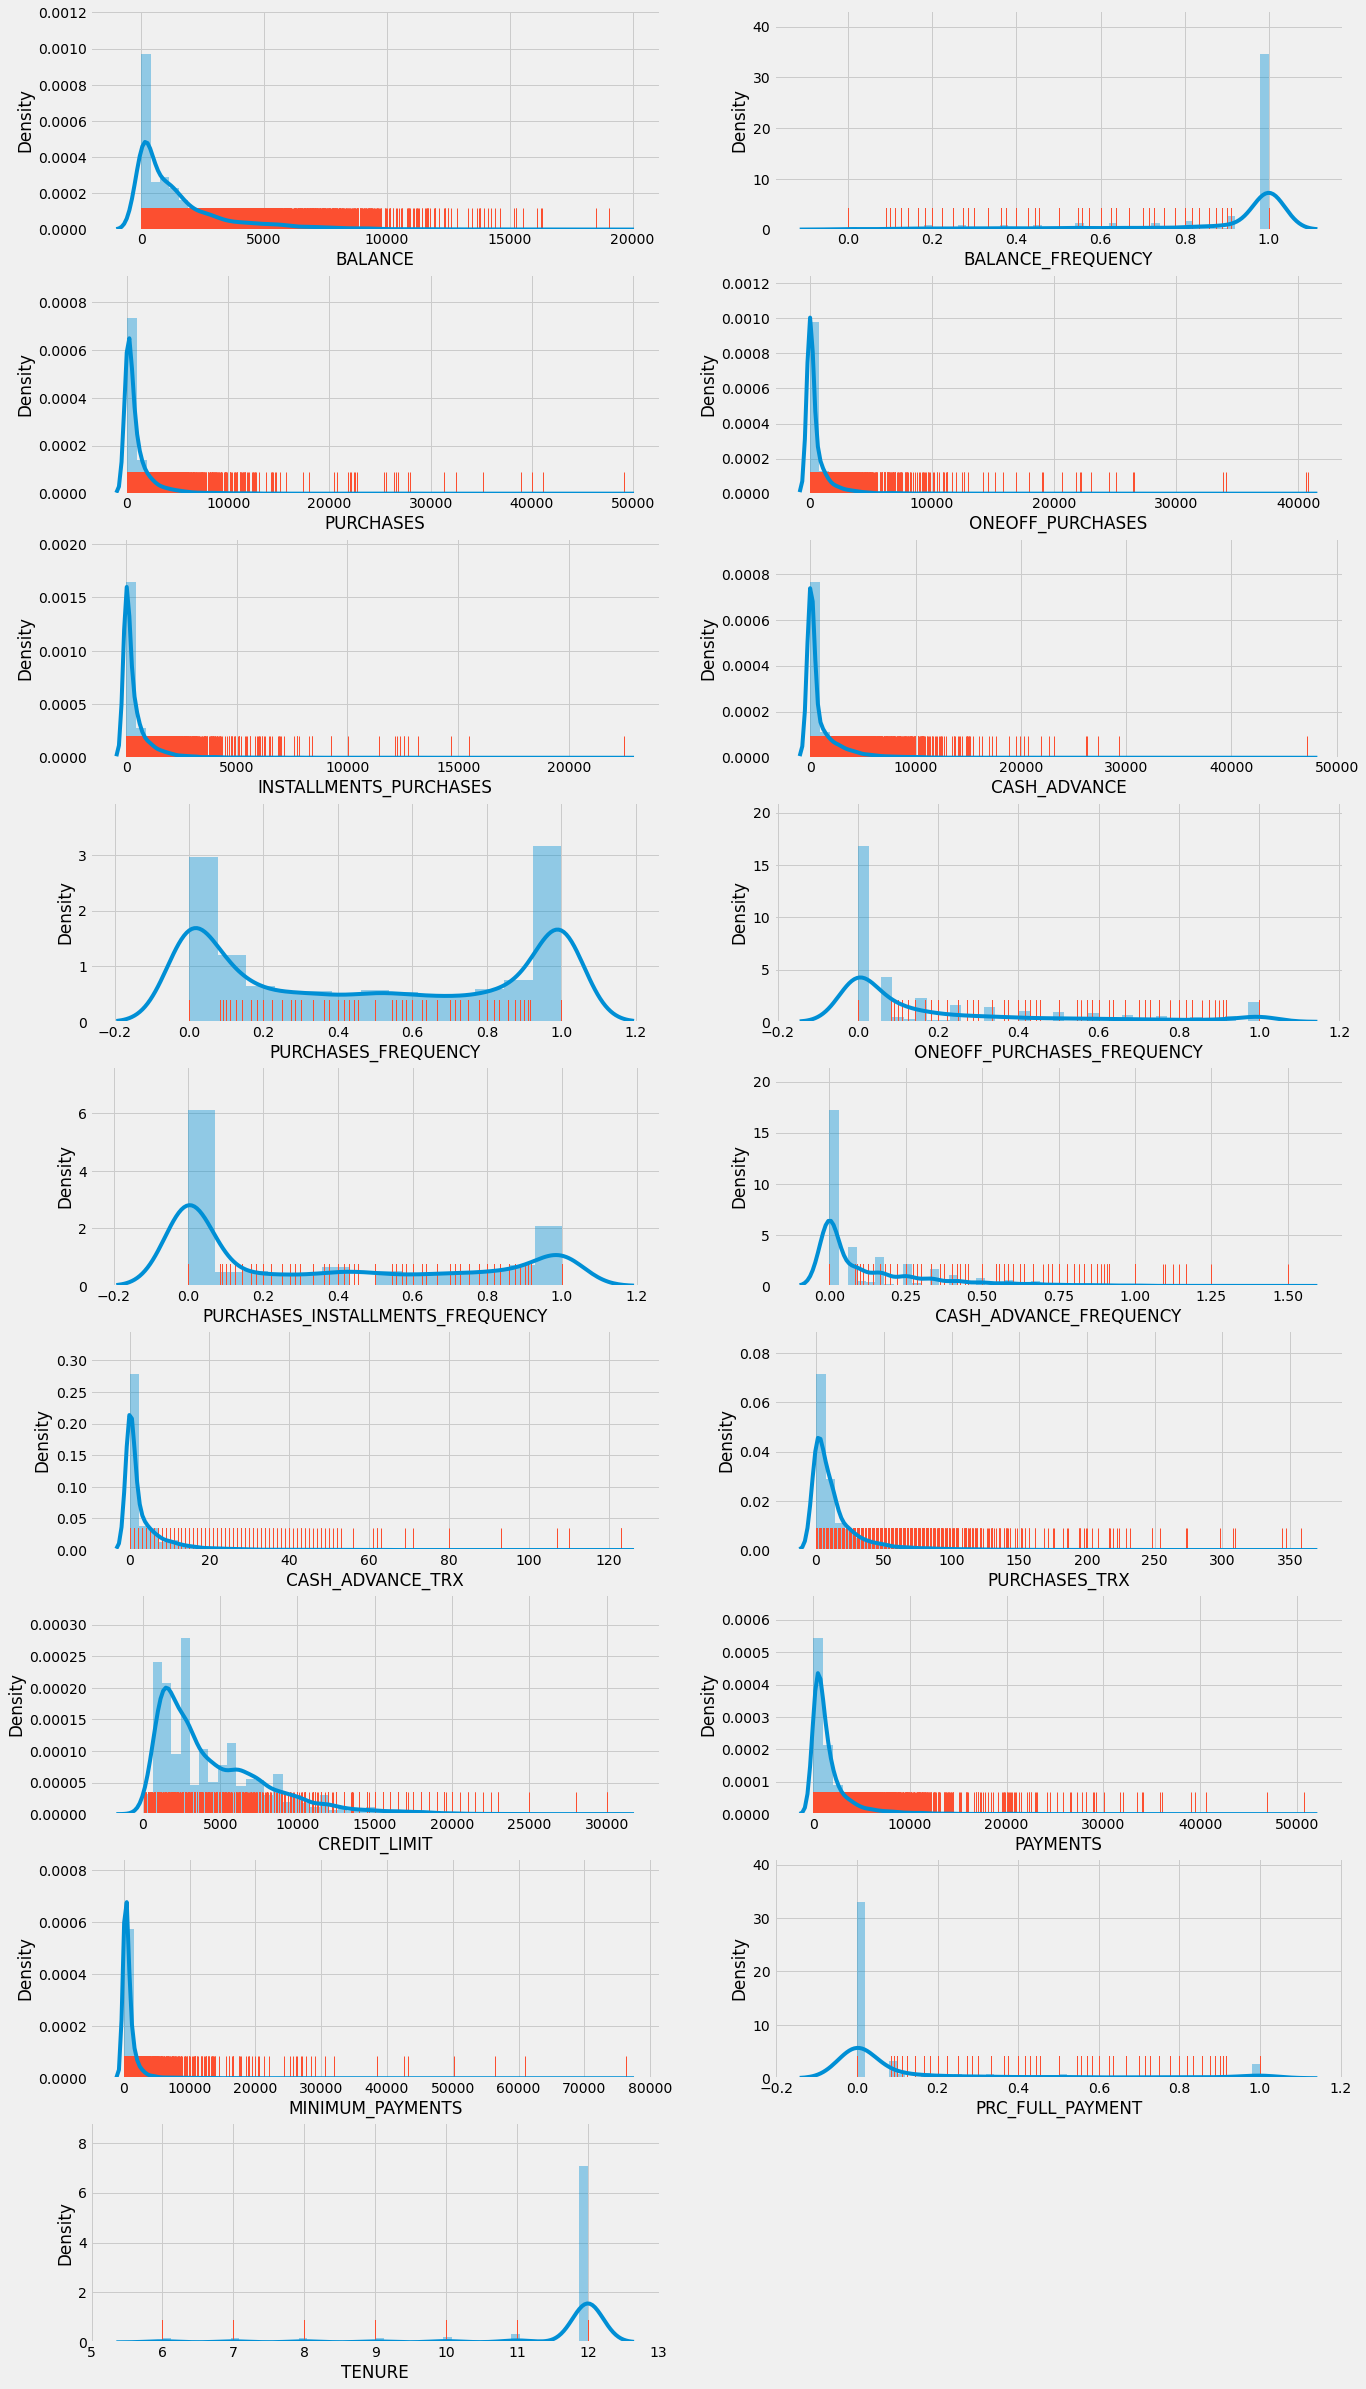

In [90]:
i=1
plt.figure(figsize= (20,40))
for col in df.columns:
    plt.subplot(9,2,i)
    sns.distplot(df[col])#This function combines the matplotlib hist function with the seaborn kdeplot()
    sns.rugplot(df[col], height=.1)#This function is intended to complement other plots by showing the location of individual observations
    i=i+1
plt.show()

### There is a lot of skewness . it shows lots of outliers

# 
### missing values

In [91]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [92]:
def show_null(data):
    sum_null = data.isnull().sum().sort_values(ascending = False)
    count_percent = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([sum_null, count_percent], axis=1, keys = ['sum_null', 'count_percent'])

In [93]:
show_null(df).style.background_gradient(cmap = 'Spectral')

# 
## dropping missing values

In [94]:
# missing values aren't alot, so i drop them.
df.dropna(inplace = True)
df.reset_index( inplace = True)
df.drop('index',axis=1,inplace = True)
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3      817.714335           1.000000      16.00             16.00   
4     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8631     5.871712           0.500000      20.90             20.90   
8632    28.493517           1.000000     291.12              0.00   
8633    23.398673           0.833333     144.40              0.00   
8634    13.457564           0.833333       0.00              0.00   
8635   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      0.000000             0.083333   
4                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8631                    0.00      0.000000             0.166667   
8632                  291.12      0.000000             1.000000   
8633                  144.40      0.000000             0.833333   
8634                    0.00     36.558778             0.000000   
8635                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8631                    0.166667                          0.000000   
8632                    0.000000                          0.833333   
8633                    0.000000                          0.666667   
8634                    0.000000                          0.000000   
8635                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8631                0.000000                 0              1         500.0   
8632                0.000000                 0              6        1000.0   
8633                0.000000                 0              5        1000.0   
8634                0.166667                 2              0         500.0   
8635                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3      678.334763        244.791237          0.000000      12  
4     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8631    58.644883         43.473717          0.000000       6  
8632   325.594462         48.886365          0.500000       6  
8633    81

# 
## ReAnalysis

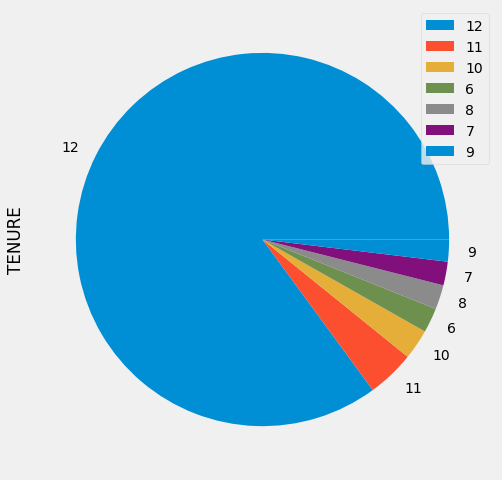

In [95]:
df_TENURE=pd.DataFrame(df['TENURE'].value_counts())
plot = df_TENURE.plot.pie(y='TENURE', figsize=(8, 8))

نمودار بالا نشان می دهد 12 ماه بیشترین میزان انتخاب زمان سرویس دهی کارت ، توسط کاربران است
# 

<AxesSubplot:xlabel='TENURE', ylabel='CREDIT_LIMIT'>

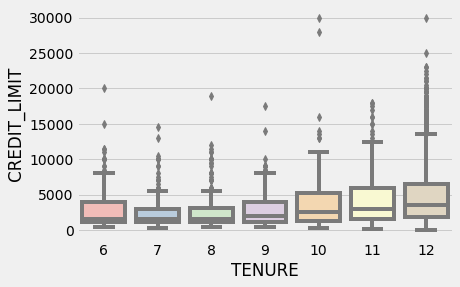

In [96]:
sns.boxplot(x = 'TENURE', y = 'CREDIT_LIMIT', data = df,palette='Pastel1')

نمودار بالا نشان می دهد محدودیت اعتبار کارت با هر بازه سرویس بیشتر بین صفر تا 5000 قرار دارد
# 

<AxesSubplot:xlabel='TENURE', ylabel='BALANCE_FREQUENCY'>

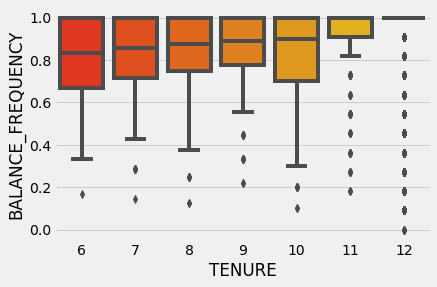

In [97]:
sns.boxplot(x = 'TENURE', y = 'BALANCE_FREQUENCY', data = df,palette='autumn')

کاربرانی که شش ماه سرویس دهی را انتخاب می کنند بیشترین میزان آپدیت شدن مانده را دارند

کاربرانی که دوازده  ماه سرویس دهی را انتخاب می کنند کمترین میزان آپدیت شدن مانده را دارند

# 

<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='PRC_FULL_PAYMENT'>

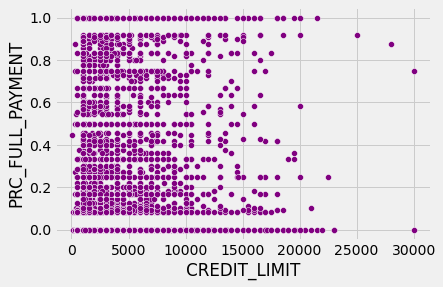

In [98]:
sns.scatterplot(x='CREDIT_LIMIT', y='PRC_FULL_PAYMENT', data=df,color='purple')

کاربرانی که تاریخ اعتبار کارت آنها کمتر است بیشتر پرداختهایشان را بصورت کامل انجام می دهند

# 

<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

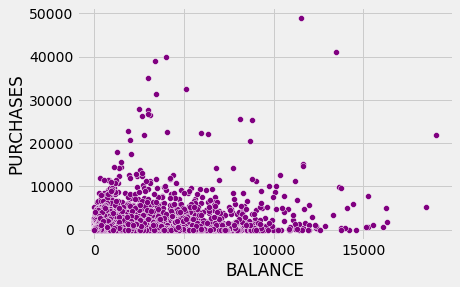

In [99]:
sns.scatterplot(x='BALANCE', y='PURCHASES', data=df,color='purple')

نمودار بالا نشان می دهد تقریبا افرادی که مانده حساب کمتری دارند از بقیه ولخرج تر هستند

# 

<AxesSubplot:>

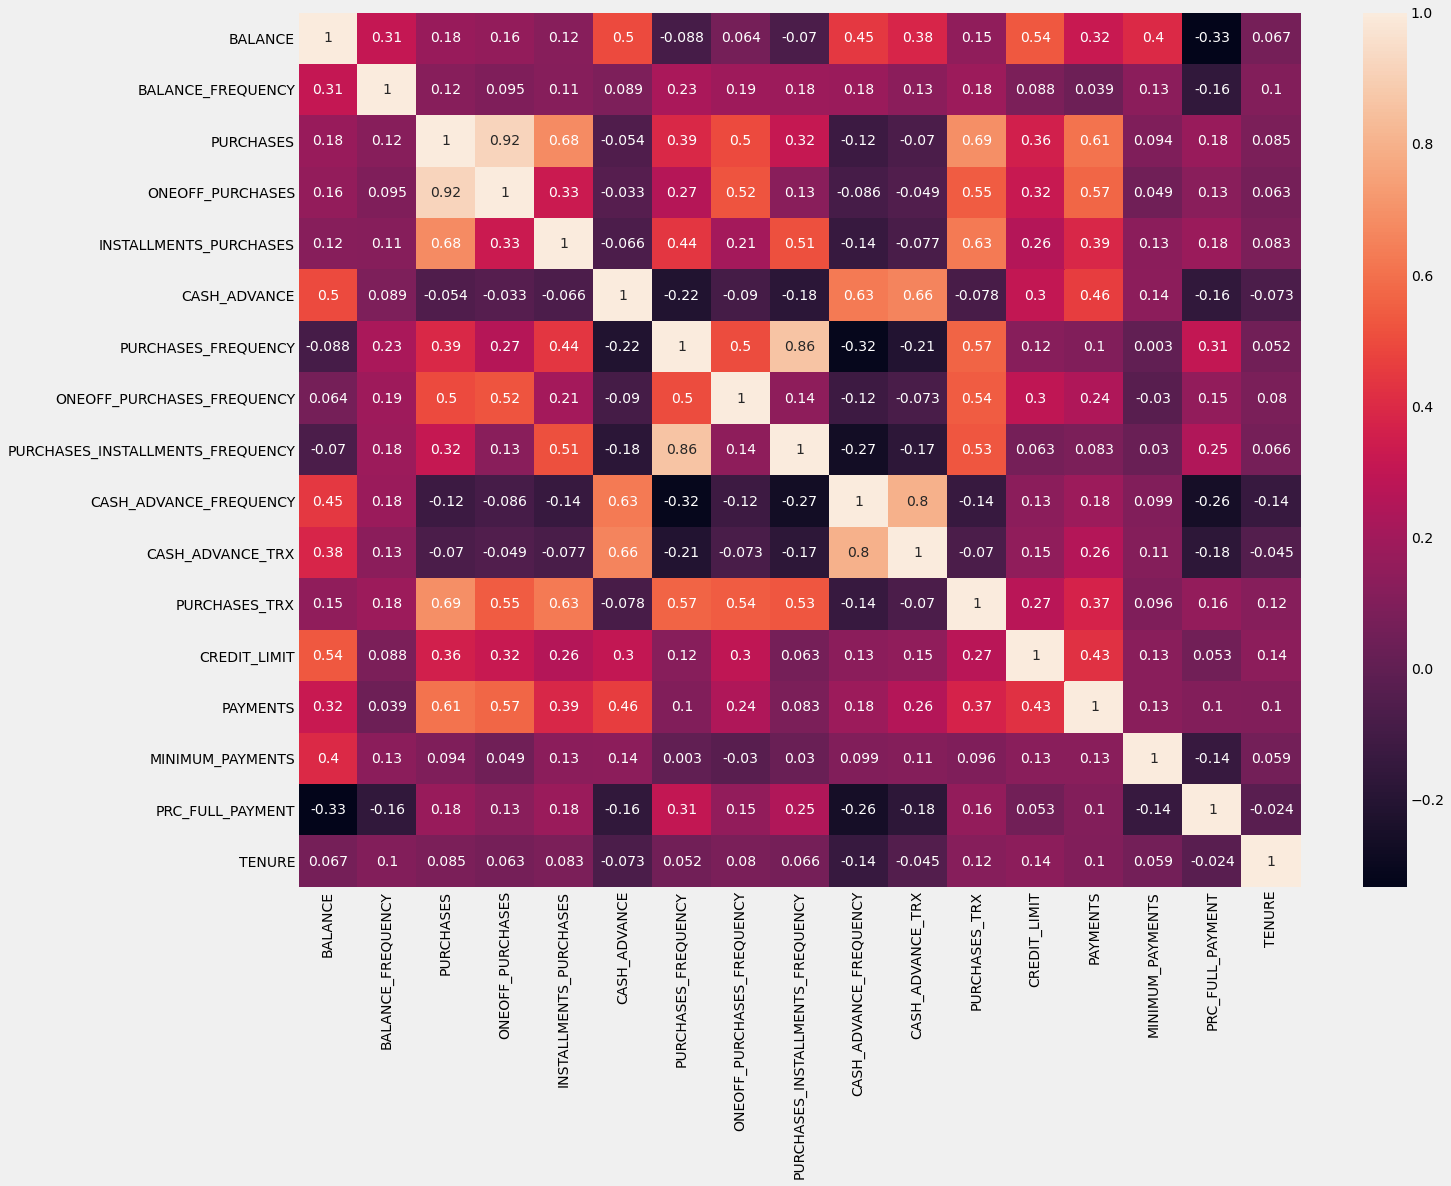

In [100]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot = True)

مشاهدات:

   مقدار خریدهای انجام شده و خریدهای یکباره بیشترین میزان کرولیشن را دارند(92%)
   
   دفعات خرید و دفعاات خرید اقساطی کرولیشن بالا دارند (86%)
   
   تعداد تراکنشهای انجام شده در پیش پرداخت و و فراوانی پیش پرداخت نقدی بانک داری کرولیشن (80%) هستند

# 
## Outlier Detection
### techniques that were developed to identify outliers 

Each of these techniques has multiple parameters and, hence, a data point labeled as an outlier in one algorithm, may not be an outlier to another :

1-Distance-based : 
They are rare data points far away from regular data points and generally do not form a tight cluster. In multidimensional Cartesian space they are distant from other data points, as shown below. If the average distance of the nearest N neighbors is measured, the outliers will have a higher value than other normal data points.
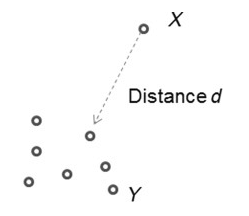

2-Density-based : The density of a data point in a neighborhood is inversely related to the distance to its neighbors. Outliers occupy low-density areas while the regular data points congregate in high-density areas. This is derived from the fact that the relative occurrence of an outlier is low compared with the frequency of normal data points.

3-Distribution-based : Outliers are the data points that have a low probability of occurrence and they occupy the tail ends of the distribution curve.

4-Clustering: Outliers by definition are not similar to normal data points in a dataset. They are rare data points far away from regular data points and generally do not form a tight cluster. Since most of the clustering algorithms have a minimum threshold of data points to form a cluster, the outliers are the lone data points that are not clustered. Even if the outliers form a cluster, they are far away from other clusters.

# 





# 
# Making Model with outliers
Suppose there are set of data points that need to be grouped into several parts or clusters based on their similarity. In machine learning, this is known as Clustering.
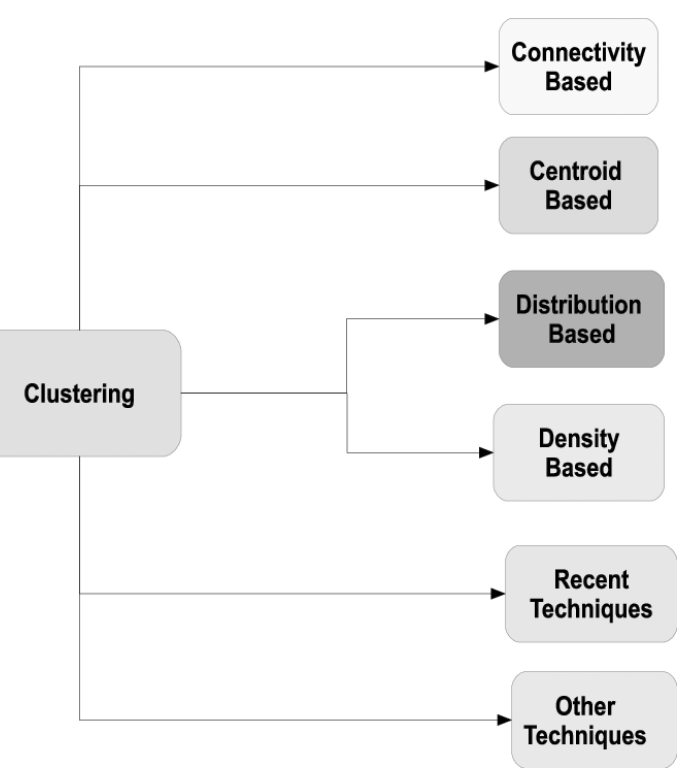 


In [101]:
#normalize all features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# 
# 
## K-Mean
K-means clustering tries to minimize distances within a cluster and maximize the distance between different clusters.

#### k-mean steps:
1-Randomly select centroids (center of cluster) for each cluster.

2-Calculate the distance of all data points to the centroids.

3-Assign data points to the closest cluster.

4-Find the new centroids of each cluster by taking the mean of all data points in the cluster.

5-Repeat steps 2,3 and 4 until all points converge and cluster centers stop moving.

#### Disadvantages of K-Means
Sensitive to number of clusters/centroids chosen. Even after using techniques like Elbow method, it is sometimes hard to generate good clusters.
Does not work well with outliers. Centroids can get dragged by the outliers resulting in skewed clusters.
Gets difficult in high dimensional spaces as the distance between the points increases and Euclidean distance diverges (converges to a constant value).
Gets slow as the number of dimensions increases.

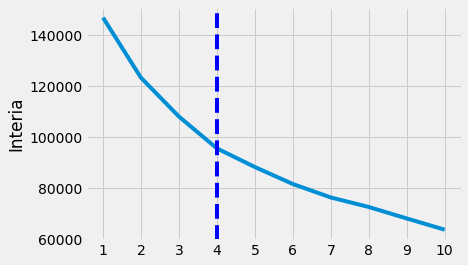

In [102]:
List = []
for k in range(1,11):#this range is optional
    kmeans = KMeans(n_clusters=k, init= "random",max_iter = 300, random_state = 1, n_init = 10) 
    kmeans.fit(scaled_features)
    List.append(kmeans.inertia_)
from kneed import KneeLocator
kl = KneeLocator(range(1,11), List, curve='convex', direction='decreasing')
kl.elbow
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),List)
plt.xticks(range(1,11))
plt.ylabel("Interia")
plt.axvline(x=kl.elbow, color='b', label='axvline - full height', ls='--')
plt.show()    

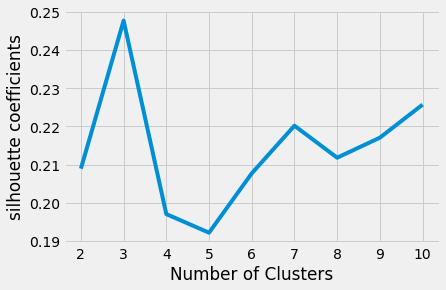

In [103]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k,init= "random", random_state = 1)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()

In [104]:
max(silhouette_coefficients)

0.24771296656343036

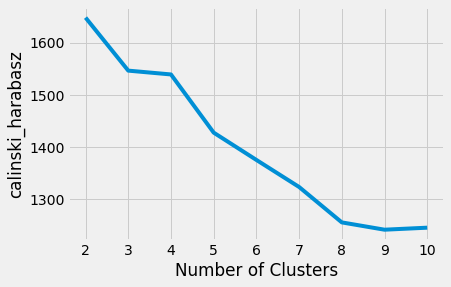

In [105]:
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score
calinski_harabaz = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k,init= "random", random_state = 1)
    kmeans.fit(scaled_features)
    metrics.calinski_harabasz_score(scaled_features, kmeans.labels_)
    calinski_harabaz.append(metrics.calinski_harabasz_score(scaled_features, kmeans.labels_))
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()

In [106]:
max(calinski_harabaz)

1647.9274472793193

### So 3 cluster with silhouette score = 0.24771296656343036,  is the best for k-mean modeling

In [107]:
kmeans = KMeans(n_clusters=3,init= "random", random_state = 1)
kmeans.fit(scaled_features)
labels = kmeans.labels_

In [108]:
# view cluster centers (normalized centers, here ther are negative numbers)
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0  1.154890          0.313594 -0.294405        -0.210648   
1  0.296491          0.419350  1.500378         1.256183   
2 -0.365204         -0.169820 -0.235518        -0.206601   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.309014     1.380620           -0.654419   
1               1.238339    -0.251128            1.131288   
2              -0.177040    -0.310313           -0.063984   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.314143                        -0.561796   
1                   1.537992                         0.949828   
2                  -0.238176                        -0.050477   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               1.560243         1.343339     -0.374317     0.604521   
1              -0.367531        -0.256635      1.654796     0.881540   
2              -0.333226        -0.299371     -0.246725    -0.342619   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0  0.444150         0.380088        -0.425511 -0.141005  
1  0.816759         0.164283         0.472497  0.295974  
2 -0.286983        -0.134102         0.013254 -0.024675

In [109]:
# viewing real centers (now we dont see negative number)
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY    PURCHASES ONEOFF_PURCHASES  \
0  4021.238224          0.960164   387.464196       250.126089   
1  2222.507896          0.982128  4276.725686      2720.577565   
2   835.958973          0.859766   515.070683       256.941644   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             137.418307  3922.933584            0.233415   
1            1556.638317   461.448921            0.949929   
2             258.463445   335.898254            0.470327   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.111655                         0.145186   
1                   0.667362                         0.746918   
2                   0.134447                         0.348727   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.452430        12.599222      5.608301  6734.049640   
1               0.063444         1.540033     56.699346  7747.671569   
2               0.070366         1.244634      8.820954  3268.436727   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0  3076.795120      1766.037311         0.033245  11.349546  
1  4160.953030      1254.054215         0.299283  11.922386  
2   949.459673       546.157682         0.163230  11.502044

In [110]:
#adding cluster column to dataframe
df_cluster_with_kmean = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_kmean

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3      817.714335           1.000000      16.00             16.00   
4     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8631     5.871712           0.500000      20.90             20.90   
8632    28.493517           1.000000     291.12              0.00   
8633    23.398673           0.833333     144.40              0.00   
8634    13.457564           0.833333       0.00              0.00   
8635   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      0.000000             0.083333   
4                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8631                    0.00      0.000000             0.166667   
8632                  291.12      0.000000             1.000000   
8633                  144.40      0.000000             0.833333   
8634                    0.00     36.558778             0.000000   
8635                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8631                    0.166667                          0.000000   
8632                    0.000000                          0.833333   
8633                    0.000000                          0.666667   
8634                    0.000000                          0.000000   
8635                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8631                0.000000                 0              1         500.0   
8632                0.000000                 0              6        1000.0   
8633                0.000000                 0              5        1000.0   
8634                0.166667                 2              0         500.0   
8635                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        2  
1     4103.032597       1072.340217          0.222222      12        0  
2      622.066742        627.284787          0.000000      12        2  
3      678.334763        244.791237          0.000000      12        2  
4     1400.057770       2407.246035          0.000000      12        2  
...           ...               ...               ...     ...      ...  
8631    58.644883         43.473717          0.000000       6        2  
86

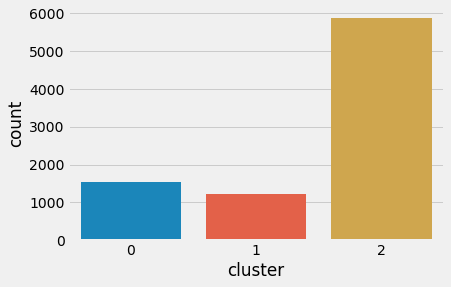

In [111]:
# counting number of clusters
sns.countplot(x=df_cluster_with_kmean.cluster)
plt.show()

#### most of people are grouped in cluster 2
### 

توابعی که در زیر نوشته شده است از درخت تصمیم استفاده می کند تا محدوده فیچرهای تاثیر گذار در نحوی تشکیل کلاسترها را بیابیم.این محدوده را در یک دیتا فریم نشان داده و از آن برای تفسیر کلاسها استفاده می کنیم

In [112]:
# interpreting clusters with decision tree
from sklearn.tree import _tree, DecisionTreeClassifier
from IPython.display import display, HTML

def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

def get_class_rules(tree: DecisionTreeClassifier, feature_names: list):
  inner_tree: _tree.Tree = tree.tree_
  classes = tree.classes_
  class_rules_dict = dict()

  def tree_dfs(node_id=0, current_rule=[]):
    # feature[i] holds the feature to split on, for the internal node i.
    split_feature = inner_tree.feature[node_id]
    if split_feature != _tree.TREE_UNDEFINED: # internal node
      name = feature_names[split_feature]
      threshold = inner_tree.threshold[node_id]
      # left child
      left_rule = current_rule + ["({} <= {})".format(name, threshold)]
      tree_dfs(inner_tree.children_left[node_id], left_rule)
      # right child
      right_rule = current_rule + ["({} > {})".format(name, threshold)]
      tree_dfs(inner_tree.children_right[node_id], right_rule)
    else: # leaf
      dist = inner_tree.value[node_id][0]
      dist = dist/dist.sum()
      max_idx = dist.argmax()
      if len(current_rule) == 0:
        rule_string = "ALL"
      else:
        rule_string = " and ".join(current_rule)
      # register new rule to dictionary
      selected_class = classes[max_idx]
      class_probability = dist[max_idx]
      class_rules = class_rules_dict.get(selected_class, [])
      class_rules.append((rule_string, class_probability))
      class_rules_dict[selected_class] = class_rules
    
  tree_dfs() # start from root, node_id = 0
  return class_rules_dict

def cluster_report(data: pd.DataFrame, clusters, min_samples_leaf=50, pruning_level=0.01):
    # Create Model
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, ccp_alpha=pruning_level)
    tree.fit(data, clusters)
    
    # Generate Report
    feature_names = data.columns
    class_rule_dict = get_class_rules(tree, feature_names)

    report_class_list = []
    for class_name in class_rule_dict.keys():
        rule_list = class_rule_dict[class_name]
        combined_string = ""
        for rule in rule_list:
            combined_string += "[{}] {}\n\n".format(rule[1], rule[0])
        report_class_list.append((class_name, combined_string))
        
    cluster_instance_df = pd.Series(clusters).value_counts().reset_index()
    cluster_instance_df.columns = ['class_name', 'instance_count']
    report_df = pd.DataFrame(report_class_list, columns=['class_name', 'rule_list'])
    report_df = pd.merge(cluster_instance_df, report_df, on='class_name', how='left')
    pretty_print(report_df.sort_values(by='class_name')[['class_name', 'instance_count', 'rule_list']])
    
cluster_report(df,df_cluster_with_kmean.cluster,min_samples_leaf=20,pruning_level=0.05)

در این قسمت من مستقیمادرخت تصمیم را رسم می کنم تا بتوانم آنرا بهتر ببینم و از آن استفاده می کنم و آن را بر روی دیتای کلاستر بندی شده اعمال می کنم تا بتوانم با اهمیت ترین فیچرها را بیابم.اگر درخت با عمق دو را رسم کنم و تست سایز را خیلی کم انتخاب کنم با اهمیت ترین فیچر در ریشه و بعد از آن فیچرهای فرزندان در ترتیب اهمیت قرار دارند. فیچرهای با اهمیت برای ترسیم مناسب هستند و همچنین برای تفسیر کلاسترها به ما کمک می کنند 

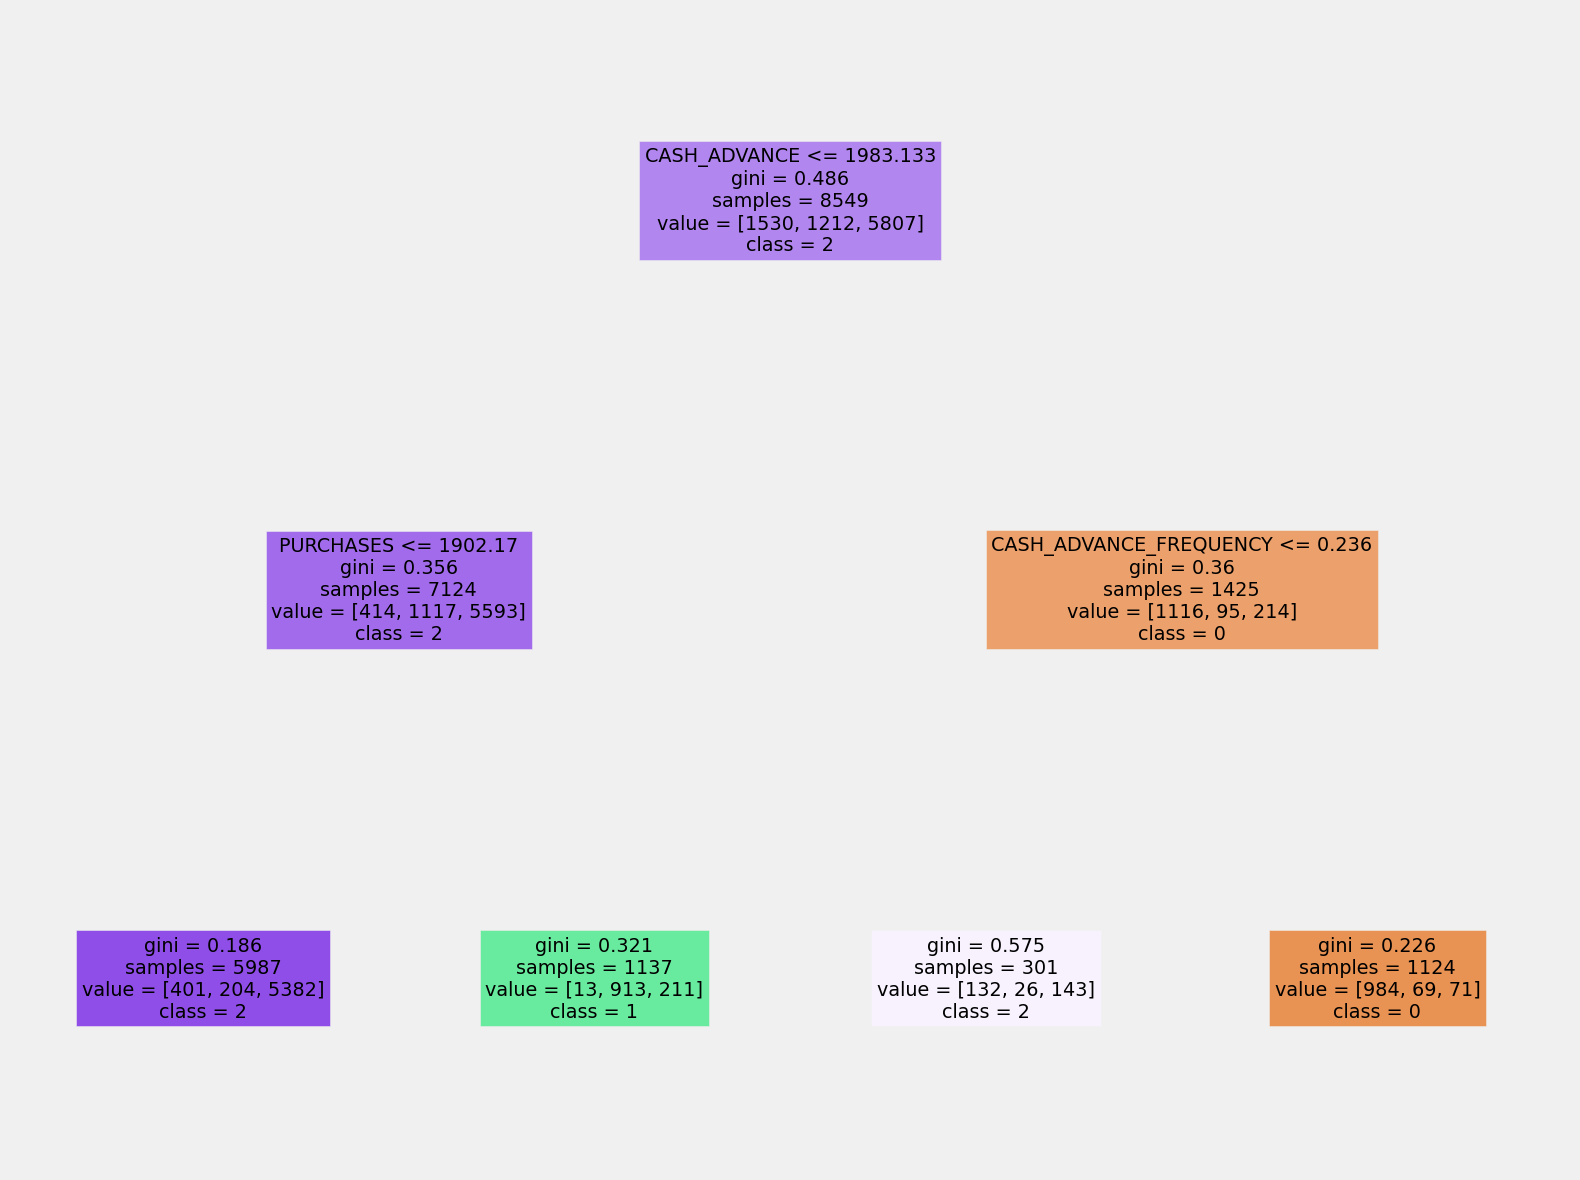

In [113]:
##visualization desision tree to find features to interpret classes
from sklearn import tree
from sklearn.model_selection  import train_test_split
X = df_cluster_with_kmean. drop('cluster', axis =1)
y = df_cluster_with_kmean['cluster']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.01,random_state=1)
clf = DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
feature_names = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY',
                'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX',
                'CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
target_names =['0','1','2']
fig = plt.figure(figsize=(25,20))
plot = tree.plot_tree(clf,
                     feature_names = feature_names,
                     class_names = target_names,
                     filled = True)
fig.savefig("Tree1.png")

تفسیر کلاسها با توجه به درخت تصمیم و جدولی که قبل از درخت تصمیم نشان دادیم 
افراد بیشتر در کلاس دو طبقه بندی می شوند

class 0:CASH_ADVANCE > 1983 and CASH_ADVANCE_FREQUENCY <= 0.261
کلاس صفر شامل 1543 نفر است که این افراد مقدار پول نقدی که به عنوان وام از حساب برداشت می کنند بیشتر از1983 است و تعداد
این وامها از 0.236 کمتر است

class 1:(CASH_ADVANCE <= 1983) and (PURCHASES > 1902)
کلاس یک شامل 1221 نفر است که این افراد پول نقدی که به عنوان وام از حساب کارت خود برداشت می کنند کمتر از 1983 است و همچنین مقدار خریدهای انجام شده از حساب آنها از 1902 بیشتر است.

class 2:(CASH_ADVANCE <= 1983) and (PURCHASES <= 1902)
کلاس 2 شامل 5872 نفر است که این افراد پول نقدی که به عنوان وام از حساب کارت خود برداشت می کنند از 1983 کمتر است و مقدار خریدهای انجام شده آنها از حساب  از 1902 کمتر است.

# 
### visualizing clusters by inversing results

[[4.02123822e+03 9.60163816e-01 3.87464196e+02 2.50126089e+02
  1.37418307e+02 3.92293358e+03 2.33414798e-01 1.11654573e-01
  1.45186308e-01 4.52429612e-01 1.25992218e+01 5.60830091e+00
  6.73404964e+03 3.07679512e+03 1.76603731e+03 3.32445298e-02
  1.13495460e+01]
 [2.22250790e+03 9.82127661e-01 4.27672569e+03 2.72057757e+03
  1.55663832e+03 4.61448921e+02 9.49928840e-01 6.67362065e-01
  7.46918408e-01 6.34438587e-02 1.54003268e+00 5.66993464e+01
  7.74767157e+03 4.16095303e+03 1.25405421e+03 2.99282523e-01
  1.19223856e+01]
 [8.35958973e+02 8.59765990e-01 5.15070683e+02 2.56941644e+02
  2.58463445e+02 3.35898254e+02 4.70326658e-01 1.34447252e-01
  3.48726931e-01 7.03659564e-02 1.24463373e+00 8.82095400e+00
  3.26843673e+03 9.49459673e+02 5.46157682e+02 1.63230193e-01
  1.15020443e+01]]


Text(15.552607579534651, 0.5, 'PURCHASES')

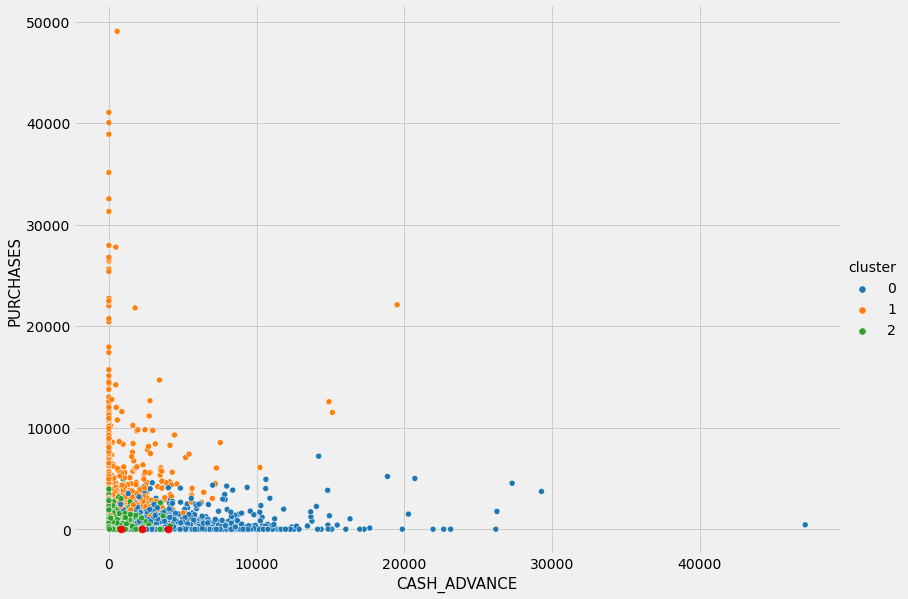

In [114]:
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)
print(centroids)


sns.relplot(data = df_cluster_with_kmean ,x='CASH_ADVANCE' , y  ='PURCHASES', hue='cluster', palette='tab10' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("CASH_ADVANCE",fontsize=15)
plt.ylabel("PURCHASES",fontsize=15)

### visualizing clusters on original data

[[4.83301557e+03 9.14620970e-01 1.05307798e+04 7.42990541e+03
  3.10103977e+03 5.43050951e+03 7.42298917e-01 5.86638699e-01
  5.97387970e-01 2.30828677e-01 9.25563910e+00 8.44135338e+01
  1.24890977e+04 1.79058694e+04 2.47407345e+03 3.29256820e-01
  1.18421053e+01]
 [3.41447675e+03 9.46527369e-01 1.59659088e+03 9.95047693e+02
  6.01860257e+02 2.10291567e+03 5.44001472e-01 3.18655410e-01
  3.89547088e-01 2.11845031e-01 5.78742250e+00 2.23711249e+01
  8.98188864e+03 2.91415852e+03 1.57581780e+03 1.36173117e-01
  1.17413640e+01]
 [8.76781202e+02 8.75999973e-01 6.16485353e+02 3.18484181e+02
  2.98313211e+02 4.98808403e+02 4.73398707e-01 1.57034592e-01
  3.56458380e-01 1.08775599e-01 2.29303443e+00 1.09024820e+01
  2.73989169e+03 1.03268251e+03 5.72760469e+02 1.64047406e-01
  1.14530024e+01]]


Text(15.552607579534651, 0.5, 'PURCHASES')

<Figure size 1080x576 with 0 Axes>

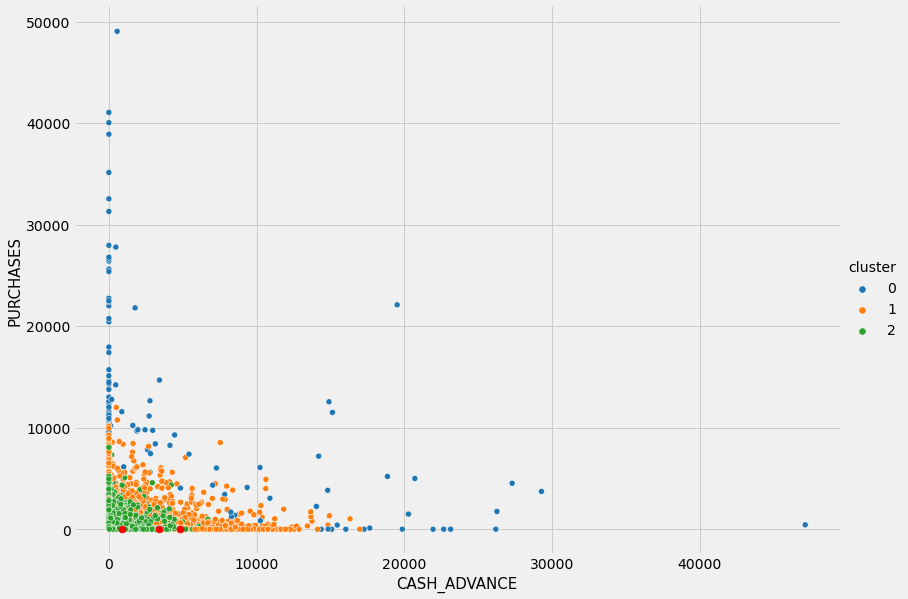

In [115]:
kmeans = KMeans(n_clusters=3,init= "random", random_state = 1).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)
plt.figure(figsize=(15,8))

df_kmean = df.copy()
df_kmean['cluster'] = kmeans.labels_
sns.relplot(data = df_kmean ,x='CASH_ADVANCE' , y  ='PURCHASES', hue='cluster', palette='tab10' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("CASH_ADVANCE",fontsize=15)
plt.ylabel("PURCHASES",fontsize=15)

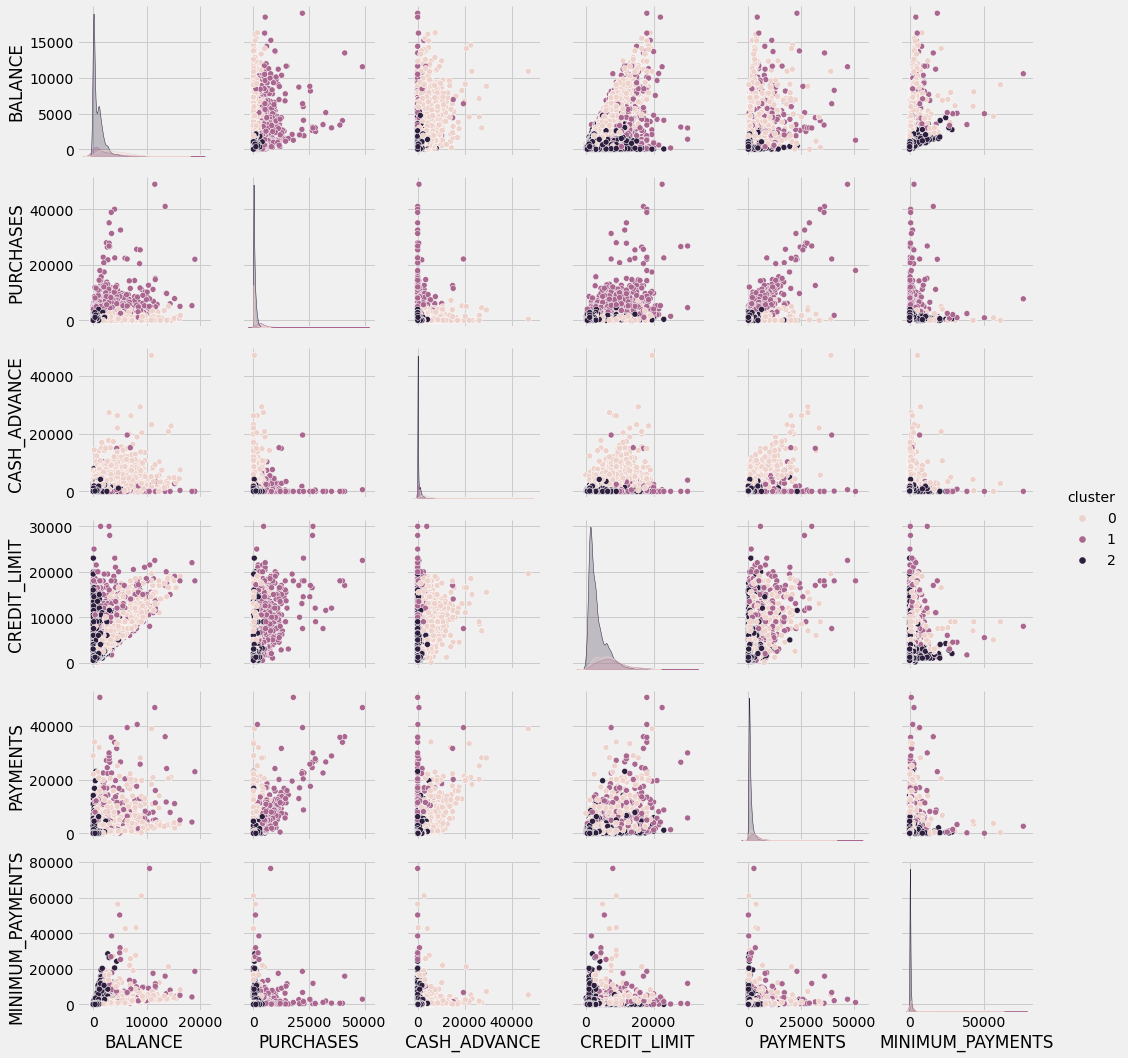

In [116]:
#در این قسمت چندین فیجر که پیوسته هستند را انتخاب می کنم تا نحوه ی کلاستربندی آنها را نیز مشاهده کنم
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","cluster"]
sns.pairplot( df_cluster_with_kmean[ best_cols ], hue="cluster")

# 
### clusteval library ( i just want to inroduce this library)
####  clusteval is Python package for unsupervised cluster evaluation. Three evaluation methods are implemented that can be used to evalute clusterings; silhouette, dbindex, and derivative 
Four clustering methods can be used: agglomerative, kmeans, dbscan and hdbscan.


In [117]:
pip install clusteval


Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLError(1, '[SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:1125)'))) - skipping



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward


  0%|                                                                                           | 0/23 [00:00<?, ?it/s]

[clusteval] >Evaluate using silhouette.


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:32<00:00,  1.42s/it]


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [10].
[clusteval] >Fin.


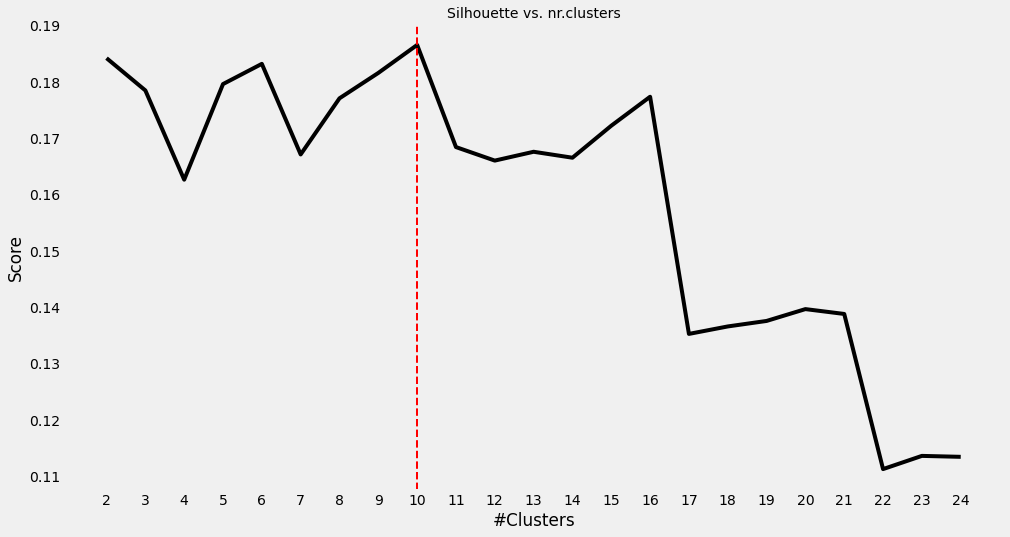

[clusteval] >Estimated number of n_clusters: 10, average silhouette_score=0.187


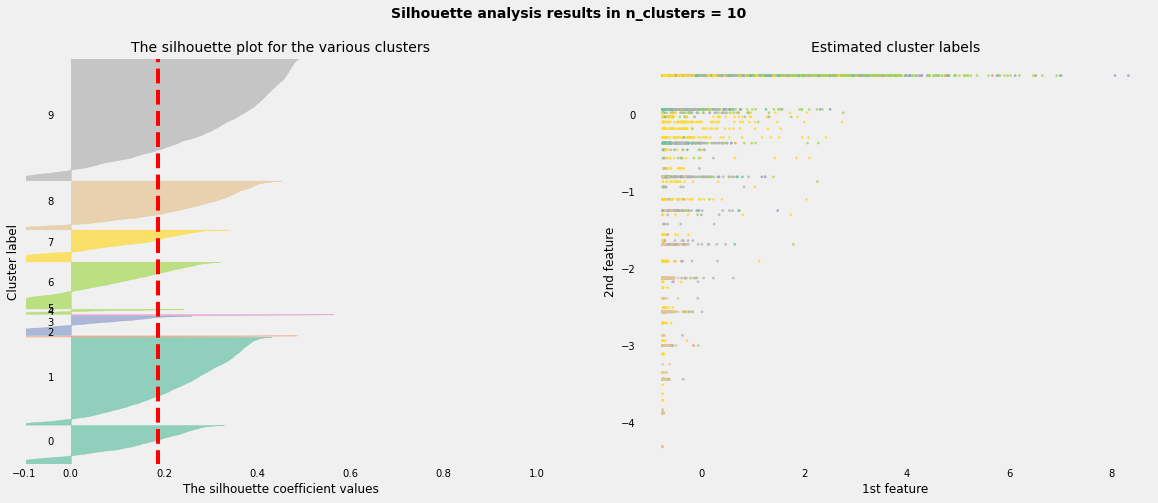

In [118]:
from clusteval import clusteval
ce = clusteval(evaluate = 'silhouette')
ce.fit(scaled_features)
ce.plot()
ce.scatter(scaled_features)

# 
# 
## K-Medoids(a custring algorithm, more robust to outliers)
The k-medoids algorithm is a clustering algorithm related to the k-means algorithm.   

K-Means selects the average of a cluster’s points as its centre (which may or may not be one of the data points) while the k-medoids algorithm always picks the actual data points from the clusters as their centres 

average of the data points is a measure that gets highly affected by the outlier points. So in K-Means algorithm, if the data has outliers, the centroid may get shifted to a wrong position and caused incorrect clustering. On the contrary, a medoid in the K-Medoids algorithm is the most central element of the cluster, such that its distance from other points is minimum. Since medoids do not get influenced by outliers, the K-Medoids algorithm is more robust to outliers and noise than K-Means algorithm.The following figure explains how mean’s and medoid’s positions can vary in the presence of an outlier:
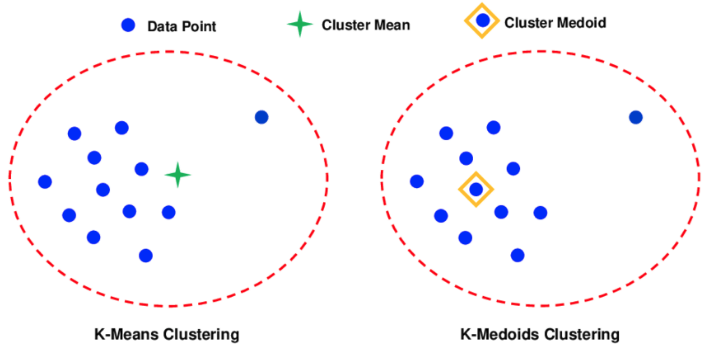
Both the k-means and k-medoids algorithms are partitional (breaking the dataset up into groups). K-means attempts to minimize the total squared error, while k-medoids minimizes the sum of dissimilarities between points labeled to be in a cluster and a point designated as the center of that cluster.

K-Medoids (also called as Partitioning Around Medoid) algorithm was proposed in 1987 by Kaufman and Rousseeuw. A medoid can be defined as the point in the cluster, whose dissimilarities with all the other points in the cluster is minimum.

The dissimilarity of the medoid(Ci) and object(Pi) is calculated by using E = |Pi - Ci|

The cost in K-Medoids algorithm is given as: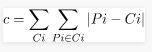



Algorithm:

1. Initialize: select k random points out of the n data points as the medoids.
2. Associate each data point to the closest medoid by using any common distance metric methods.
3. While the cost decreases:
    
    For each medoid m, for each data o point which is not a medoid:
    1. Swap m and o, associate each data point to the closest medoid, recompute the cost.
    2. If the total cost is more than that in the previous step, undo the swap.

In [119]:
!pip install scikit-learn-extra

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLError(1, '[SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:1125)'))) - skipping


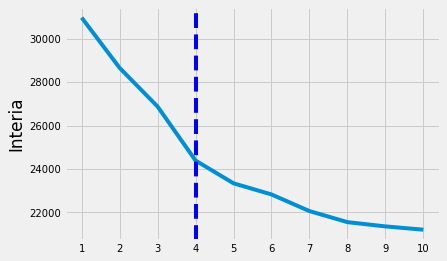

In [120]:
from sklearn_extra.cluster import KMedoids
List = []
for k in range(1,11):#this range is optional
    kmedoids = KMedoids(n_clusters=k,init= "random", random_state =5 ) 
    kmedoids.fit(scaled_features)
    List.append( kmedoids.inertia_)
    
from kneed import KneeLocator
kl = KneeLocator(range(1,11), List, curve='convex', direction='decreasing')
kl.elbow
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),List)
plt.xticks(range(1,11))
plt.ylabel("Interia")
plt.axvline(x=kl.elbow, color='b', label='axvline - full height', ls='--')
plt.show()    

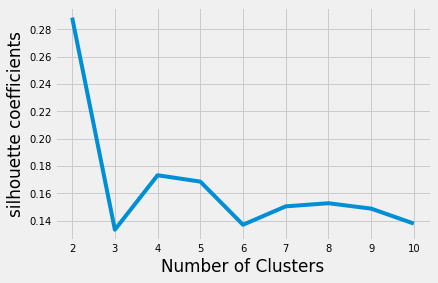

In [121]:
from sklearn_extra.cluster import KMedoids
silhouette_coefficients = []
for k in range (2,11):
    kmedoids = KMedoids(n_clusters=k,init= "random", random_state = 5) 
    kmedoids.fit(scaled_features)
    score = silhouette_score(scaled_features, kmedoids.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()

In [122]:
max(silhouette_coefficients)

0.2886451888261335

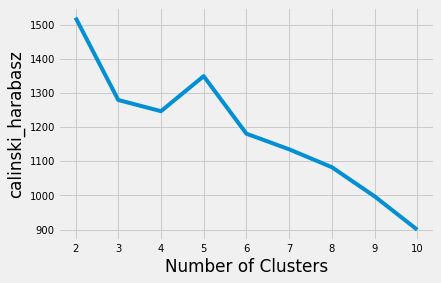

In [123]:
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score
calinski_harabaz = []
for k in range (2,11):
    kmedoids = KMedoids(n_clusters=k,init= "random", random_state = 5) 
    kmedoids.fit(scaled_features)
    metrics.calinski_harabasz_score(scaled_features, kmedoids.labels_)
    calinski_harabaz.append(metrics.calinski_harabasz_score(scaled_features, kmedoids.labels_))
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()

In [124]:
max(calinski_harabaz)

1520.4301060768387

### So 2 cluster with silhouette = 0.2886451888261335,  is the best for k-mediods modeling

In [125]:
# view normal cluster centers
kmediods = KMedoids(n_clusters=2,init= "random", random_state = 5)
kmediods.fit(scaled_features)
labels = kmediods.labels_
cluster_centers = pd.DataFrame(data = kmediods.cluster_centers_, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0 -0.437736          0.067679 -0.337536        -0.273067   
1 -0.029901          0.505405  1.304550         1.233272   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.296387    -0.335876            0.009969   
1               0.817208    -0.468655            1.256077   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.408536                         0.120197   
1                   1.813419                         0.957570   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.144032        -0.190089     -0.319045    -0.279334   
1              -0.681953        -0.479437      0.792993     0.403907   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.070835        -0.290617        -0.200178  0.355181  
1  0.550734        -0.198486         0.382859  0.355181

In [126]:
# viewing real centers
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0   683.971012          0.909091    294.00           145.00   
1  1538.569369          1.000000   3852.37          2681.99   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0                 149.00   281.669381                 0.5   
1                1170.38     0.000000                 1.0   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.083333                         0.416667   
1                   0.750000                         0.750000   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.166667              2.0           7.0       3500.0   
1               0.000000              0.0          35.0       6000.0   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT TENURE  
0  1578.374440       174.836120         0.100000   12.0  
1  3386.915692       393.411779         0.272727   12.0

In [127]:
#adding cluster column to dataframe
df_cluster_with_kmediods = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_kmediods

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3      817.714335           1.000000      16.00             16.00   
4     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8631     5.871712           0.500000      20.90             20.90   
8632    28.493517           1.000000     291.12              0.00   
8633    23.398673           0.833333     144.40              0.00   
8634    13.457564           0.833333       0.00              0.00   
8635   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      0.000000             0.083333   
4                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8631                    0.00      0.000000             0.166667   
8632                  291.12      0.000000             1.000000   
8633                  144.40      0.000000             0.833333   
8634                    0.00     36.558778             0.000000   
8635                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8631                    0.166667                          0.000000   
8632                    0.000000                          0.833333   
8633                    0.000000                          0.666667   
8634                    0.000000                          0.000000   
8635                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8631                0.000000                 0              1         500.0   
8632                0.000000                 0              6        1000.0   
8633                0.000000                 0              5        1000.0   
8634                0.166667                 2              0         500.0   
8635                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        0  
1     4103.032597       1072.340217          0.222222      12        0  
2      622.066742        627.284787          0.000000      12        1  
3      678.334763        244.791237          0.000000      12        0  
4     1400.057770       2407.246035          0.000000      12        0  
...           ...               ...               ...     ...      ...  
8631    58.644883         43.473717          0.000000       6        0  
86

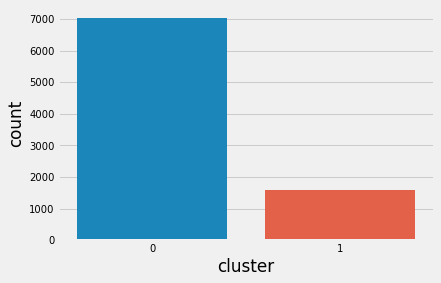

In [128]:
# counting number of clusters
sns.countplot(x=df_cluster_with_kmediods.cluster)
plt.show()

#### so most o people are grouped in cluster 0
#### 

#### interpreting part for( clustering with kmediods)

In [129]:
cluster_report(df,df_cluster_with_kmediods.cluster,min_samples_leaf=20,pruning_level=0.05)

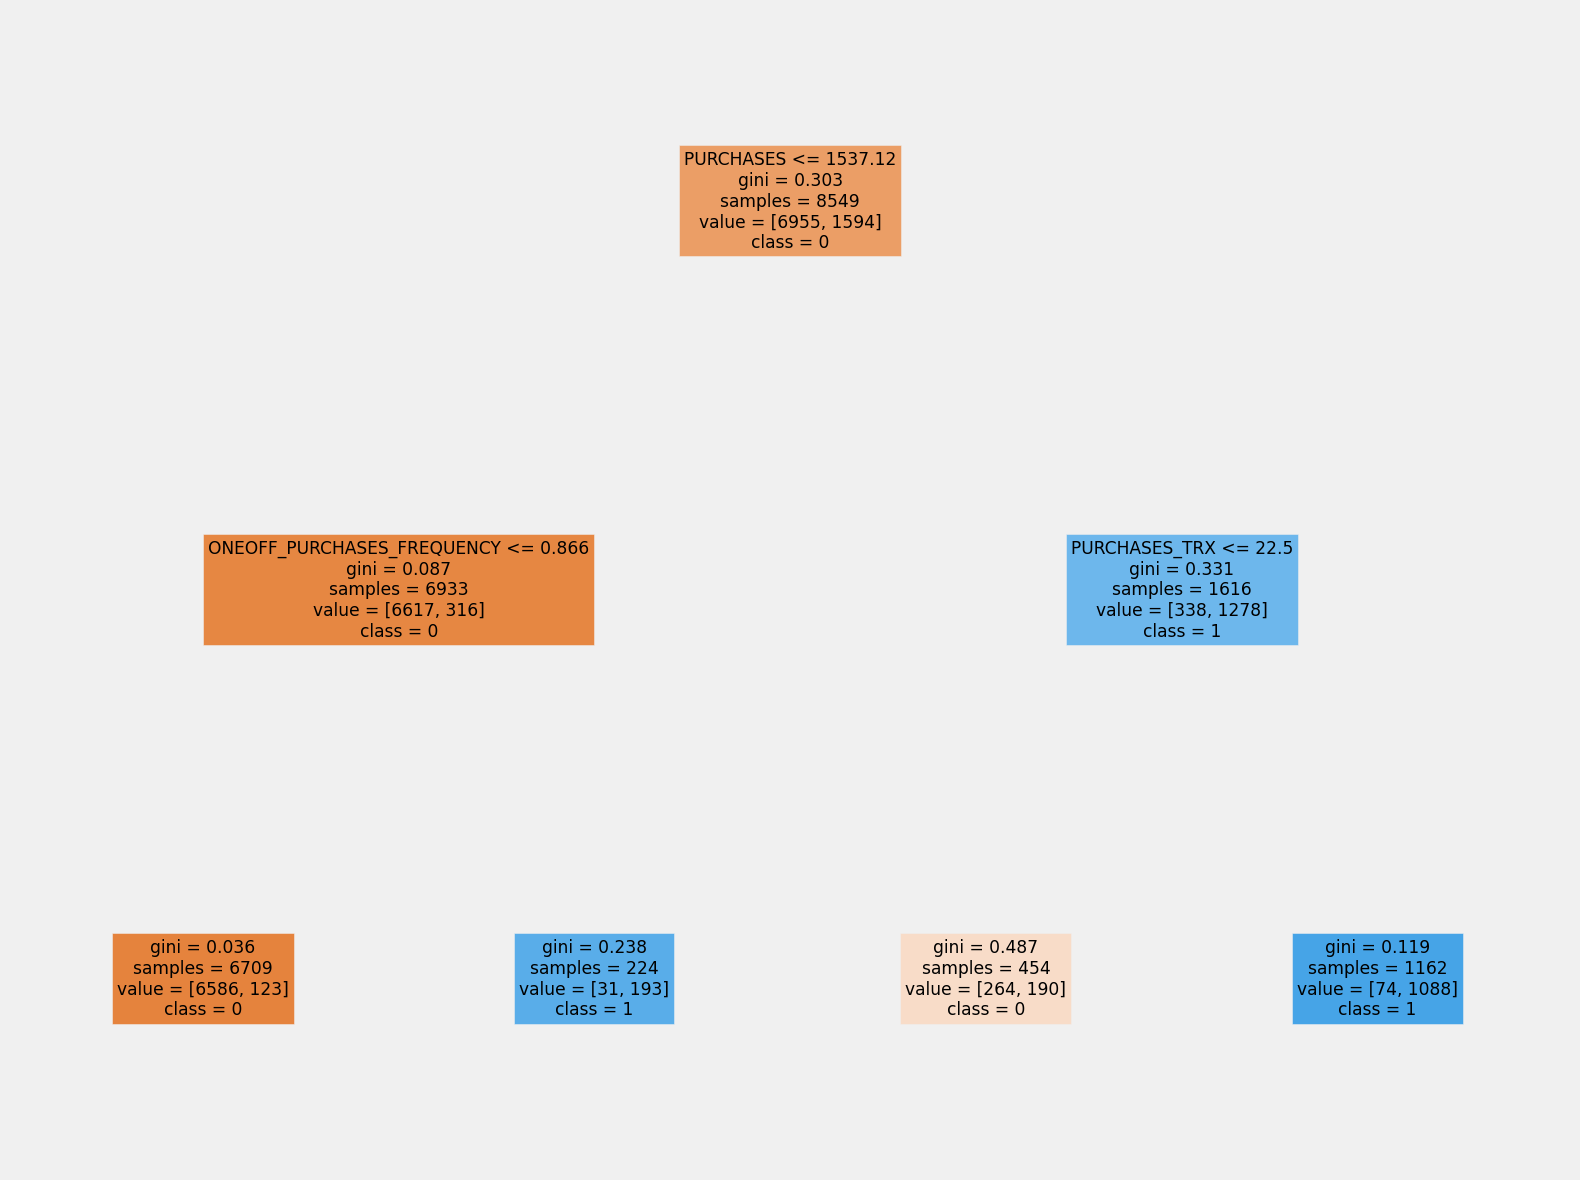

In [130]:
##visualization desision tree to find features that efect on decision
from sklearn import tree
from sklearn.model_selection  import train_test_split
X = df_cluster_with_kmediods. drop('cluster', axis =1)
y = df_cluster_with_kmediods['cluster']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.01,random_state=1)
clf = DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
feature_names = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY',
                'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX',
                'CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
target_names =['0','1']
fig = plt.figure(figsize=(25,20))
plot = tree.plot_tree(clf,
                     feature_names = feature_names,
                     class_names = target_names,
                     filled = True)
fig.savefig("Tree1.png")

### تفسیر کلاسها با توجه به درخت تصمیم و جدولی که قبل از درخت تصمیم نشان دادیم 
افراد بیشتر در کلاس دو طبقه بندی می شوند

class 0:ONEOFF_PURCHASES_FREQUENCY <= 0.866 and PURCHASES <= 1537

کلاس صفر شامل 7029 نفر است که این افراد مقدار خریدهای انجام شده از حساب کمتر از 1537  است و تعداد دفعات خرید یکباره
 از 0.866 کمتر است

class 1:(PURCHASES_TRX <= 22.5) and (PURCHASES > 1537)

کلاس یک شامل 1607 نفر است که این افراد مقدار خریدهای انجام شده از حساب بیشتر از1664 است و همچنین تعداد تراکنشهای خرید کمتر از 22.5 است 



### visualizing clusters by inversing results

[[6.83971012e+02 9.09091000e-01 2.94000000e+02 1.45000000e+02
  1.49000000e+02 2.81669381e+02 5.00000000e-01 8.33330000e-02
  4.16667000e-01 1.66667000e-01 2.00000000e+00 7.00000000e+00
  3.50000000e+03 1.57837444e+03 1.74836120e+02 1.00000000e-01
  1.20000000e+01]
 [1.53856937e+03 1.00000000e+00 3.85237000e+03 2.68199000e+03
  1.17038000e+03 0.00000000e+00 1.00000000e+00 7.50000000e-01
  7.50000000e-01 0.00000000e+00 0.00000000e+00 3.50000000e+01
  6.00000000e+03 3.38691569e+03 3.93411779e+02 2.72727000e-01
  1.20000000e+01]]


Text(13.775905597103517, 0.5, 'PURCHASES_TRX')

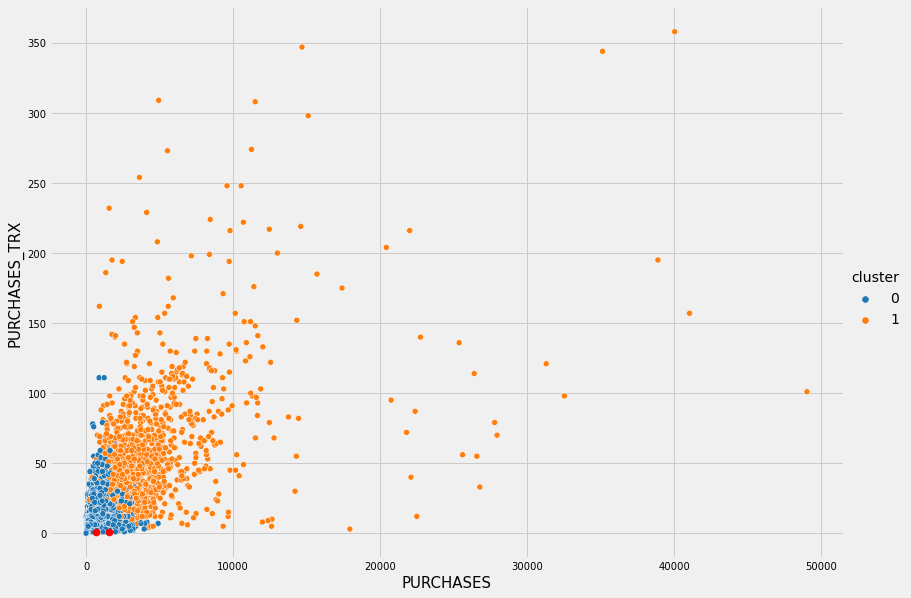

In [50]:
centroids = kmediods.cluster_centers_
centroids = scaler.inverse_transform(centroids)
print(centroids)

sns.relplot(data = df_cluster_with_kmediods,x='PURCHASES' , y  ='PURCHASES_TRX', hue='cluster', palette='tab10' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("PURCHASES_TRX",fontsize=15)


### visualizing clusters on original data

In [51]:
df_kmedoid = df.copy()

[[9.69139152e+02 1.00000000e+00 2.69340000e+02 7.80000000e+01
  1.91340000e+02 7.83126600e+01 6.66667000e-01 8.33330000e-02
  5.83333000e-01 8.33330000e-02 1.00000000e+00 1.10000000e+01
  2.00000000e+03 6.41186755e+02 3.83080045e+02 0.00000000e+00
  1.20000000e+01]
 [2.99037059e+03 1.00000000e+00 1.36800000e+03 2.08000000e+02
  1.16000000e+03 1.43623824e+03 1.00000000e+00 8.33330000e-02
  1.00000000e+00 5.83333000e-01 1.40000000e+01 2.20000000e+01
  8.00000000e+03 1.68074827e+03 7.91063136e+02 0.00000000e+00
  1.20000000e+01]]


Text(13.775905597103517, 0.5, 'PURCHASES_TRX')

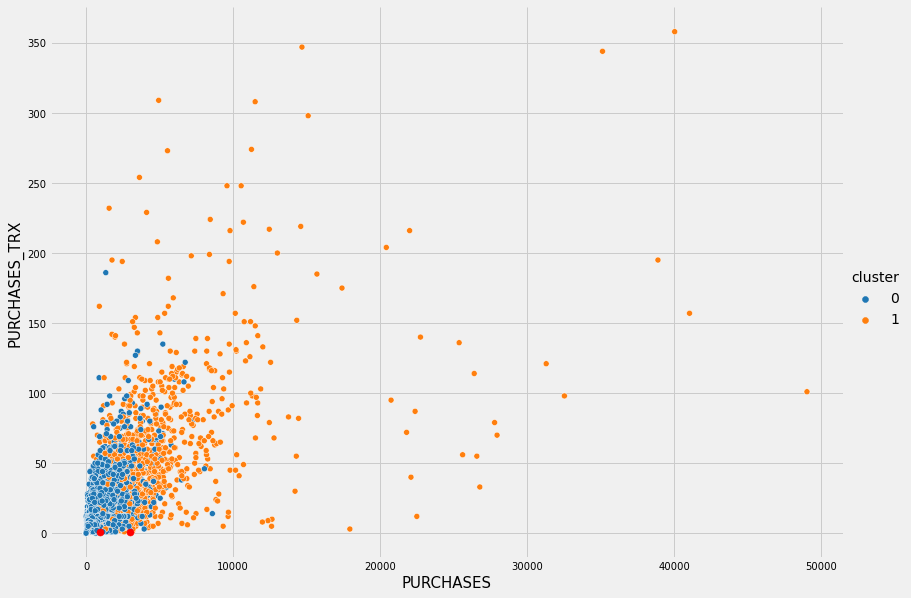

In [52]:
kmediods = KMedoids(n_clusters=2,init= "random", random_state = 5).fit(df)
centroids = kmediods.cluster_centers_
df_kmedoid['cluster'] = kmediods.labels_
print(centroids)

sns.relplot(data = df_kmedoid , x='PURCHASES' , y  ='PURCHASES_TRX', hue='cluster', palette='tab10' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("PURCHASES_TRX",fontsize=15)

یک تفاوت کوچک در دو شکل بالا مشاهده می شود
به نظر می آید روش اول بهتر داده ها را جدا می کندل

# 
# 
## Gaussian mixture model
As the name implies, a Gaussian mixture model involves the mixture of multiple Gaussian distributions.
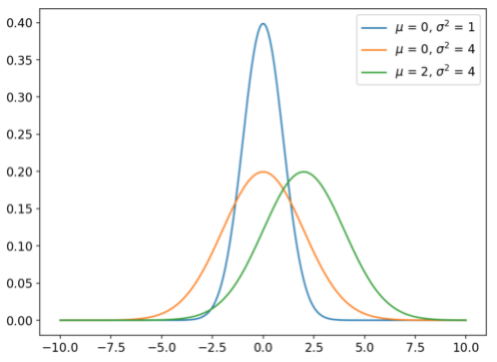
#### comparison with k-means:
First , k-means does not account for variance. By variance, we are referring to the width of the bell shape curve.

k-means groups data points using distance from the cluster centroid but gmm uses probabilistic assignment of data points to clusters.Each cluster is described by a separate gaussian distribution. So k-means performs hard classification whereas the Gaussian mixtureperforms soft classification, by providing probabilities a given data point belongs to each of the possible clusters.


In calling the predict function, the model will assign every data point to one of the clusters.

On the other hand, we can call the predict_proba function to return the probabilities that a data point belongs to each of the K clusters.

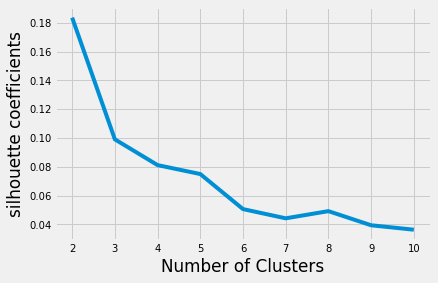

In [131]:
from sklearn.mixture import GaussianMixture
sil_gmm = []
for k in range(2,11):#this range is optional
    gmm = GaussianMixture(n_components=k, random_state=1 )#each gaussian in your mixture is one component 
    gmm.fit(scaled_features)
    score = silhouette_score(scaled_features, gmm.predict(scaled_features),metric='euclidean',random_state=5)
    sil_gmm.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), sil_gmm)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()    

In [54]:
max(sil_gmm)

0.18353676992495227

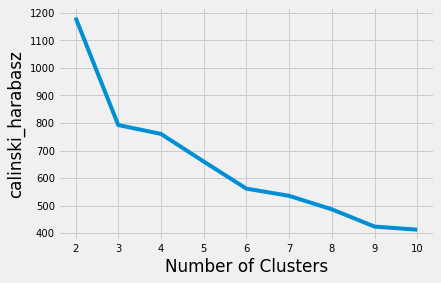

In [55]:
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score
calinski_harabaz = []
for k in range (2,11):
    gmm = GaussianMixture(n_components=k, random_state=1 )#each gaussian in your mixture is one component
    gmm.fit(scaled_features)
    metrics.calinski_harabasz_score(scaled_features, gmm.predict(scaled_features))
    calinski_harabaz.append(metrics.calinski_harabasz_score(scaled_features, gmm.predict(scaled_features)))
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()

In [56]:
max(calinski_harabaz)

1182.4986324653912

#### So 2 cluster with silhouette=0.18353676992495227, is the best for gaussian mixture modeling

In [132]:
# In gaussian method, we don't have centers, we have mean for each cluster
# view normal cordinates means of clusters(in gaussian we can show mean, instead center)
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, random_state=1 )
gmm.fit(scaled_features)
labels = gmm.predict(scaled_features)
cluster_means = pd.DataFrame(data = gmm.means_, columns = [df.columns])
cluster_means

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0 -0.124546         -0.173694 -0.351274        -0.285090   
1  0.224501          0.313093  0.633193         0.513892   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.306768     0.016801           -0.417561   
1               0.552968    -0.030285            0.752679   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.448692                        -0.298184   
1                   0.808793                         0.537494   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.094295         0.052815     -0.404373    -0.215950   
1              -0.169972        -0.095202      0.728907     0.389263   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.240959        -0.160539        -0.096885 -0.111713  
1  0.434343         0.289382         0.174641  0.201370

In [58]:
# view real cordinates means of clusters(in gaussian we can show mean, instead center)
cluster_means = scaler.inverse_transform(cluster_means)
cluster_means = pd.DataFrame(data = cluster_means, columns = [df.columns])
cluster_means

BALANCE BALANCE_FREQUENCY    PURCHASES ONEOFF_PURCHASES  \
0  1340.245774          0.858962   264.228381       124.750097   
1  2071.655381          0.960060  2397.552356      1470.402980   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             139.478283  1029.815898            0.328454   
1             928.021242   929.931613            0.798012   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.071285                         0.250122   
1                   0.448576                         0.582780   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.156631         3.678979      4.851517  3731.922930   
1               0.103307         2.655875     33.386385  5946.416342   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0  1083.373075       483.436847         0.130601  11.387945  
1  3048.261885      1550.842490         0.211042  11.798369

In [133]:
#adding cluster column to dataframe
df_cluster_with_gmm = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_gmm

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3      817.714335           1.000000      16.00             16.00   
4     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8631     5.871712           0.500000      20.90             20.90   
8632    28.493517           1.000000     291.12              0.00   
8633    23.398673           0.833333     144.40              0.00   
8634    13.457564           0.833333       0.00              0.00   
8635   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      0.000000             0.083333   
4                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8631                    0.00      0.000000             0.166667   
8632                  291.12      0.000000             1.000000   
8633                  144.40      0.000000             0.833333   
8634                    0.00     36.558778             0.000000   
8635                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8631                    0.166667                          0.000000   
8632                    0.000000                          0.833333   
8633                    0.000000                          0.666667   
8634                    0.000000                          0.000000   
8635                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8631                0.000000                 0              1         500.0   
8632                0.000000                 0              6        1000.0   
8633                0.000000                 0              5        1000.0   
8634                0.166667                 2              0         500.0   
8635                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        0  
1     4103.032597       1072.340217          0.222222      12        0  
2      622.066742        627.284787          0.000000      12        1  
3      678.334763        244.791237          0.000000      12        0  
4     1400.057770       2407.246035          0.000000      12        1  
...           ...               ...               ...     ...      ...  
8631    58.644883         43.473717          0.000000       6        0  
86

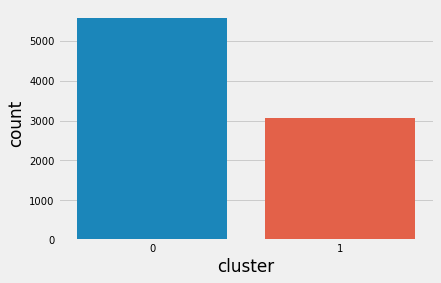

In [60]:
# counting number of clusters
sns.countplot(x=df_cluster_with_gmm.cluster)
plt.show()

#### cluster 0 is almost two times bigger than cluster 1

In [61]:
# interpreting clustering with gaussin model
cluster_report(df,df_cluster_with_gmm.cluster,min_samples_leaf=20,pruning_level=0.05)

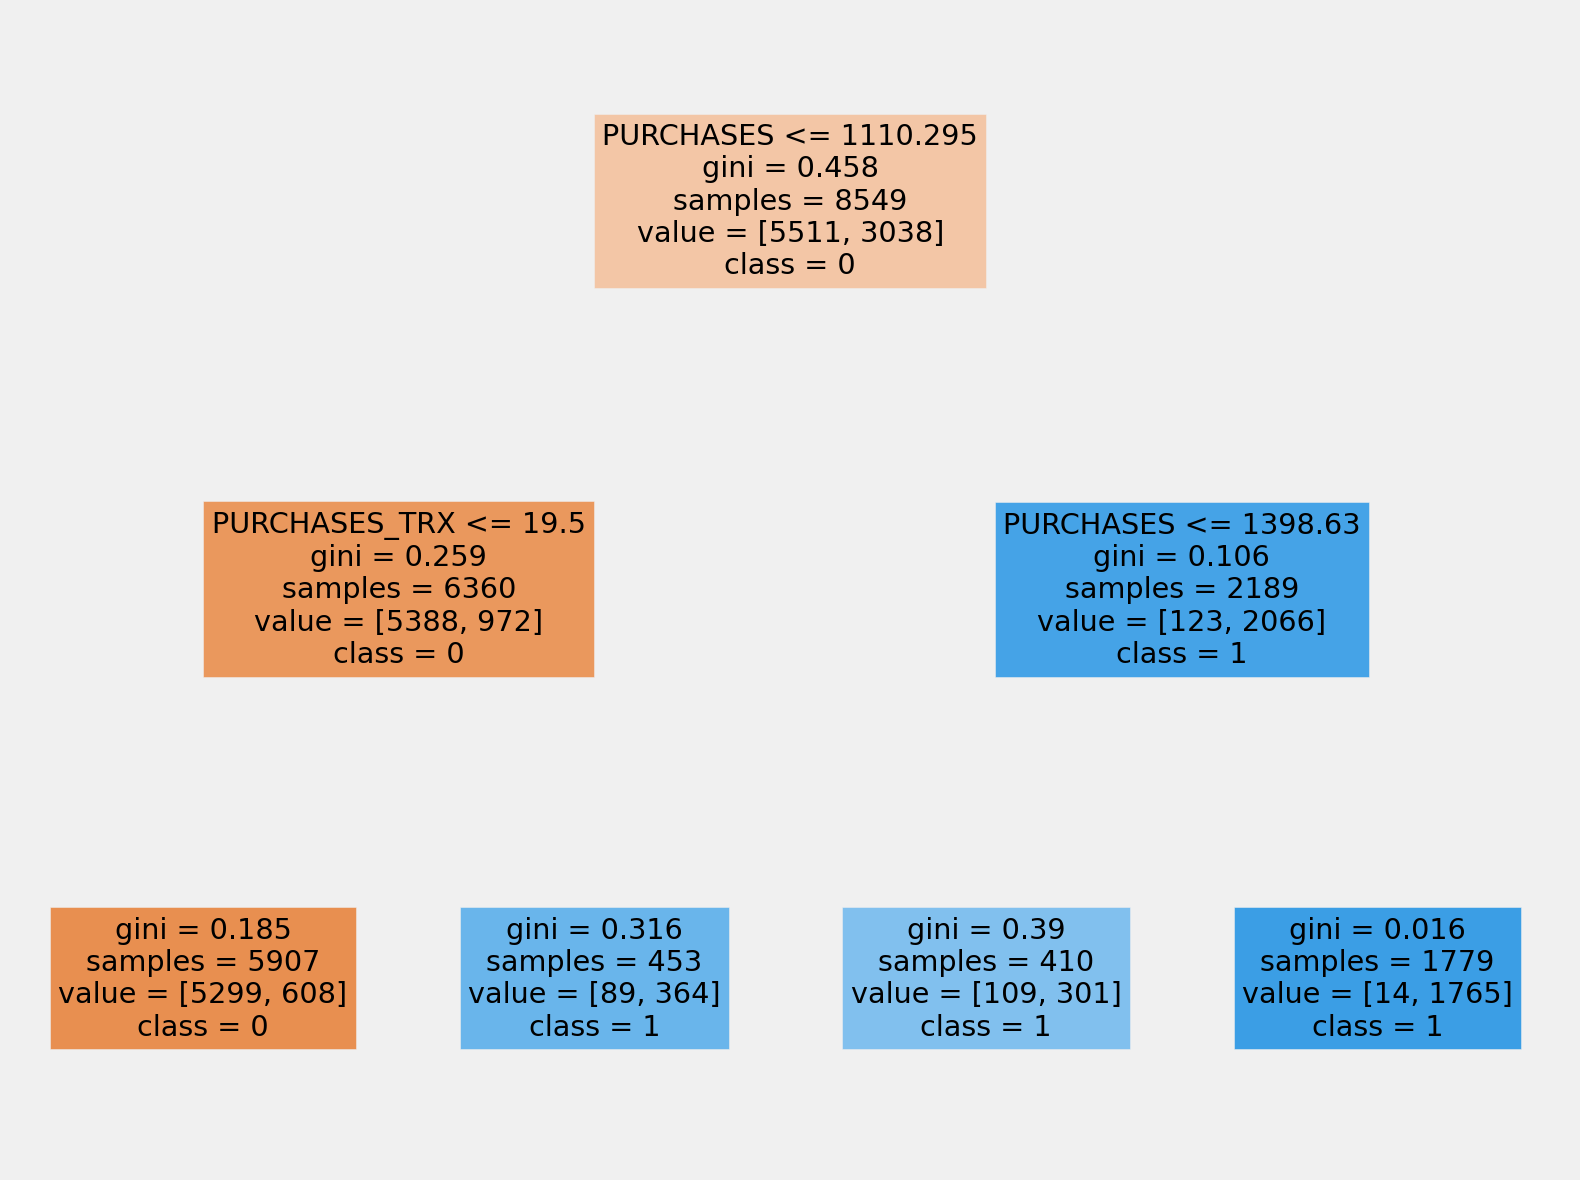

In [134]:
##visualization desision tree to find features that efect on decision
from sklearn import tree
from sklearn.model_selection  import train_test_split
X = df_cluster_with_gmm. drop('cluster', axis =1)
y = df_cluster_with_gmm['cluster']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.01,random_state=1)
clf = DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
feature_names = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY',
                'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX',
                'CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
target_names =['0','1']
fig = plt.figure(figsize=(25,20))
plot = tree.plot_tree(clf,
                     feature_names = feature_names,
                     class_names = target_names,
                     filled = True)
fig.savefig("Tree1.png")

### visualizing clusters by inversing results

cluster means:
 [[1.34024577e+03 8.58961589e-01 2.64228381e+02 1.24750097e+02
  1.39478283e+02 1.02981590e+03 3.28453831e-01 7.12850254e-02
  2.50122443e-01 1.56631006e-01 3.67897877e+00 4.85151750e+00
  3.73192293e+03 1.08337308e+03 4.83436847e+02 1.30601093e-01
  1.13879450e+01]
 [2.07165538e+03 9.60059796e-01 2.39755236e+03 1.47040298e+03
  9.28021242e+02 9.29931613e+02 7.98012003e-01 4.48576049e-01
  5.82780422e-01 1.03307255e-01 2.65587546e+00 3.33863848e+01
  5.94641634e+03 3.04826188e+03 1.55084249e+03 2.11041658e-01
  1.17983685e+01]]


Text(13.775905597103517, 0.5, 'PURCHASES_TRX')

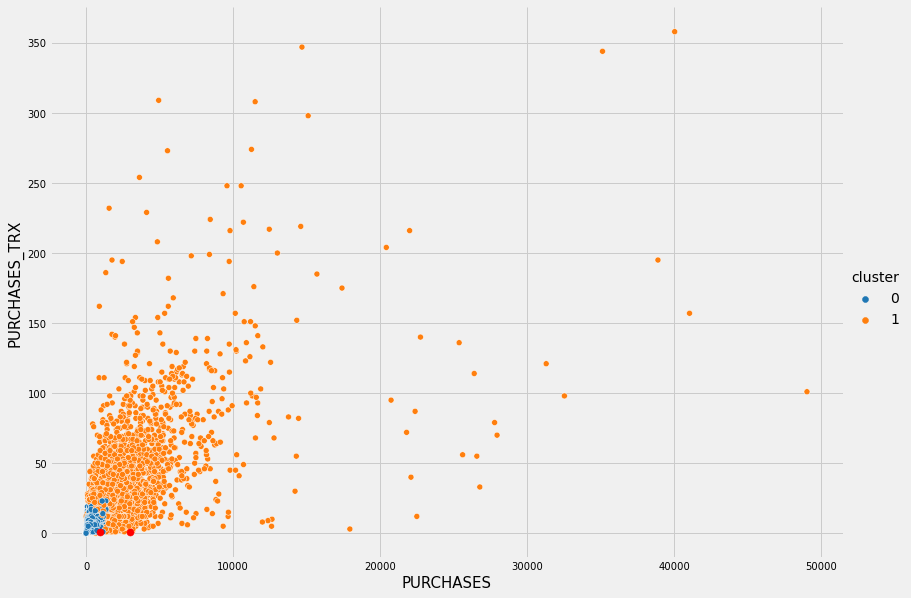

In [63]:
cluster_means = gmm.means_#for gaussian, we don't have centers,we have mean 
cluster_means = scaler.inverse_transform(cluster_means)
print("cluster means:\n",cluster_means)

sns.relplot(data = df_cluster_with_gmm,x='PURCHASES' , y  ='PURCHASES_TRX', hue='cluster', palette='tab10' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("PURCHASES_TRX",fontsize=15)

به نظرم روش بالایی که نتایج نرمال را اینورس می کنیم ،جواب صحیحتری دارد چون نقاط را بهتر جدا کرده است

### visualising without normalize

cluster means without normalize:
 [[1.28750878e+03 8.84709942e-01 6.74424957e+02 3.85847855e+02
  2.88577103e+02 7.29203986e+02 4.75103969e-01 1.85867943e-01
  3.45460705e-01 1.23502899e-01 2.49201468e+00 1.09041234e+01
  4.09748588e+03 1.21539811e+03 4.87549871e+02 1.59990445e-01
  1.15012483e+01]
 [3.60163464e+03 9.60873520e-01 3.26364103e+03 2.00169586e+03
  1.26423997e+03 2.68376562e+03 6.29243475e-01 3.33698819e-01
  5.17773016e-01 2.27521128e-01 8.55478524e+00 4.13624858e+01
  7.22958428e+03 5.41321473e+03 3.26668237e+03 1.54924118e-01
  1.17457245e+01]]


Text(13.775905597103517, 0.5, 'PURCHASES_TRX')

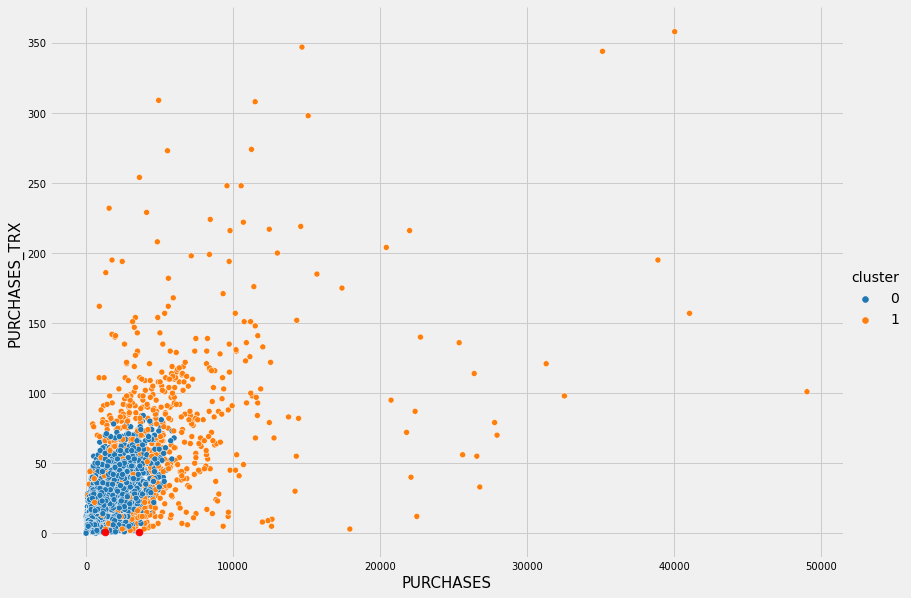

In [64]:
df_gmm = df.copy()
gmm = GaussianMixture(n_components=2, random_state=1).fit(df)
cluster_means = gmm.means_
df_gmm['cluster'] = gmm.predict(df)
print("cluster means without normalize:\n",cluster_means)

sns.relplot(data = df_gmm , x='PURCHASES' , y  ='PURCHASES_TRX', hue='cluster', palette='tab10' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(cluster_means[:, 0], cluster_means[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("PURCHASES_TRX",fontsize=15)



به نظرم این روش نمایش نقاط را به خوبی جدا نکرده است

# 
# 
## Hierarchical Clustering(merging or spiliting clusters)

Hierarchical clustering is a method of cluster analysis that attempts to create a hierarchy of clusters. Hierarchical clustering strategies are generally divided into two types:

Agglomerative: This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
Divisive: This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

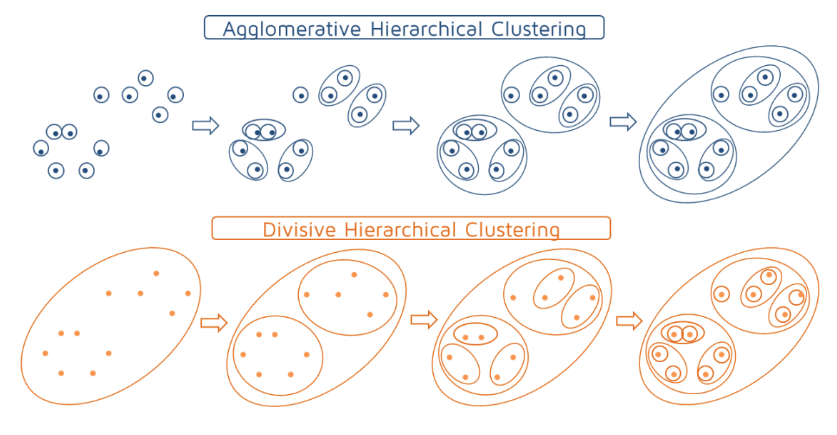

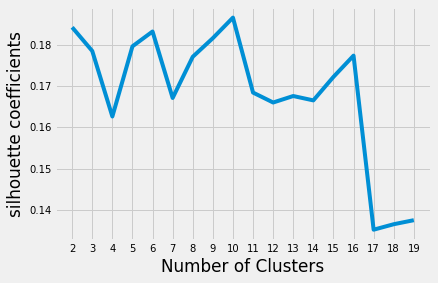

In [65]:
from sklearn.cluster import AgglomerativeClustering 
sil_Hierarch = []
for k in range(2,20):#this range is optional
    Hierarch = AgglomerativeClustering(n_clusters = k,linkage='ward')#linkage determines which distance to use between sets of observstion.alghorithm minimize this distance 
    score = silhouette_score(scaled_features, Hierarch.fit_predict(scaled_features),metric='euclidean')
    sil_Hierarch.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,20), sil_Hierarch)
plt.xticks(range(2,20))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()  

In [66]:
print("max silhouette score for Agglomerative method is:",max(sil_Hierarch))

max silhouette score for Agglomerative method is: 0.1865256797594413


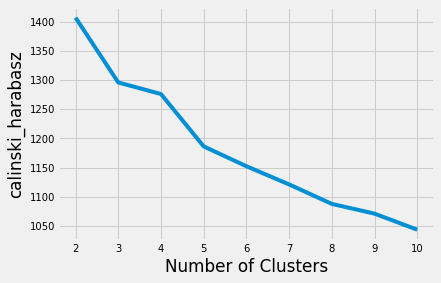

In [67]:
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score
calinski_harabaz = []
for k in range (2,11):
    Hierarch = AgglomerativeClustering(n_clusters = k, linkage='ward')
    score = metrics.calinski_harabasz_score(scaled_features, Hierarch.fit_predict(scaled_features))
    calinski_harabaz.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()

In [68]:
print("max calinski_harabasz sore for Agglomerative method is:",max(calinski_harabaz))

max calinski_harabasz sore for Agglomerative method is: 1407.277445469343


#### So 2 cluster , is the best, for Agglomerative modeling
####   
#### this algorithm dosn't have any attribute to find centers
# 

In [69]:
Hierarch = AgglomerativeClustering(n_clusters =2,linkage='ward')
Hierarch.fit(scaled_features)
score = silhouette_score(scaled_features, Hierarch.fit_predict(scaled_features))
print("silhouette_score",score)

silhouette_score 0.18418454528547495


In [70]:
#adding cluster column to dataframe
labels = Hierarch.labels_
df_cluster_with_Hierarch = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_Hierarch

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3      817.714335           1.000000      16.00             16.00   
4     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8631     5.871712           0.500000      20.90             20.90   
8632    28.493517           1.000000     291.12              0.00   
8633    23.398673           0.833333     144.40              0.00   
8634    13.457564           0.833333       0.00              0.00   
8635   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      0.000000             0.083333   
4                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8631                    0.00      0.000000             0.166667   
8632                  291.12      0.000000             1.000000   
8633                  144.40      0.000000             0.833333   
8634                    0.00     36.558778             0.000000   
8635                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8631                    0.166667                          0.000000   
8632                    0.000000                          0.833333   
8633                    0.000000                          0.666667   
8634                    0.000000                          0.000000   
8635                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8631                0.000000                 0              1         500.0   
8632                0.000000                 0              6        1000.0   
8633                0.000000                 0              5        1000.0   
8634                0.166667                 2              0         500.0   
8635                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        0  
1     4103.032597       1072.340217          0.222222      12        0  
2      622.066742        627.284787          0.000000      12        1  
3      678.334763        244.791237          0.000000      12        0  
4     1400.057770       2407.246035          0.000000      12        0  
...           ...               ...               ...     ...      ...  
8631    58.644883         43.473717          0.000000       6        0  
86

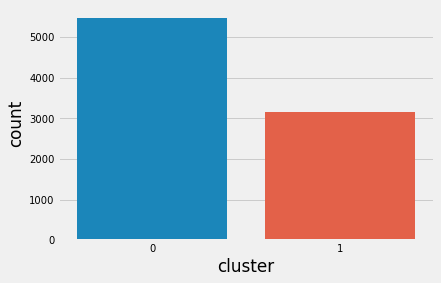

In [71]:
# counting number of clusters
sns.countplot(x=df_cluster_with_Hierarch.cluster)
plt.show()

#### cluster 0 is almost two times bigger than cluster 1

In [72]:
# interpreting clustering by Hierarchical Clustering model
cluster_report(df,df_cluster_with_Hierarch.cluster,min_samples_leaf=20,pruning_level=0.05)

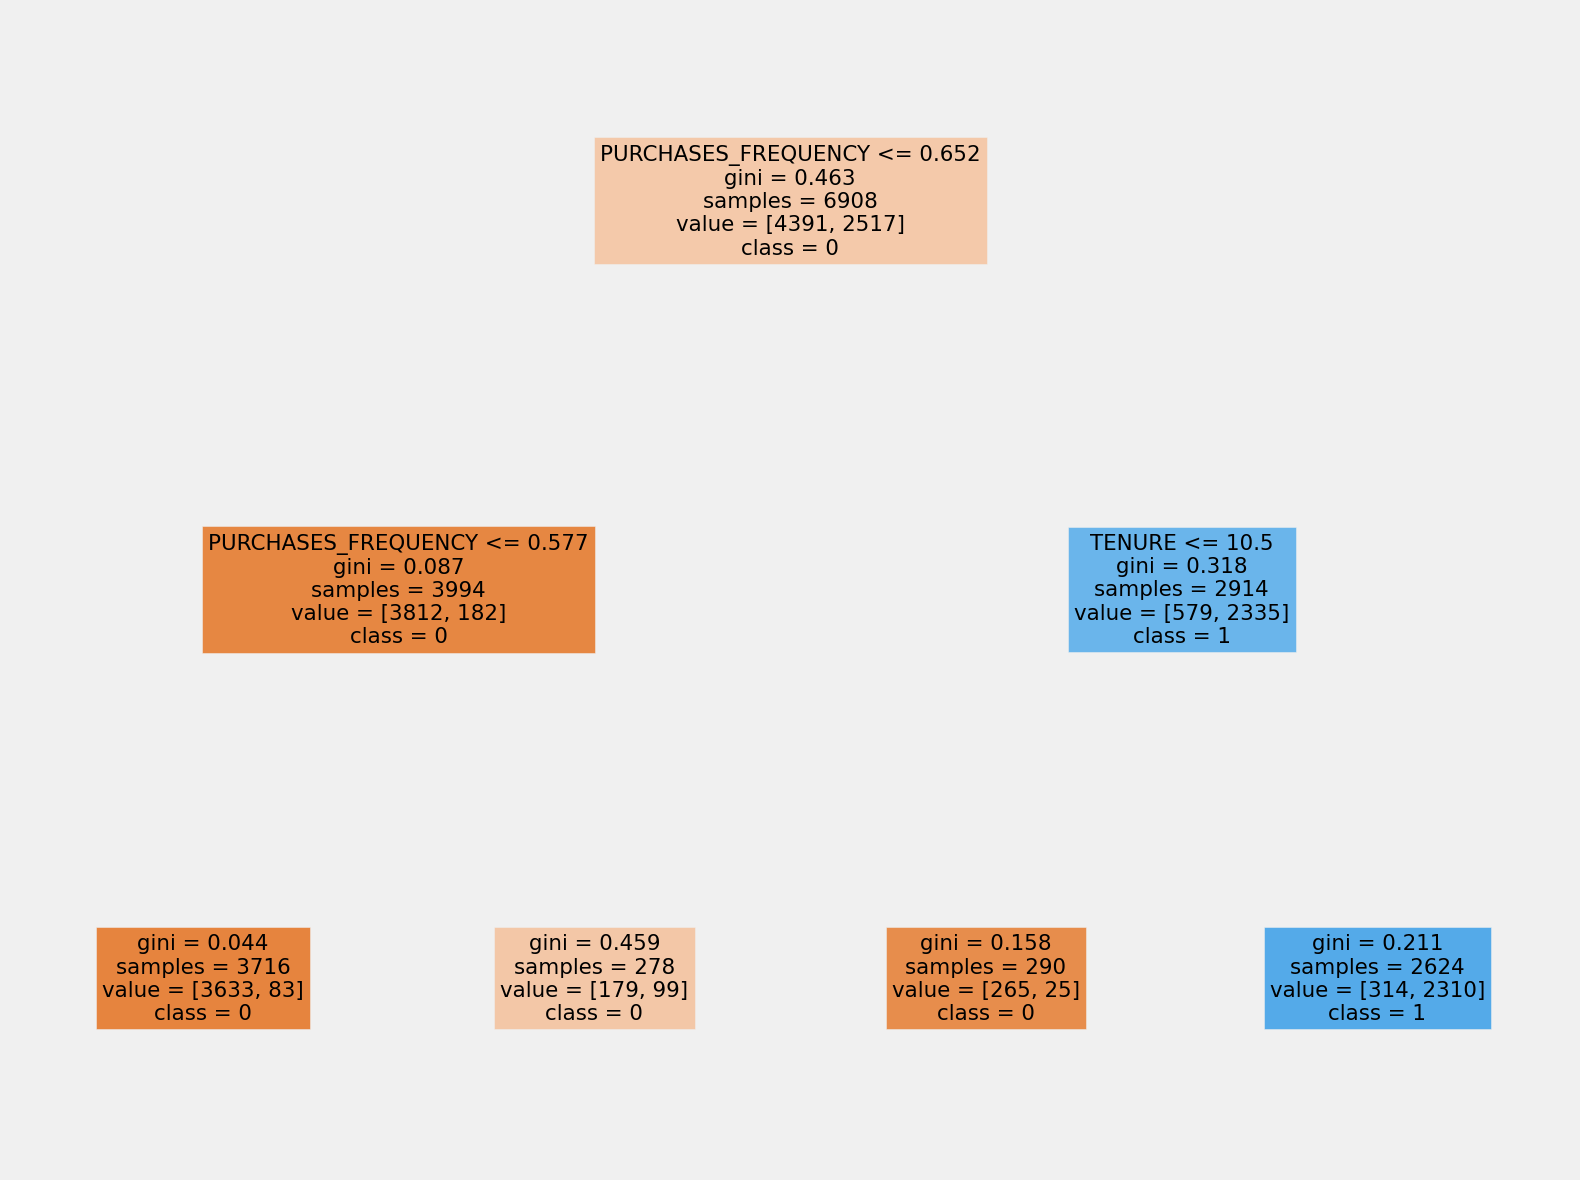

In [73]:
##visualization desision tree to find features that efect on decision
from sklearn import tree
from sklearn.model_selection  import train_test_split
X = df_cluster_with_Hierarch. drop('cluster', axis =1)
y = df_cluster_with_Hierarch['cluster']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
clf = DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
feature_names = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY',
                'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX',
                'CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
target_names =['0','1']
fig = plt.figure(figsize=(25,20))
plot = tree.plot_tree(clf,
                     feature_names = feature_names,
                     class_names = target_names,
                     filled = True)


Text(13.775905597103517, 0.5, 'PURCHASES_TRX')

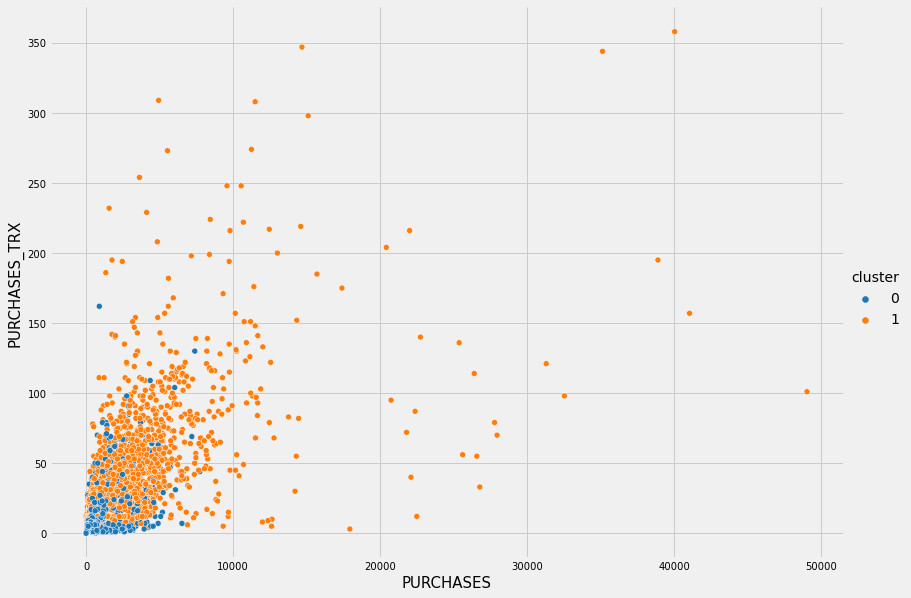

In [74]:
sns.relplot(data = df_cluster_with_Hierarch,x='PURCHASES' , y  ='PURCHASES_TRX', hue='cluster', palette='tab10' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("PURCHASES_TRX",fontsize=15)

In [75]:
score = silhouette_score(scaled_features, Hierarch.labels_)
score

0.18418454528547495

Text(13.775905597103517, 0.5, 'PURCHASES_TRX')

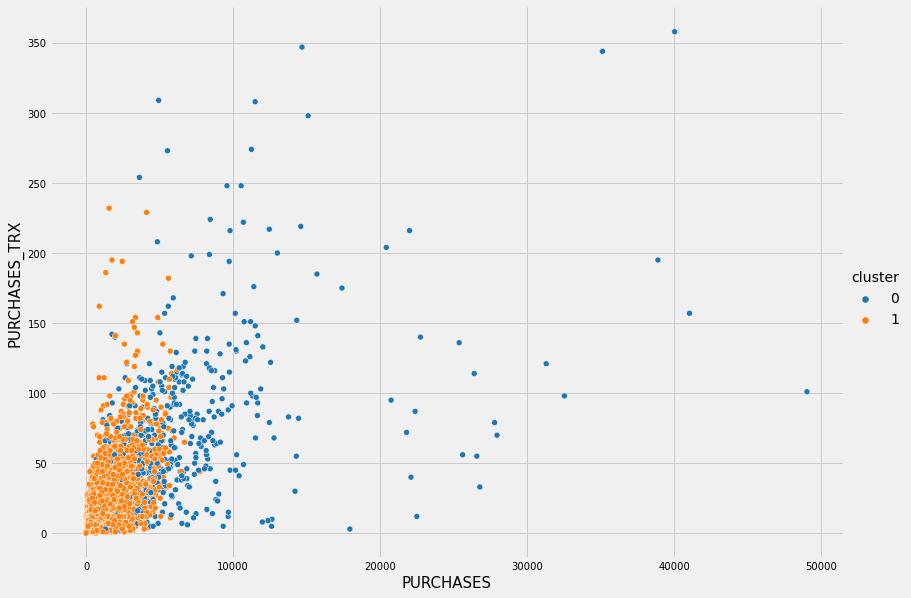

In [76]:
Hierarch = AgglomerativeClustering(n_clusters = 2).fit(df)

df_Hierarch = df.copy()
df_Hierarch['cluster'] = Hierarch.labels_

sns.relplot(data = df_Hierarch ,x='PURCHASES' , y  ='PURCHASES_TRX', hue='cluster', palette='tab10' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("PURCHASES_TRX",fontsize=15)

In [77]:
score = silhouette_score(df, Hierarch.labels_)
score 

0.49972485265477606

### upon to silouette score, it seems that the second  visualization is better
# 

# 
# 
###  MiniBatchKMeans
Mini-batch means you only take a subset of all your data during one iteration.The MiniBatchKMeans is a variant of the KMeans algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function

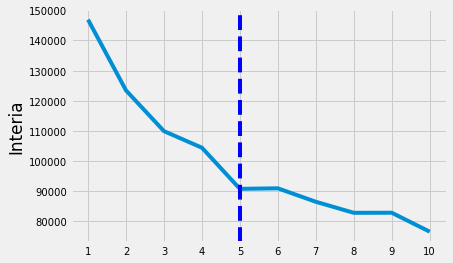

In [93]:
from sklearn.cluster import MiniBatchKMeans
List = []
for k in range(1,11):#this range is optional
    minibatch = MiniBatchKMeans(n_clusters=k , random_state =42, batch_size=50) 
    minibatch.fit(scaled_features)
    List.append(minibatch.inertia_)
from kneed import KneeLocator
kl = KneeLocator(range(1,11), List, curve='convex', direction='decreasing')
kl.elbow
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),List)
plt.xticks(range(1,11))
plt.ylabel("Interia")
plt.axvline(x=kl.elbow, color='b', label='axvline - full height', ls='--')
plt.show()    

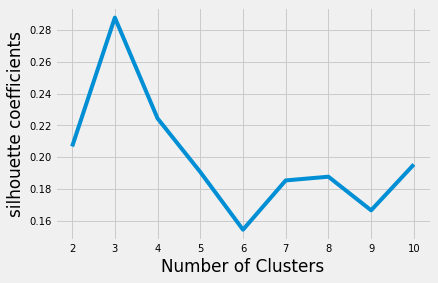

In [94]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range (2,11):
    minibatch = MiniBatchKMeans(n_clusters=k, random_state =42, batch_size=50) 
    minibatch.fit(scaled_features)
    score = silhouette_score(scaled_features, minibatch.predict(scaled_features))
    silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()    

In [95]:
max(silhouette_coefficients)

0.28791103092641435

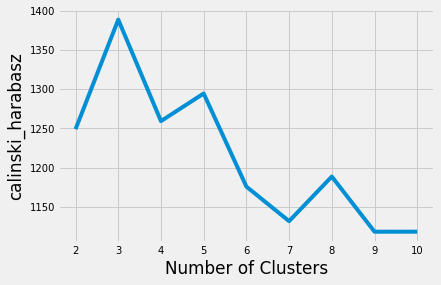

In [96]:
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score
calinski_harabaz = []
for k in range (2,11):
    minibatch = MiniBatchKMeans(n_clusters=k, init='random' , random_state =42, batch_size=50)
    minibatch.fit(scaled_features)
    score = metrics.calinski_harabasz_score(scaled_features, minibatch.labels_)
    calinski_harabaz.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()

In [97]:
max(calinski_harabaz)

1389.1440331681397

### So 3 cluster with silhouette score =0.28791103092641435, is the best for mini batch k-mean modeling

In [135]:
# view cluster centers (scaled centers)
from sklearn.cluster import MiniBatchKMeans
minibatch = MiniBatchKMeans(n_clusters=3, random_state =42, batch_size=50)
minibatch.fit(scaled_features)
labels = minibatch.labels_
cluster_centers = pd.DataFrame(data = minibatch.cluster_centers_, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0 -0.217497         -0.080270 -0.248714        -0.202088   
1  0.242852          0.406411  1.385143         1.102916   
2  1.634150          0.309259 -0.137635        -0.089698   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.216261    -0.165372           -0.183206   
1               1.248316    -0.256804            1.146803   
2              -0.160810     2.426413           -0.442275   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.225846                        -0.171977   
1                   1.375756                         1.015933   
2                  -0.135982                        -0.380193   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.109360        -0.145180     -0.276805    -0.262314   
1              -0.357934        -0.267855      1.656827     0.816624   
2               2.100718         2.399051     -0.188980     1.109034   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.257183        -0.090016        -0.075232 -0.051888  
1  0.707606         0.281211         0.569142  0.299477  
2  1.152387         0.373917        -0.350612 -0.085498

In [84]:
# viewing real centers
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY    PURCHASES ONEOFF_PURCHASES  \
0  1145.471828          0.878364   486.475473       264.543304   
1  2110.108085          0.979440  4027.015558      2462.443124   
2  5025.505089          0.959264   727.180359       453.830757   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             222.490942   643.365982            0.422489   
1            1565.789473   449.407097            0.956154   
2             273.349602  6141.412075            0.318538   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.138147                         0.300361   
1                   0.618685                         0.773233   
2                   0.165109                         0.217477   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.115538         2.310421      8.063562  3562.277655   
1               0.065380         1.462475     56.750507  7510.141988   
2               0.561487        19.896414     10.274900  8580.079681   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0  1036.168010       650.749039         0.137016  11.466371  
1  3843.358432      1531.457499         0.327914  11.926978  
2  5137.510022      1751.396466         0.055433  11.422311

In [136]:
#adding cluster column to dataframe
df_cluster_with_minibatch = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_minibatch

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3      817.714335           1.000000      16.00             16.00   
4     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8631     5.871712           0.500000      20.90             20.90   
8632    28.493517           1.000000     291.12              0.00   
8633    23.398673           0.833333     144.40              0.00   
8634    13.457564           0.833333       0.00              0.00   
8635   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      0.000000             0.083333   
4                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8631                    0.00      0.000000             0.166667   
8632                  291.12      0.000000             1.000000   
8633                  144.40      0.000000             0.833333   
8634                    0.00     36.558778             0.000000   
8635                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8631                    0.166667                          0.000000   
8632                    0.000000                          0.833333   
8633                    0.000000                          0.666667   
8634                    0.000000                          0.000000   
8635                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8631                0.000000                 0              1         500.0   
8632                0.000000                 0              6        1000.0   
8633                0.000000                 0              5        1000.0   
8634                0.166667                 2              0         500.0   
8635                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        0  
1     4103.032597       1072.340217          0.222222      12        2  
2      622.066742        627.284787          0.000000      12        0  
3      678.334763        244.791237          0.000000      12        0  
4     1400.057770       2407.246035          0.000000      12        0  
...           ...               ...               ...     ...      ...  
8631    58.644883         43.473717          0.000000       6        0  
86

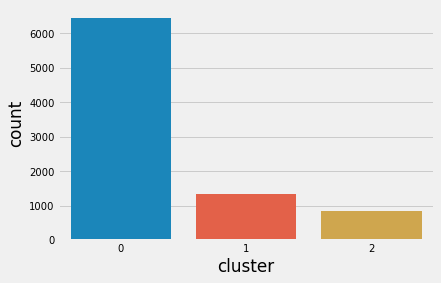

In [86]:
# counting number of clusters
sns.countplot(x=df_cluster_with_minibatch.cluster)
plt.show()

#### people in class 0 are much more than class 1, and people in class 1 are more than class 2


In [87]:
cluster_report(df,df_cluster_with_minibatch.cluster,min_samples_leaf=20,pruning_level=0.05)

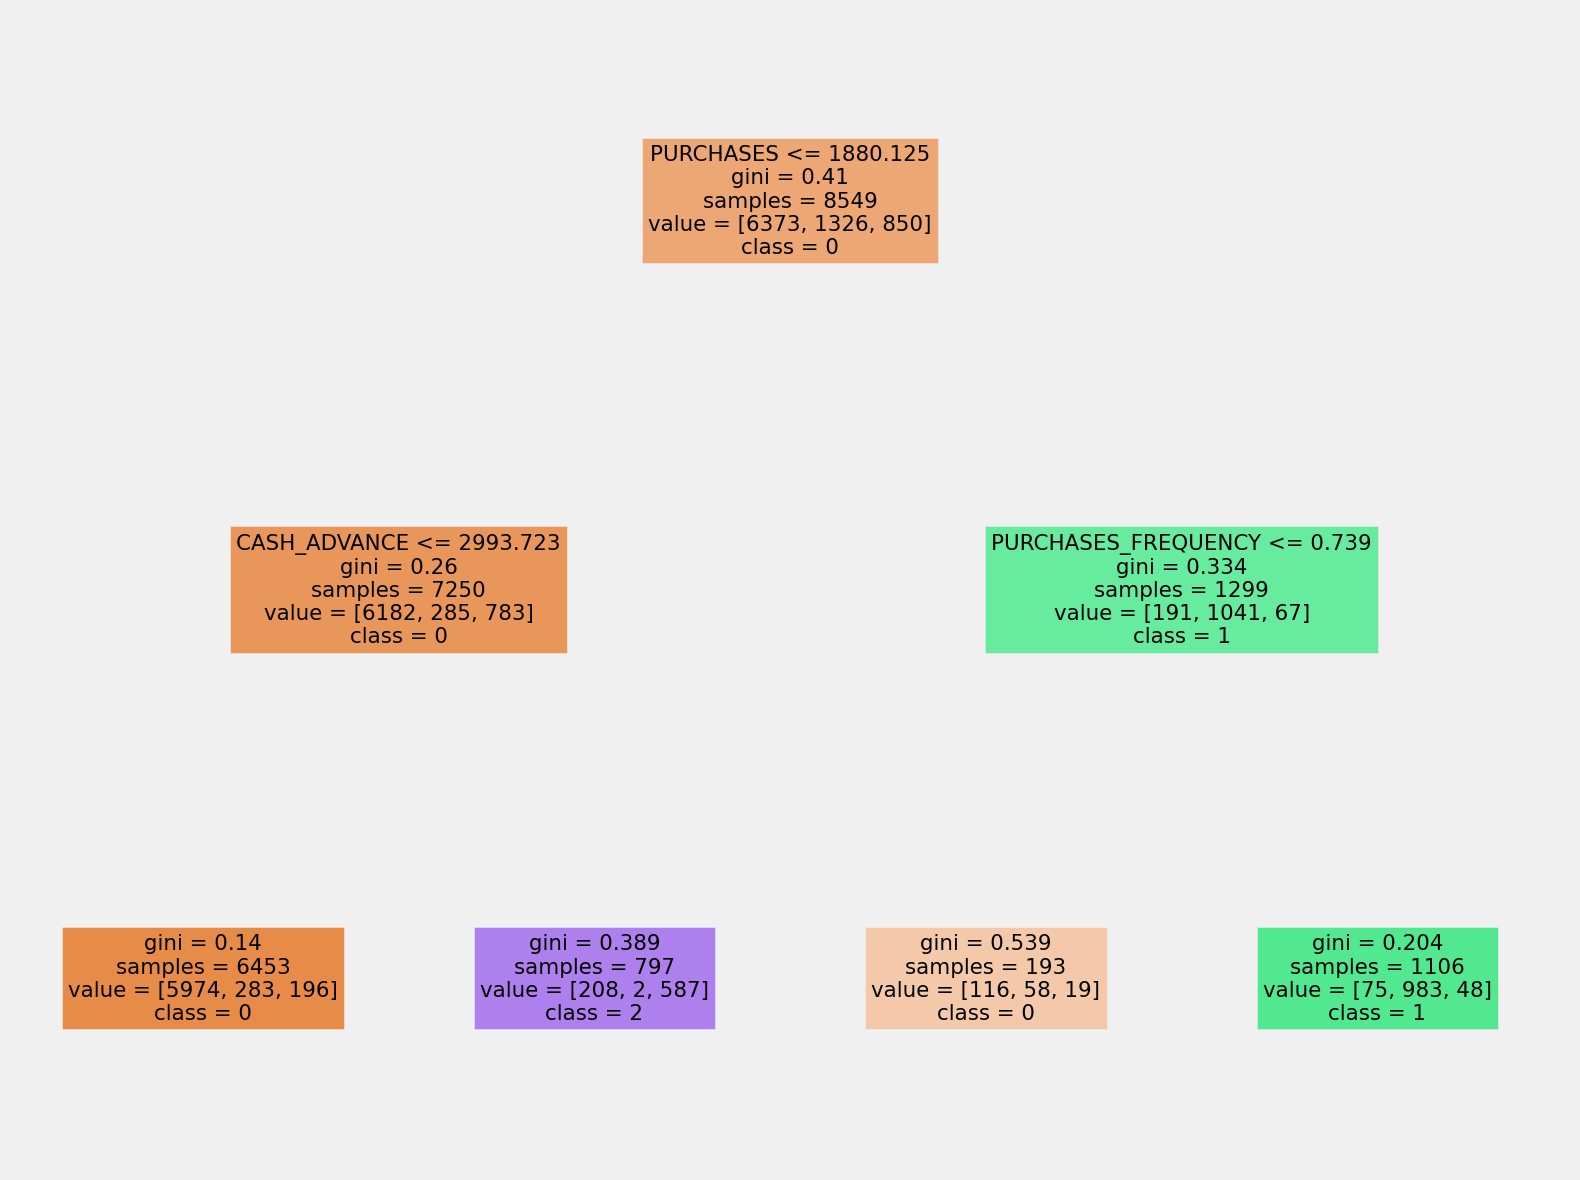

In [137]:
##visualization desision tree to find features to interpret classes
from sklearn import tree
from sklearn.model_selection  import train_test_split
X = df_cluster_with_minibatch. drop('cluster', axis =1)
y = df_cluster_with_minibatch['cluster']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.01,random_state=1)
clf = DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
feature_names = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY',
                'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX',
                'CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
target_names =['0','1','2']
fig = plt.figure(figsize=(25,20))
plot = tree.plot_tree(clf,
                     feature_names = feature_names,
                     class_names = target_names,
                     filled = True)


### visualizing by inversing normalize data

[[1.14547183e+03 8.78364276e-01 4.86475473e+02 2.64543304e+02
  2.22490942e+02 6.43365982e+02 4.22488616e-01 1.38146738e-01
  3.00361452e-01 1.15537584e-01 2.31042129e+00 8.06356245e+00
  3.56227765e+03 1.03616801e+03 6.50749039e+02 1.37015809e-01
  1.14663710e+01]
 [2.11010809e+03 9.79440462e-01 4.02701556e+03 2.46244312e+03
  1.56578947e+03 4.49407097e+02 9.56153846e-01 6.18685337e-01
  7.73232864e-01 6.53804645e-02 1.46247465e+00 5.67505071e+01
  7.51014199e+03 3.84335843e+03 1.53145750e+03 3.27914016e-01
  1.19269777e+01]
 [5.02550509e+03 9.59263542e-01 7.27180359e+02 4.53830757e+02
  2.73349602e+02 6.14141207e+03 3.18537522e-01 1.65109088e-01
  2.17477024e-01 5.61486562e-01 1.98964143e+01 1.02749004e+01
  8.58007968e+03 5.13751002e+03 1.75139647e+03 5.54333665e-02
  1.14223108e+01]]


Text(13.775905597103517, 0.5, 'PURCHASES_TRX')

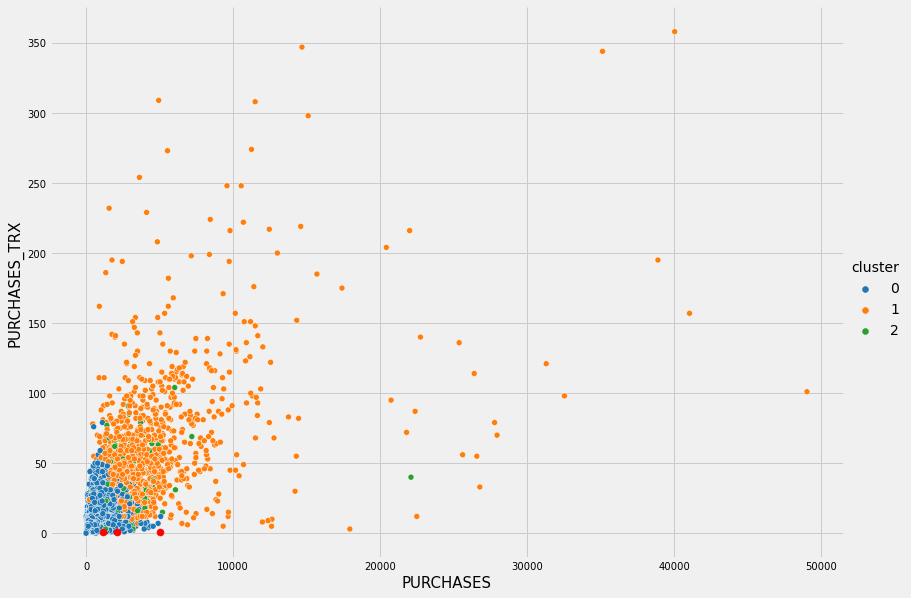

In [89]:
centroids = minibatch.cluster_centers_
centroids = scaler.inverse_transform(centroids)
print(centroids)


sns.relplot(data = df_cluster_with_minibatch ,x='PURCHASES' , y  ='PURCHASES_TRX', hue='cluster', palette='tab10' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("PURCHASES_TRX",fontsize=15)

Text(14.673052142687553, 0.5, 'CASH_ADVANCE')

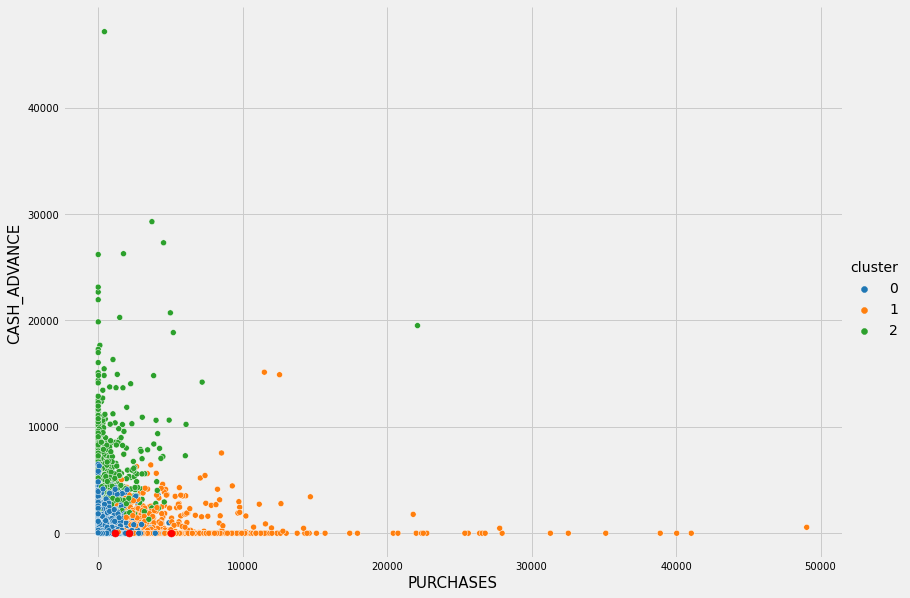

In [90]:
sns.relplot(data = df_cluster_with_minibatch ,x='PURCHASES' , y  ='CASH_ADVANCE', hue='cluster', palette='tab10' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("CASH_ADVANCE",fontsize=15)

### visualizing by original data

[[9.17202251e+02 8.84653804e-01 6.36474224e+02 3.32547447e+02
  3.04465253e+02 5.37780413e+02 4.70355910e-01 1.67557392e-01
  3.49967970e-01 1.11003648e-01 2.42272080e+00 1.15324074e+01
  2.82344136e+03 1.05206650e+03 6.10810727e+02 1.57731654e-01
  1.14711538e+01]
 [4.38956471e+03 9.27059247e-01 7.92863123e+03 5.43304945e+03
  2.49558178e+03 6.29648194e+03 6.88741603e-01 5.18324151e-01
  5.54053247e-01 3.29656616e-01 1.22328767e+01 6.40000000e+01
  1.07547945e+04 1.48457541e+04 2.33397490e+03 2.89480849e-01
  1.17808219e+01]
 [3.44125308e+03 9.40730452e-01 1.67125841e+03 1.05719485e+03
  6.14796166e+02 2.12274209e+03 5.44765551e-01 3.21987873e-01
  3.87386623e-01 2.18817635e-01 6.04151404e+00 2.33113553e+01
  9.50073260e+03 2.91796338e+03 1.52886687e+03 1.49769796e-01
  1.17448107e+01]]


Text(13.775905597103517, 0.5, 'PURCHASES_TRX')

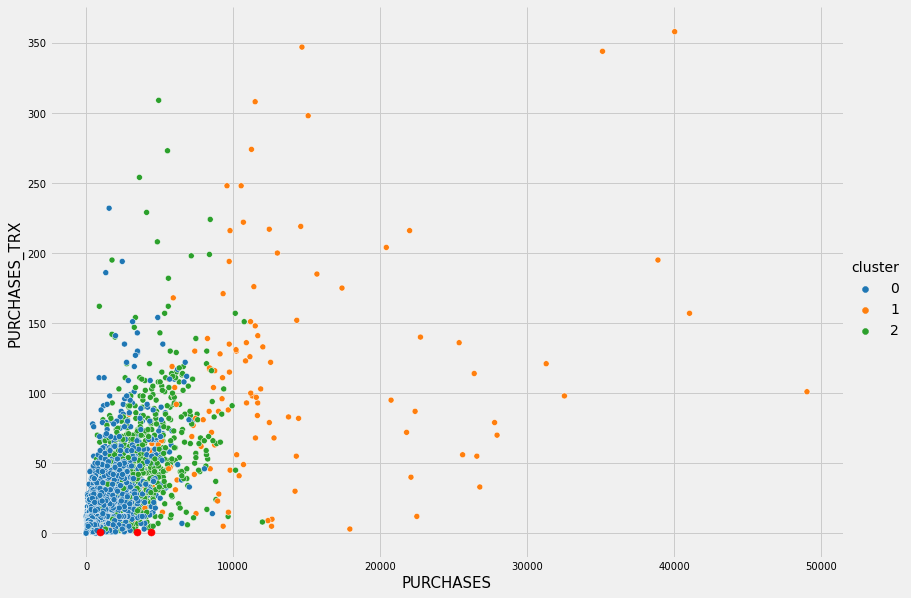

In [91]:
minibatch_df = minibatch.fit(df)
centroids = minibatch_df.cluster_centers_
print(centroids)

df_minibatch = df.copy()
df_minibatch['cluster'] = minibatch_df.labels_

sns.relplot(data = df_minibatch ,x='PURCHASES' , y  ='PURCHASES_TRX', hue='cluster', palette='tab10' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("PURCHASES_TRX",fontsize=15)

Text(14.673052142687553, 0.5, 'CASH_ADVANCE')

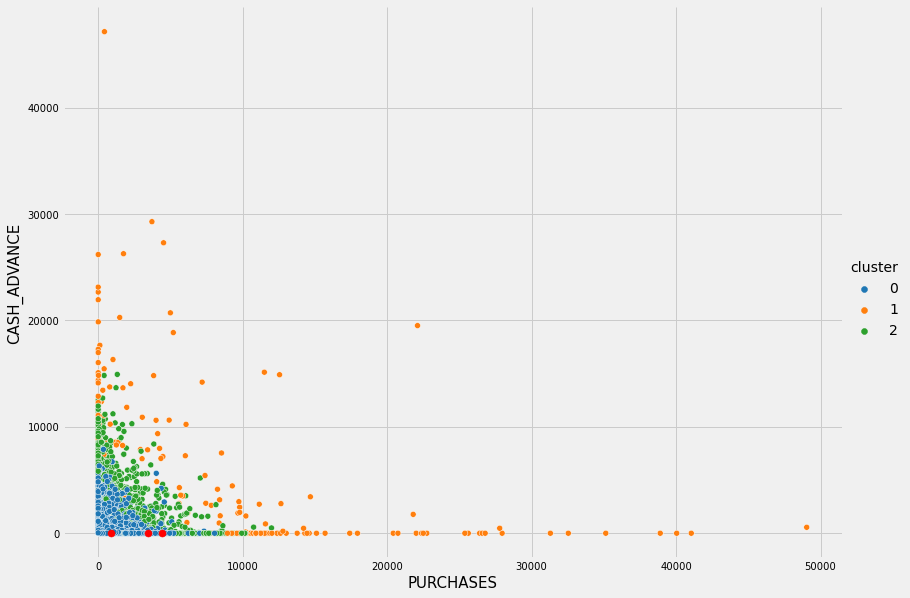

In [92]:
sns.relplot(data = df_minibatch ,x='PURCHASES' , y  ='CASH_ADVANCE', hue='cluster', palette='tab10' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("CASH_ADVANCE",fontsize=15)

# 
# 
## Mean Shift
Mean Shift is an unsupervised machine learning algorithm. It is a hierarchical data clustering algorithm that finds the number of clusters a feature space should be divided into, as well as the location of the clusters and their centers. It works by grouping data points according to a “bandwidth”, a distance around data points, and converging the clusters’ centers towards the densest regions of data.
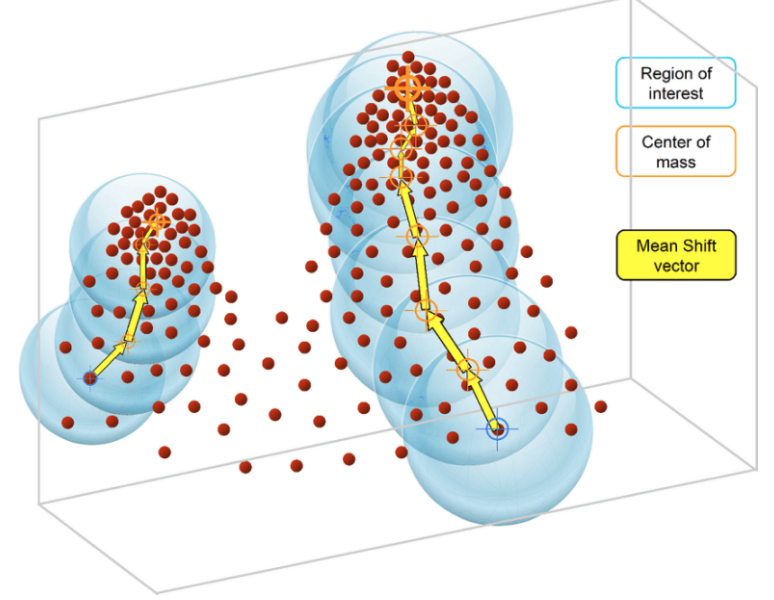
1. Initialize random seed and window W.
2. Calculate the center of gravity (mean) of W.    
3. Shift the search window to the mean.    
4. Repeat Step 2 until convergence.

In [148]:
from sklearn.cluster import MeanShift
meanshift = MeanShift(bandwidth= 12)
meanshift.fit(scaled_features)
cluster_centers = meanshift.cluster_centers_
labels = meanshift.labels_
np.unique(labels)

array([0, 1, 2, 3, 4], dtype=int64)

In [149]:
score = silhouette_score(scaled_features, meanshift.labels_)
score

0.7462887740163403

In [151]:
#adding cluster column to dataframe
df_cluster_with_meanshift = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_meanshift

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3      817.714335           1.000000      16.00             16.00   
4     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8631     5.871712           0.500000      20.90             20.90   
8632    28.493517           1.000000     291.12              0.00   
8633    23.398673           0.833333     144.40              0.00   
8634    13.457564           0.833333       0.00              0.00   
8635   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      0.000000             0.083333   
4                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8631                    0.00      0.000000             0.166667   
8632                  291.12      0.000000             1.000000   
8633                  144.40      0.000000             0.833333   
8634                    0.00     36.558778             0.000000   
8635                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8631                    0.166667                          0.000000   
8632                    0.000000                          0.833333   
8633                    0.000000                          0.666667   
8634                    0.000000                          0.000000   
8635                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8631                0.000000                 0              1         500.0   
8632                0.000000                 0              6        1000.0   
8633                0.000000                 0              5        1000.0   
8634                0.166667                 2              0         500.0   
8635                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        0  
1     4103.032597       1072.340217          0.222222      12        0  
2      622.066742        627.284787          0.000000      12        0  
3      678.334763        244.791237          0.000000      12        0  
4     1400.057770       2407.246035          0.000000      12        0  
...           ...               ...               ...     ...      ...  
8631    58.644883         43.473717          0.000000       6        0  
86

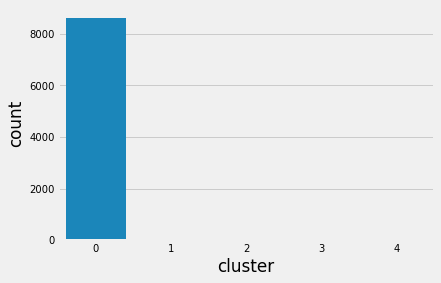

In [152]:
# counting number of clusters
sns.countplot(x=df_cluster_with_meanshift.cluster)
plt.show()

من اندازه های مختلف باند را برای این الگوریتم آزمایش کردم تعداد کلاسترهای ایجاد شده و نحوه پر شدن آنها در هر حالت را در زیر مشاهده می کنید:

bandwidth = 6 

silhouette_score = 0.4995750822656693

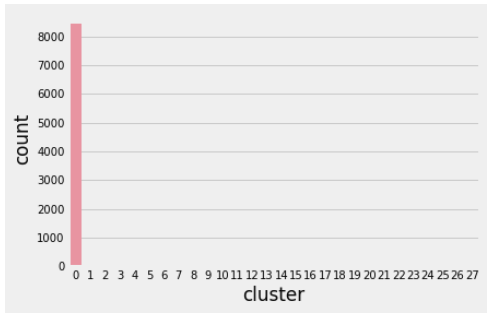
-----------------------------------------------------------------------------------------------------------------------

bandwidth= 8

silhouette_score = 0.6250768730821703

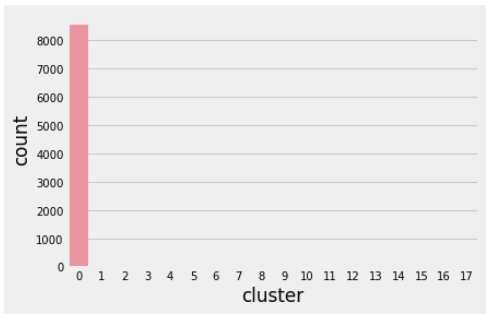
----------------------------------------------------------------------------------------------------------------------------------------
bandwidth= 10

silhouette_score = 0.7261554913637849
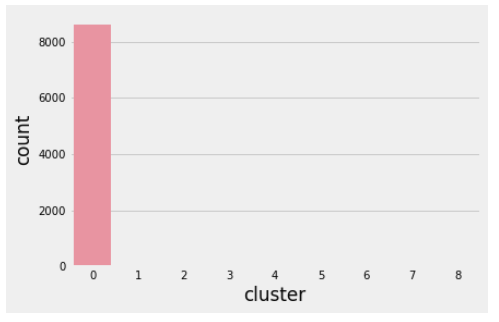

-----------------------------------------------------------------------------------------------------------------------
bandwidth= 12

silhouette_score = 0.7462887740163403
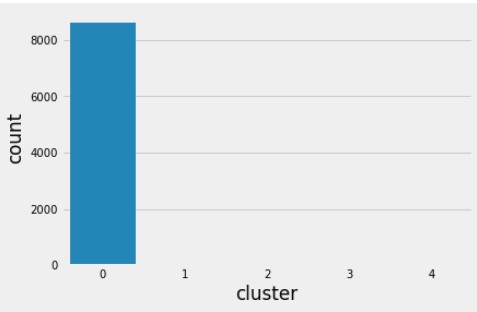
----------------------------------------------------------------------------------------------------------------------------------------
bandwidth= 13

silhouette_score = 0.7729757576942968
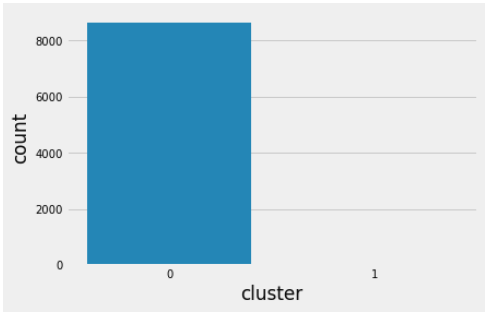

----------------------------------------------------------------------------------------------------------------------
bandwidth= 14

silhouette_score = 0.7729757576942968
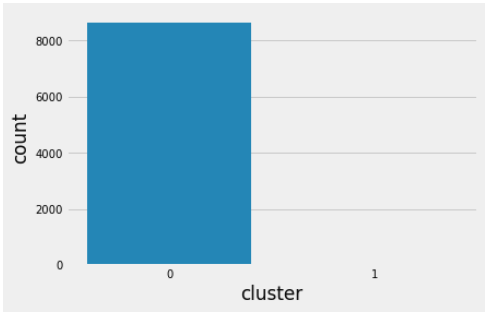
-----------------------------------------------------------------------------------------------------------------------
bandwidth = 15

silhouette_score = Number of labels is 1 , Invalid for silhouette_score

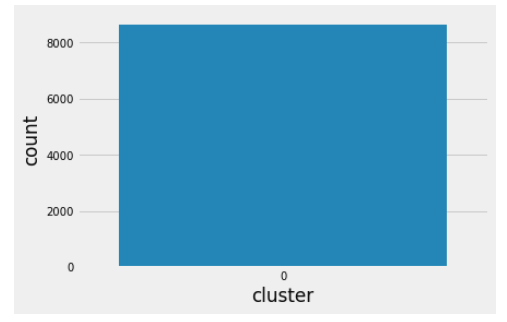

نتایج نشان می دهد که در تمام حالتها ،این الگوریتم تمام داده ها را فقط در کلاس صفر قرار می دهد و بقیه را خالی می گذارد. این نشان می دهد که این الگوریتم برای کلاستر بندی این دیتا مناسب نمی باشد.و بیشتر برای کارهایی مثل پردازش تصویر مناسب است.

# 
# 
## Affinity Propagation
Affinity propagation is a clustering algorithm introduced by Frey and Dueck (2007) .AffinityPropagation creates clusters by sending messages between pairs of samples until convergence.

Those observations who can serve as exemplars for others will eventually become the cluster centers.
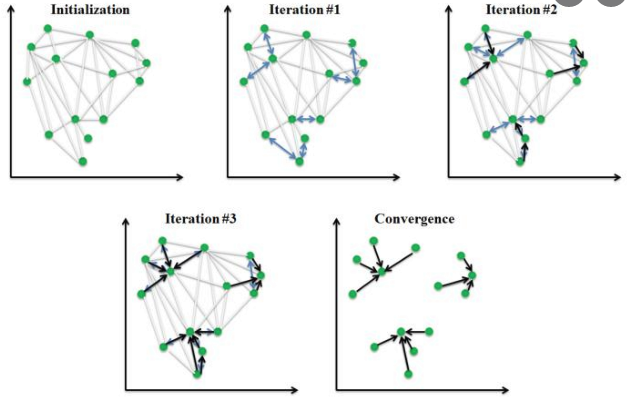


In [153]:
from sklearn.cluster import AffinityPropagation
Affinity = AffinityPropagation(random_state=5)
Affinity.fit(scaled_features)
labels = Affinity.labels_
np.unique(labels)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [154]:
from sklearn.cluster import AffinityPropagation
Affinity = AffinityPropagation(damping= 0.9)
Affinity.fit(scaled_features)
labels = Affinity.labels_
np.unique(labels)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [155]:
from sklearn.cluster import AffinityPropagation
Affinity = AffinityPropagation(damping= 0.5)
Affinity.fit(scaled_features)
labels = Affinity.labels_
np.unique(labels)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

### results:
#### I triyed affinity algorithm with different damping factors
#### Damping factor is varing in the range [0.5, 1.0)
#### Damping factor=0.5 ----> 356 cluster
#### Damping factor=0.5  -----> 342 cluster
#### so high number of clusters shows that this algorithm is not suitable for this data
# 

# 
### DBSCAN
DBSCAN is a density-based clustering algorithm that forms clusters of dense regions of data points ignoring the low-density areas (considering them as noise).
#### Advantages of DBSCAN
Works well for noisy datasets.
Can identity Outliers easily.
Clusters can take any irregular shape unlike K-Means where clusters are more or less spherical.
#### Disadvantages of DBSCAN
Does not work very well for sparse datasets or datasets with varying density.
Sensitive to eps and minPts parameters.
Not partitionable for multiprocessor systems.
#### DBSCAN Parameters
DBSCAN uses the following two user defined parameters for clustering:

Epsilon (eps): It is defined as the maximum distance between two points to be considered as neighboring points (belonging to the same cluster).

Minimum Points (min_samples or minPts): This defines the minimum number of neighboring points that a given point needs to be considered a core data point. This includes the point itself. For example, if minimum number of points is set to 4, then a given point needs to have 3 or more neighboring data points to be considered a core data point.
If minimum number of points meet the epsilon distance requirement then they are considered as a cluster.
#### DBSCAN Algorithm
1. Decide the value of eps and minPts.
2. For each point:
Calculate its distance from all other points. If the distance is less than or equal to eps then mark that point as a neighbor of x.
If the point gets a neighboring count greater than or equal to minPts, then mark it as a core point or visited.
3. For each core point, if it not already assigned to a cluster than create a new cluster. Recursively find all its neighboring points and assign them the same cluster as the core point.
4. Continue these steps until all the unvisited points are covered
#### Output:
Label = -1 means it is a noise point (outlier).
Label = 0 or more, indicates the cluster number.
#### Since clusters depend on the mean value of cluster elements, each data point plays a role in forming the clusters. A slight change in data points might affect the clustering outcome. This problem is greatly reduced in DBSCAN due to the way clusters are formed.

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
min_samples = np.arange(5,20,1)

Eps=[]
Min_samples=[]
num_clusters = []
silhouette_coefficients = []
best_n_clusters = 2
max_sil = 0
for i in  range(2,21):
    for j in  range(1,5):
        model_db = DBSCAN(eps=j, min_samples = i, metric='euclidean')
        model_db.fit(scaled_features)
        labels = model_db.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)#cluster (-1), is not exactly part of a cluster. They are simply points that do not belong to any clusters and can be "ignored" to some extent.
        num_clusters.append(n_clusters_)
        Min_samples.append(i)
        Eps.append(j)
    
        score = silhouette_score(scaled_features,  model_db.labels_)
        silhouette_coefficients.append(score)
        if (score > max_sil) and (n_clusters_>=2):
            max_sil = score
            best_n_clusters = n_clusters_ 
            min_sample = i
            ep = j


NameError: name 'scaled_features' is not defined

In [3]:
print("maximum of silhouette:",max_sil)
print('best_n_clusters:',best_n_clusters)
print('min_samples:',min_sample)
print('best eps:',ep)

maximum of silhouette: 0
best_n_clusters: 2


NameError: name 'min_sample' is not defined

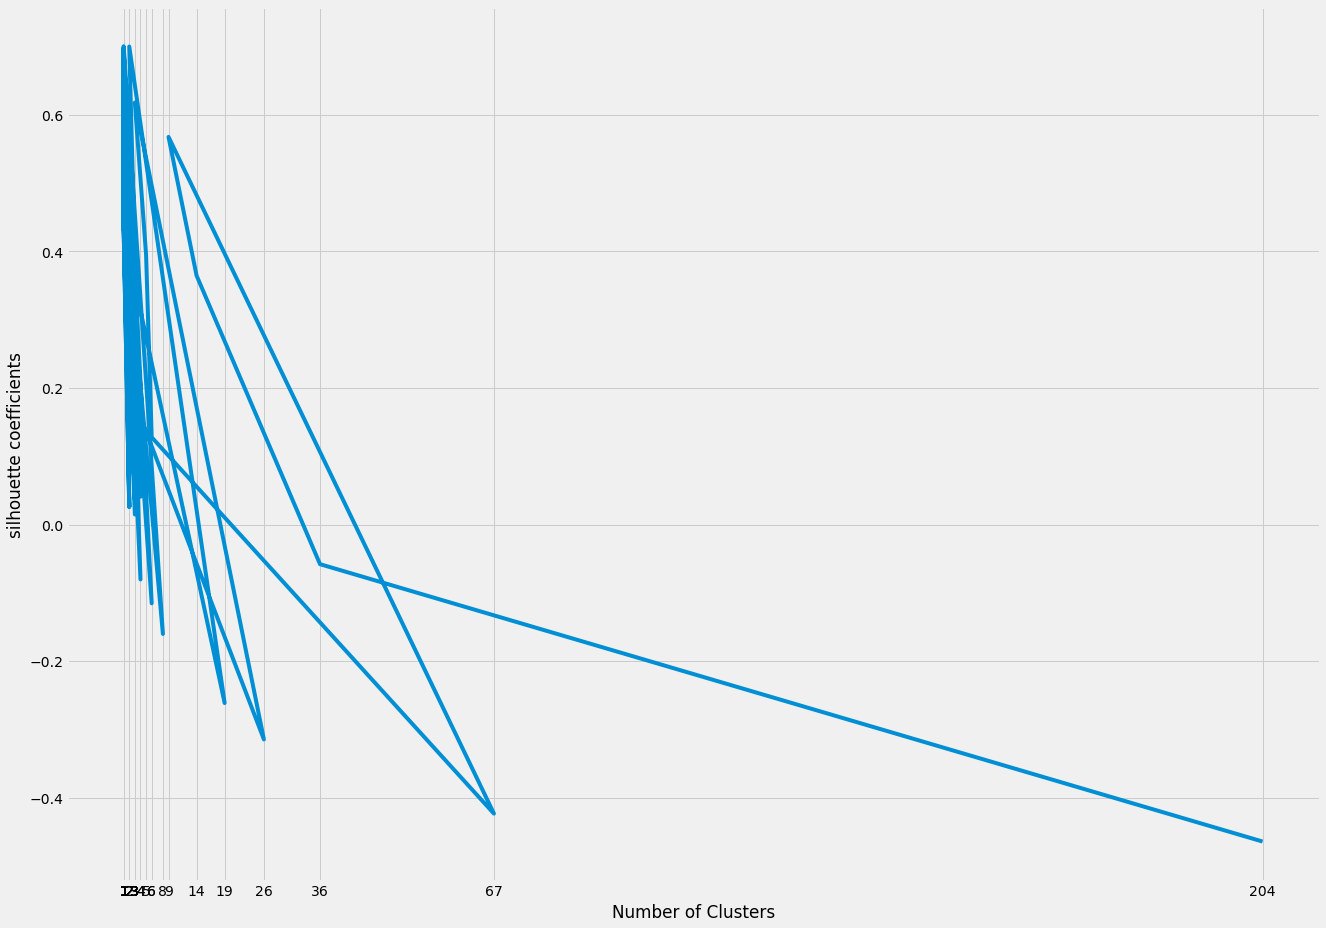

In [214]:
plt.subplots(figsize=(20,15))
plt.style.use("fivethirtyeight")
plt.plot(num_clusters, silhouette_coefficients)
plt.xticks(num_clusters)
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()   

In [217]:
dbscan_data = pd.DataFrame({'num_clusters': num_clusters,'silhouette_coefficients':silhouette_coefficients,'eps':Eps,'min_samples':Min_samples})
dbscan_data.sort_values(by='silhouette_coefficients',inplace=True,ascending=False)
dbscan_data 

num_clusters  silhouette_coefficients  eps  min_samples
15             1                 0.700390    4            5
11             2                 0.699979    4            4
19             1                 0.697745    4            6
23             1                 0.697139    4            7
27             1                 0.695743    4            8
..           ...                      ...  ...          ...
16             8                -0.160242    1            6
12            19                -0.261413    1            5
8             26                -0.314724    1            4
4             67                -0.423325    1            3
0            204                -0.464222    1            2

[76 rows x 4 columns]

In [218]:
# one cluster is not suitable so i drop them
dbscan_data = dbscan_data[dbscan_data['num_clusters']>= 2]
dbscan_data

num_clusters  silhouette_coefficients  eps  min_samples
11             2                 0.699979    4            4
7              3                 0.618033    4            3
3              9                 0.567653    4            2
10             3                 0.395873    3            4
6              5                 0.395054    3            3
13             2                 0.389836    2            5
2             14                 0.364590    3            2
9              3                 0.179031    2            4
5              6                 0.127814    2            3
44             2                 0.092436    1           13
64             2                 0.088341    1           18
32             3                 0.077978    1           10
60             3                 0.074060    1           17
36             3                 0.059046    1           11
40             3                 0.056163    1           12
56             4                 0.040712    1           16
52             3                 0.039291    1           15
28             3                 0.036737    1            9
68             2                 0.026282    1           19
72             2                 0.025512    1           20
48             3                 0.014724    1           14
1             36                -0.058037    2            2
24             4                -0.080445    1            8
20             6                -0.115380    1            7
16             8                -0.160242    1            6
12            19                -0.261413    1            5
8             26                -0.314724    1            4
4             67                -0.423325    1            3
0            204                -0.464222    1            2

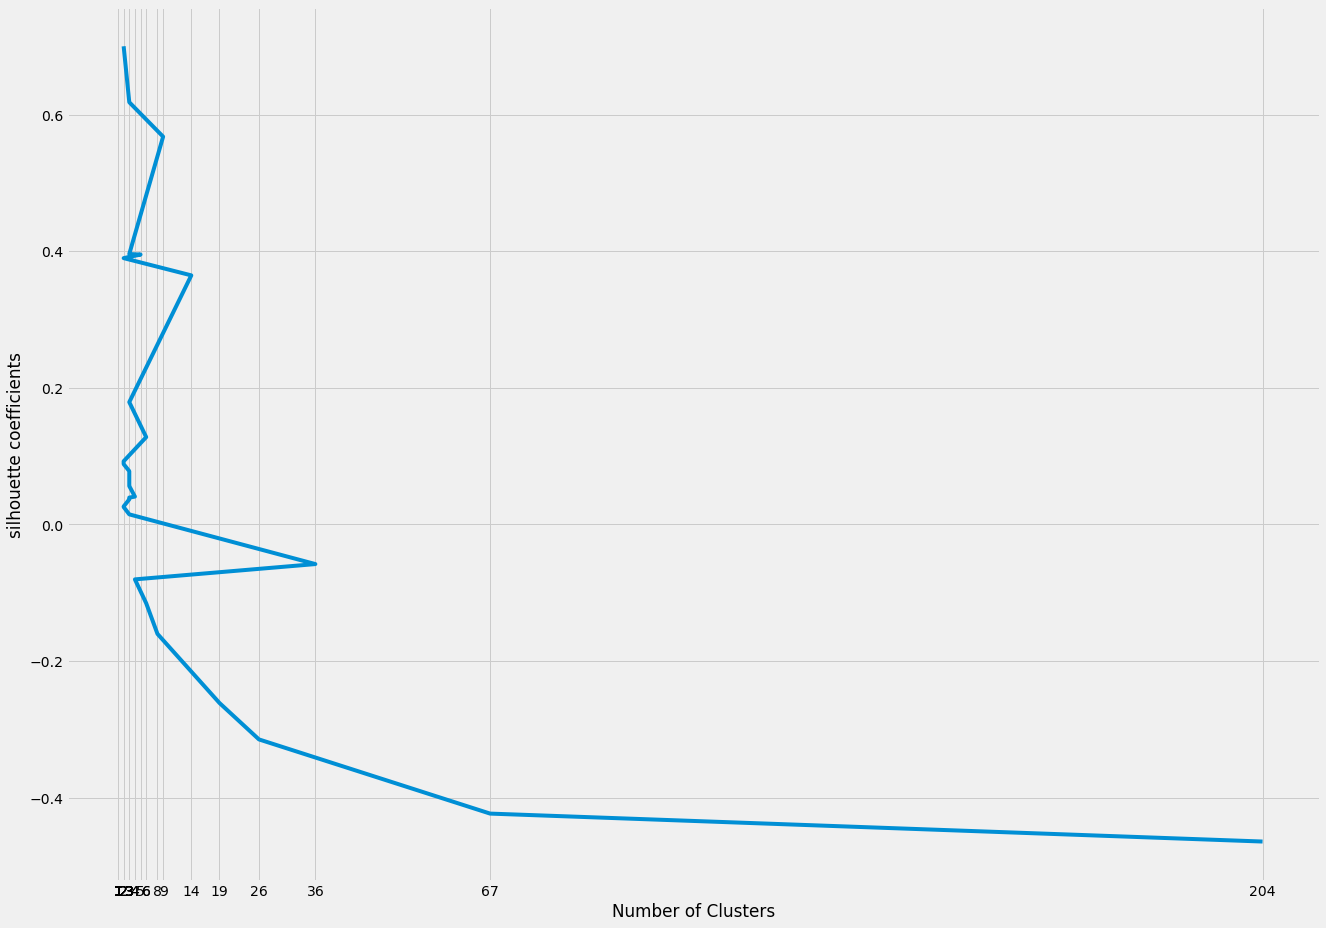

In [220]:
plt.subplots(figsize=(20,15))
plt.style.use("fivethirtyeight")
plt.plot(dbscan_data['num_clusters'], dbscan_data['silhouette_coefficients'])
plt.xticks(num_clusters)
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()   

In [231]:
model_db = DBSCAN(eps=4, min_samples=4, metric='euclidean')
model_db.fit(scaled_features)
labels = model_db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
outlier = list(labels).count(-1)
score = silhouette_score(scaled_features,  model_db.labels_)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of outlier points: %d' % outlier)
print("silhouette_score:",score)

Estimated number of clusters: 2
Estimated number of outlier points: 89
silhouette_score: 0.6999788161580581


In [232]:
#adding cluster column to dataframe
df_cluster_with_dbscan = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_dbscan

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12      0.0  
1     4103.032597       1072.340217          0.222222      12      0.0  
2      622.066742        627.284787          0.000000      12      0.0  
3        0.000000               NaN          0.000000      12      0.0  
4      678.334763        244.791237          0.000000      12      0.0  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000       6      NaN  
89

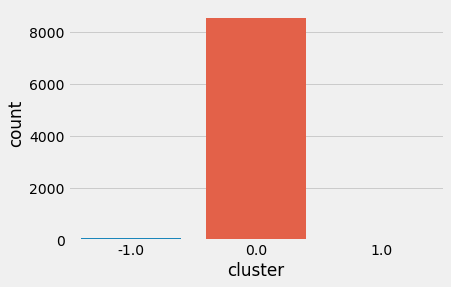

In [233]:
# counting number of clusters
sns.countplot(x=df_cluster_with_dbscan.cluster)
plt.show()

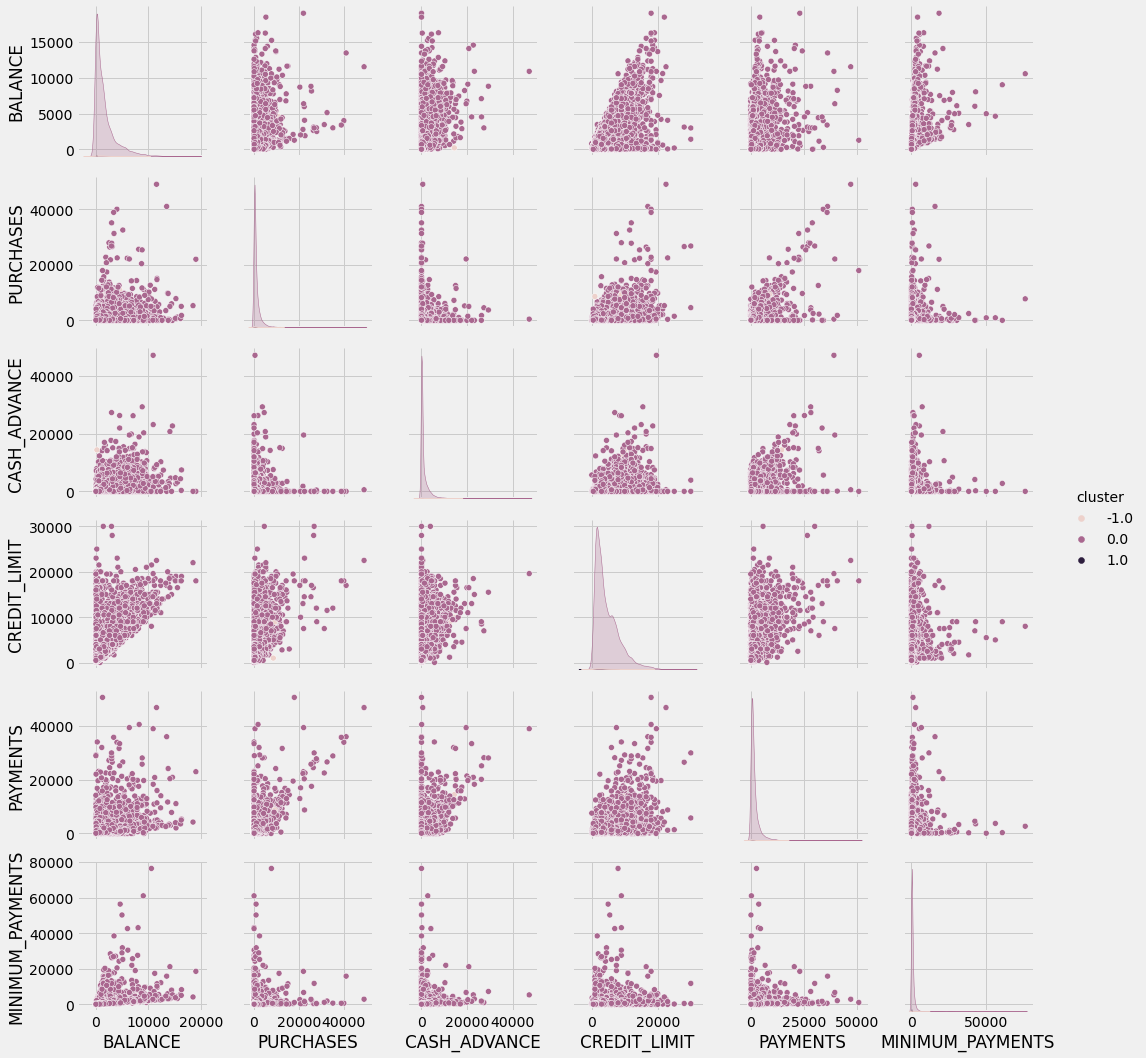

In [234]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","cluster"]
sns.pairplot( df_cluster_with_dbscan[ best_cols ], hue="cluster")

# 
### comparing models with outliers

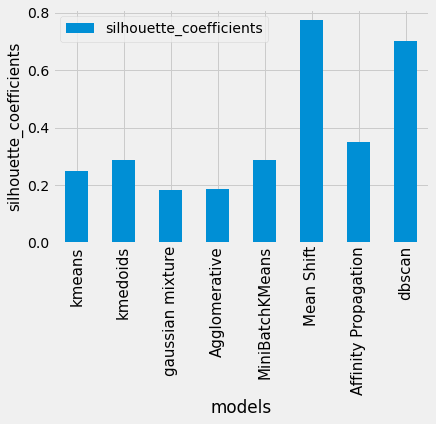

In [56]:
df12 = pd.DataFrame({'models':['kmeans','kmedoids','gaussian mixture','Agglomerative','MiniBatchKMeans' ,'Mean Shift', 'Affinity Propagation', 'dbscan'], 'silhouette_coefficients':[0.24771296656343036,0.2886451888261335,0.18353676992495227,0.1865256797594413,0.28791103092641435, 0.7729757576942968, 0.3497053045186641, 0.6999788161580581]})
ax = df12.plot.bar(x='models', y='silhouette_coefficients', rot=90)
plt.xticks(fontsize=15)
plt.ylabel("silhouette_coefficients",fontsize=15)
plt.show()

تحلیل و گزارش نمودار بالا:

پنج الگوریتم اول گرچه امتیاز کمتری نسبت به سه تای آخر کسب کرده اند اما تصاویر کلاس بندیها نشان دادند که جداسازی دقیقتری انجام داده اند. از بین پنج تای اول بهترین امتیاز توسط

kmedoid  
کسب شده است زیرا این الگوریتم همانطور که بیان شد به نقاط پرت حساس نمی باشد. سه الگوریتم آخر گرچه امتیاز بالایی گرفته اند اما کلاس بندی آنها خراب بود .به صورتی که تمام دیتا را در یک کلاس ریخته و همانطورکه مشاهده نمودید بقیه را خالی می گذاشتند.و در واقع هیچ کلاستر بندی انجام نمی دادند.  

# 
## outliers analisys

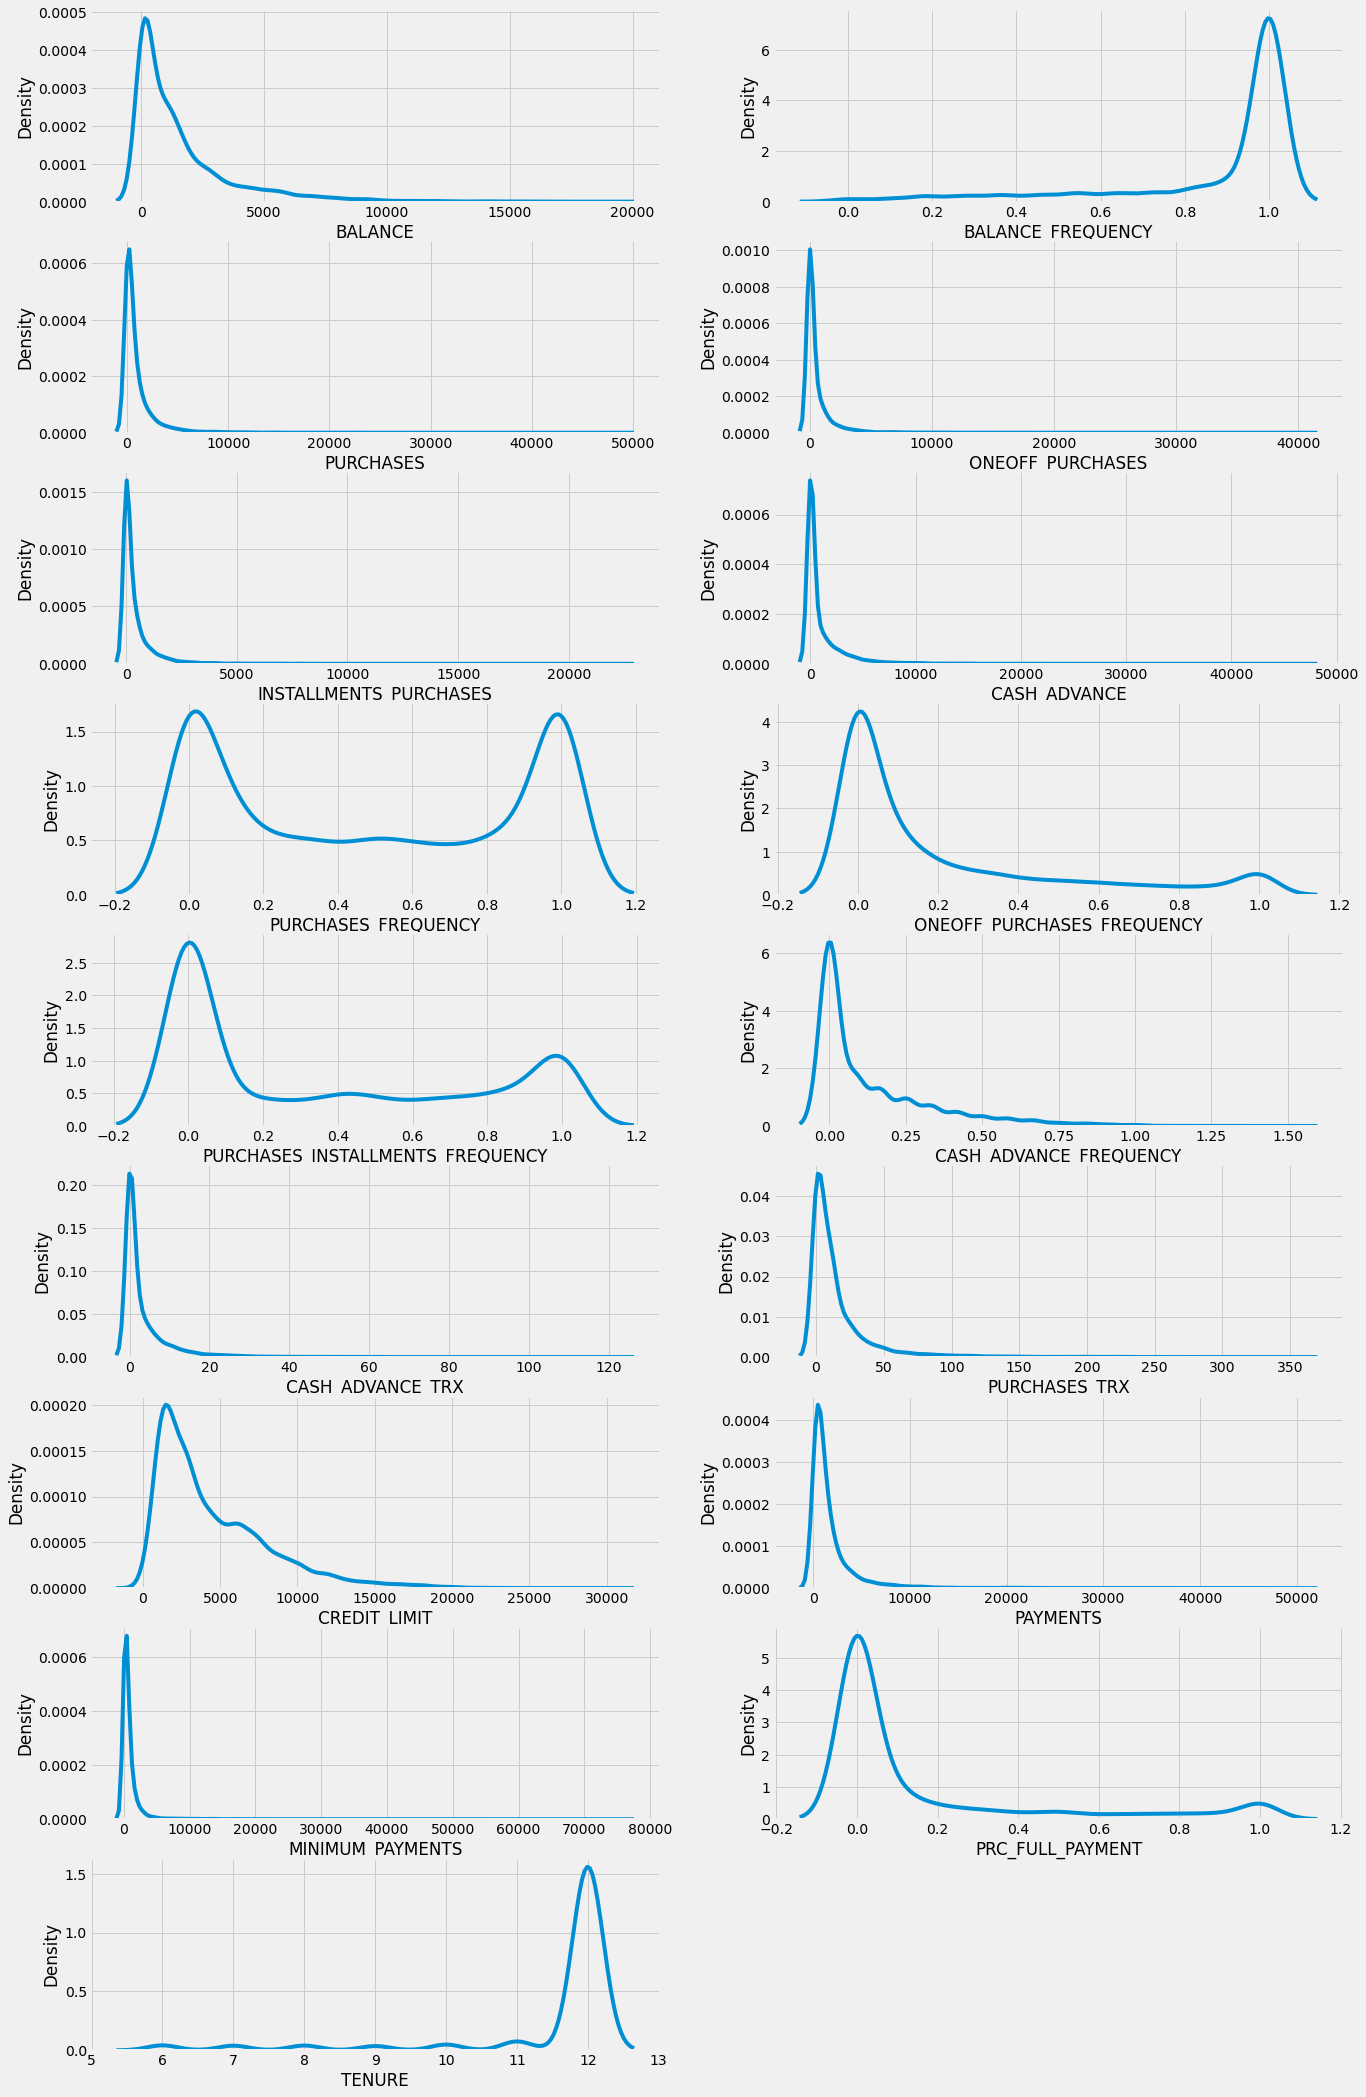

In [235]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df[col])
    plt.xlabel(col)
        
plt.show()

### lots of skewness shows lots of outliers. this outliers are Distribution-based : Outliers are the data points that occupy the tail ends of the distribution curve.
# 

## handling outliers
###  detecting  and deleting

What is z-score meaning?

One of the most commonly used tools in determining outliers is the Z-score. Z-score is just the number of standard deviations away from the mean and indicates how much a given value differs from the standard deviation.

The z-score in the center of the curve is zero. The z-scores to the right of the mean are positive and the z-scores to the left of the mean are negative.
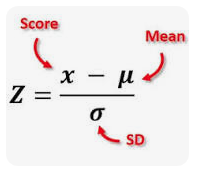

you can see this teaching at this link:

https://medium.com/clarusway/z-score-and-how-its-used-to-determine-an-outlier-642110f3b482#:~:text=Take%20your%20data%20point%2C%20subtract,%2C%20winsorize%2C%20and%20similar%20methods.

you can use this code insted of library

df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)


In [38]:
#zscore is availabe in scipy.stats
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

[[0.74462486 0.37004679 0.42918384 ... 0.30550763 0.53772694 0.35518066]
 [0.76415211 0.06767893 0.47320819 ... 0.08768873 0.21238001 0.35518066]
 [0.42660239 0.50540465 0.11641251 ... 0.09990611 0.53772694 0.35518066]
 ...
 [0.75297728 0.29709491 0.40657175 ... 0.32957217 0.30614422 4.22180042]
 [0.75772142 0.29709491 0.47320819 ... 0.34081076 0.30614422 4.22180042]
 [0.58627829 1.09958965 0.03129519 ... 0.32709767 0.53772694 4.22180042]]


In [39]:
z.shape

(8636, 17)

In [40]:
#you can define the threshold value for the z score to classify a point as an outlier or not
threshold = 3
print(np.where(z > 3))

(array([   5,   18,   19, ..., 8633, 8634, 8635], dtype=int64), array([ 3, 14, 14, ..., 16, 16, 16], dtype=int64))


In [41]:
#deleting outliers and put them in df1
df1 = df[(z < 3).all(axis=1)]
df1.shape

(7190, 17)

In [48]:
df1

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3      817.714335           1.000000      16.00             16.00   
4     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8567   121.294493           0.750000     385.26            385.26   
8568    55.147722           0.875000     163.31              0.00   
8569   869.328293           0.750000       0.00              0.00   
8570   137.744895           1.000000     441.00              0.00   
8571   331.070135           0.750000      81.20             81.20   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      0.000000             0.083333   
4                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8567                    0.00    169.554775             0.500000   
8568                  163.31      0.000000             0.875000   
8569                    0.00   1153.925205             0.000000   
8570                  441.00      0.000000             0.750000   
8571                    0.00    419.341394             0.125000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8567                    0.500000                          0.000000   
8568                    0.000000                          0.750000   
8569                    0.000000                          0.000000   
8570                    0.000000                          0.625000   
8571                    0.125000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                      0.000                 0              2        1000.0   
1                      0.250                 4              0        7000.0   
2                      0.000                 0             12        7500.0   
3                      0.000                 0              1        1200.0   
4                      0.000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8567                   0.125                 3              7         500.0   
8568                   0.000                 0              7        1000.0   
8569                   0.125                 3              0        1200.0   
8570                   0.000                 0              6        1000.0   
8571                   0.250                 7              1         500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3      678.334763        244.791237          0.000000      12  
4     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8567    98.225317        113.944625          0.000000       8  
8568    62.619008        109.580539          0.000000       8  
8569   150

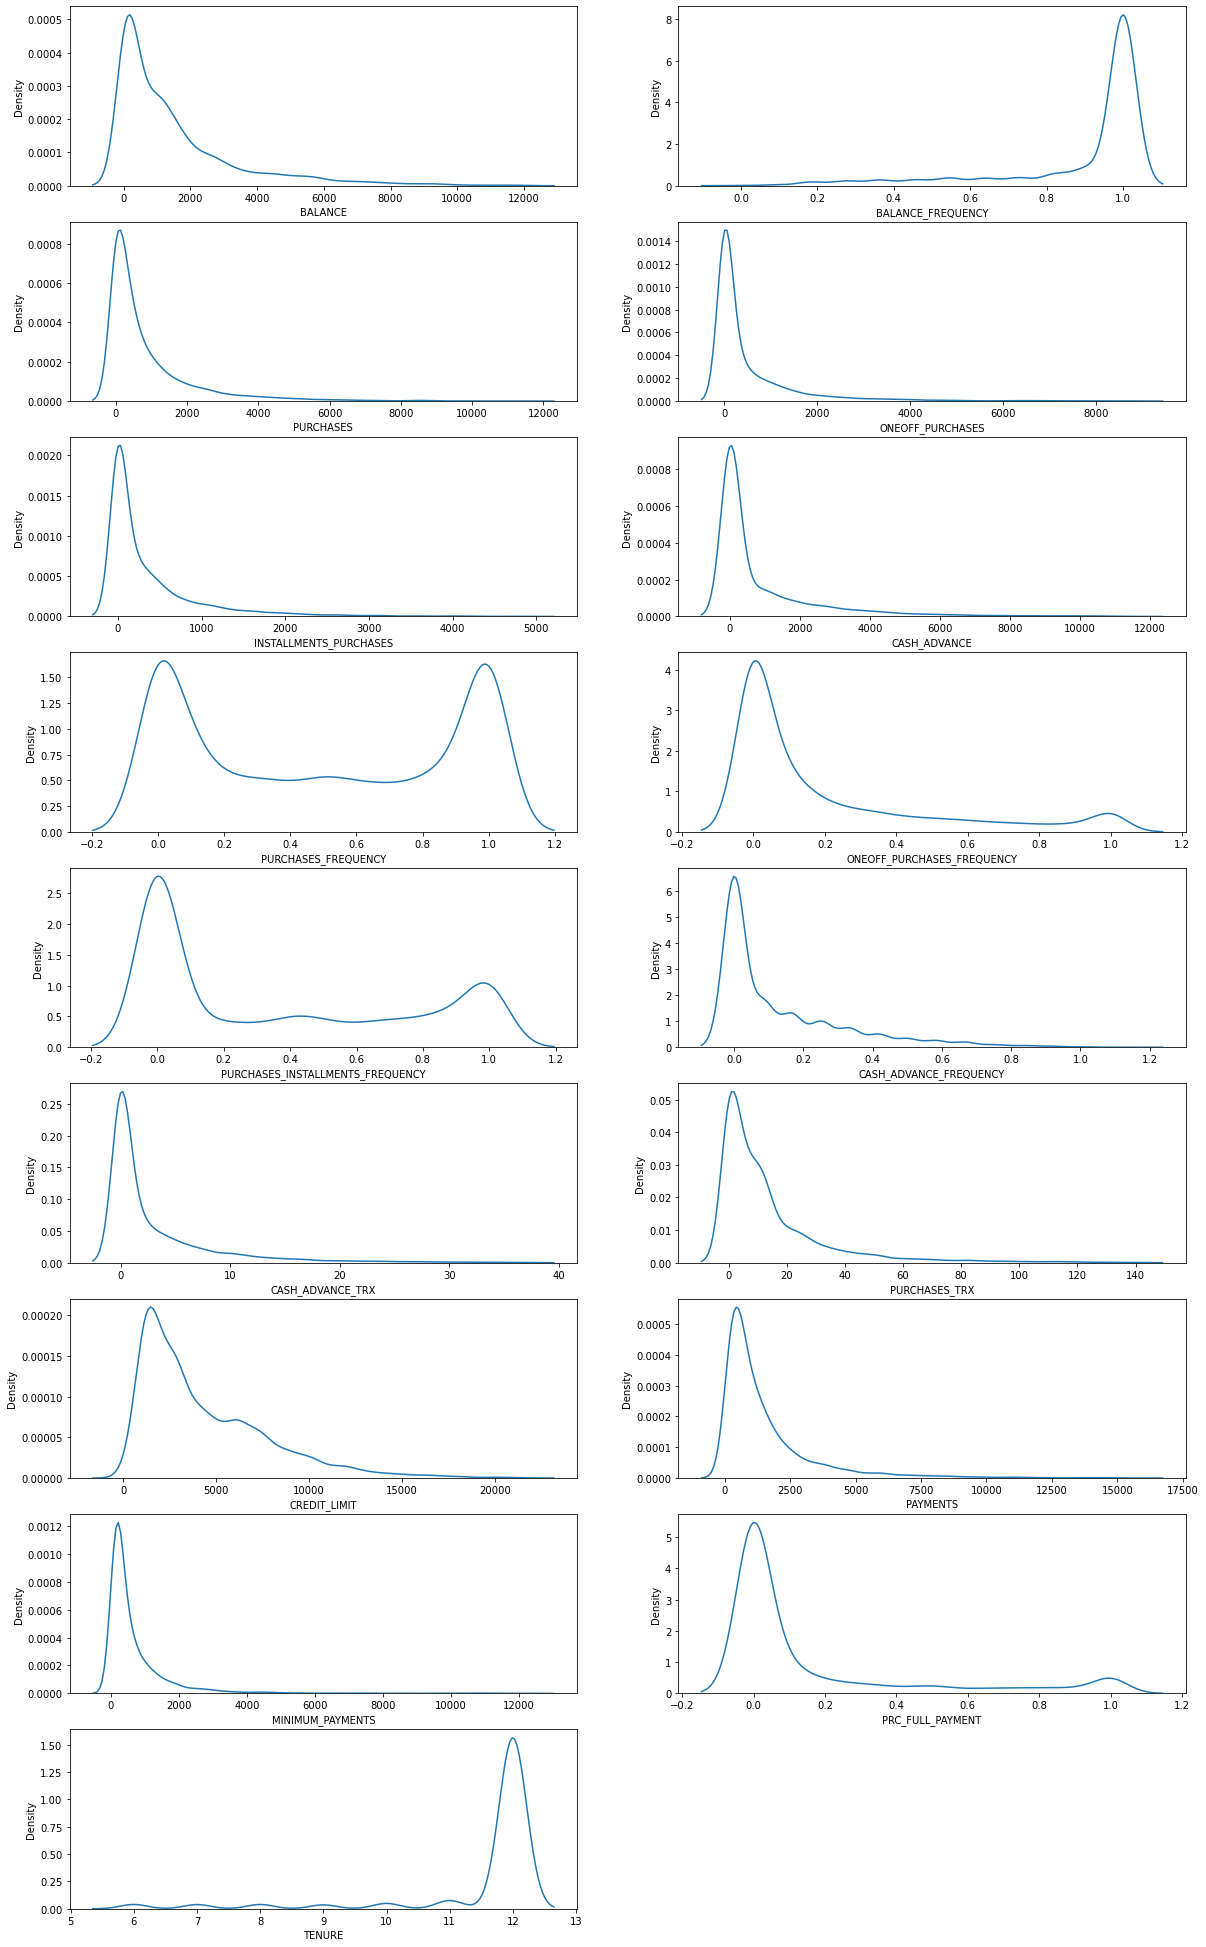

In [35]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df1.columns):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df1[col])
    plt.xlabel(col)
        
plt.show()

if you compare with previous picture this one has less outliers

## making model without outlier

In [42]:
scaler = StandardScaler()
X = scaler.fit_transform(df1)

## kmeans without outlier

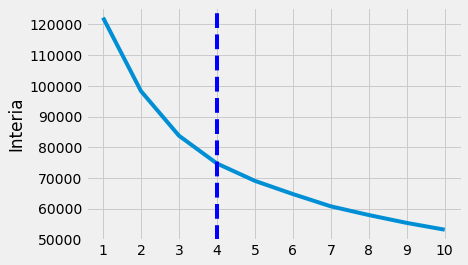

In [43]:
List = []
for k in range(1,11):#this range is optional
    kmeans = KMeans(n_clusters=k, init= "random",max_iter = 300, random_state = 1, n_init = 10) 
    kmeans.fit(X)
    List.append(kmeans.inertia_)
from kneed import KneeLocator
kl = KneeLocator(range(1,11), List, curve='convex', direction='decreasing')
kl.elbow
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),List)
plt.xticks(range(1,11))
plt.ylabel("Interia")
plt.axvline(x=kl.elbow, color='b', label='axvline - full height', ls='--')
plt.show()    

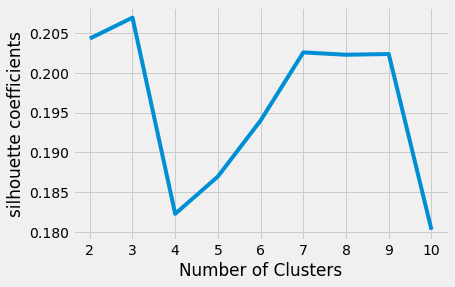

maxs silhouette 0.2069411643983203


In [68]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k,init= "random", random_state = 1)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()
print('maxs silhouette',max(silhouette_coefficients))

# 
## kmedoids without outlier

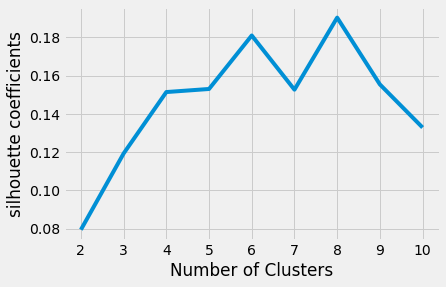

maxs silhouette 0.19029020866341254


In [67]:
from sklearn_extra.cluster import KMedoids
silhouette_coefficients = []
for k in range (2,11):
    kmedoids = KMedoids(n_clusters=k,init= "random", random_state = 5) 
    kmedoids.fit(X)
    score = silhouette_score(X, kmedoids.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()
print('maxs silhouette',max(silhouette_coefficients))

# 
## GaussianMixture without outlier

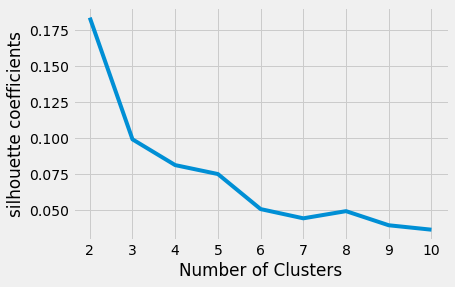

maxs silhouette 0.18353676992495227


In [73]:
from sklearn.mixture import GaussianMixture
sil_gmm = []
for k in range(2,11):#this range is optional
    gmm = GaussianMixture(n_components=k, random_state=1 )#each gaussian in your mixture is one component 
    gmm.fit(scaled_features)
    score = silhouette_score(scaled_features, gmm.predict(scaled_features),metric='euclidean',random_state=5)
    sil_gmm.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), sil_gmm)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show() 
print('maxs silhouette',max(sil_gmm ))

## AgglomerativeClustering 

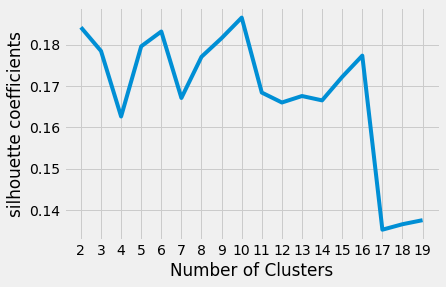

maxs silhouette 0.2069411643983203


In [69]:
from sklearn.cluster import AgglomerativeClustering 
sil_Hierarch = []
for k in range(2,20):#this range is optional
    Hierarch = AgglomerativeClustering(n_clusters = k,linkage='ward')#linkage determines which distance to use between sets of observstion.alghorithm minimize this distance 
    score = silhouette_score(scaled_features, Hierarch.fit_predict(scaled_features),metric='euclidean')
    sil_Hierarch.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,20), sil_Hierarch)
plt.xticks(range(2,20))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show() 
print('maxs silhouette',max(sil_Hierarch))

## MiniBatchKMeans

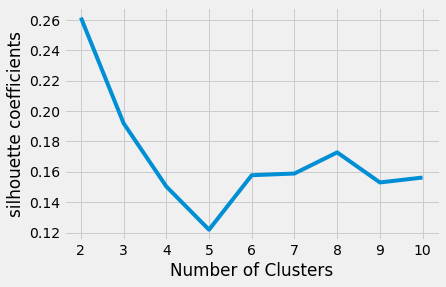

maxs silhouette 0.2615206109661179


In [72]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range (2,11):
    minibatch = MiniBatchKMeans(n_clusters=k, random_state =42, batch_size=50) 
    minibatch.fit(X)
    score = silhouette_score(X, minibatch.predict(X))
    silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show() 
print('maxs silhouette',max(silhouette_coefficients))

### results without outliers

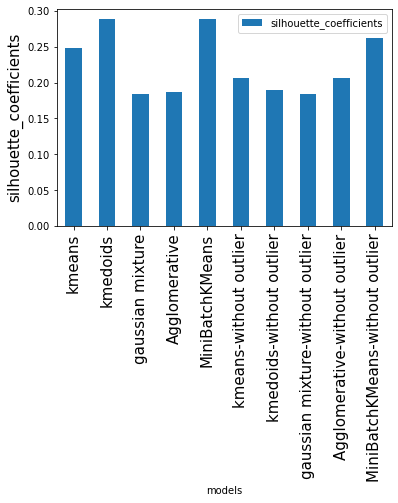

In [11]:
df13 = pd.DataFrame({'models':['kmeans','kmedoids','gaussian mixture','Agglomerative','MiniBatchKMeans' ,'kmeans-without outlier','kmedoids-without outlier', 'gaussian mixture-without outlier', 'Agglomerative-without outlier','MiniBatchKMeans-without outlier'], 'silhouette_coefficients':[0.24771296656343036,0.2886451888261335,0.18353676992495227,0.1865256797594413,0.28791103092641435,0.2069411643983203, 0.19029020866341254, 0.18353676992495227,0.2069411643983203,0.2615206109661179]})
ax = df13.plot.bar(x='models', y='silhouette_coefficients', rot=90)
plt.xticks(fontsize=15)
plt.ylabel("silhouette_coefficients",fontsize=15)
plt.show()

# All results

In [12]:
df13.sort_values(by='silhouette_coefficients',inplace=True,ascending=False)
df13['number of clusters'] = [2,3,2,3,3,10,8,2,2,2]
df13.reset_index( inplace = True)
df13.drop('index',axis=1,inplace = True)
df13

models  silhouette_coefficients  \
0                          kmedoids                 0.288645   
1                   MiniBatchKMeans                 0.287911   
2   MiniBatchKMeans-without outlier                 0.261521   
3                            kmeans                 0.247713   
4            kmeans-without outlier                 0.206941   
5     Agglomerative-without outlier                 0.206941   
6          kmedoids-without outlier                 0.190290   
7                     Agglomerative                 0.186526   
8                  gaussian mixture                 0.183537   
9  gaussian mixture-without outlier                 0.183537   

   number of clusters  
0                   2  
1                   3  
2                   2  
3                   3  
4                   3  
5                  10  
6                   8  
7                   2  
8                   2  
9                   2

## final data with clustering of kmedoids algorithm

In [138]:
df_cluster_with_kmediods

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3      817.714335           1.000000      16.00             16.00   
4     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8631     5.871712           0.500000      20.90             20.90   
8632    28.493517           1.000000     291.12              0.00   
8633    23.398673           0.833333     144.40              0.00   
8634    13.457564           0.833333       0.00              0.00   
8635   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      0.000000             0.083333   
4                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8631                    0.00      0.000000             0.166667   
8632                  291.12      0.000000             1.000000   
8633                  144.40      0.000000             0.833333   
8634                    0.00     36.558778             0.000000   
8635                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8631                    0.166667                          0.000000   
8632                    0.000000                          0.833333   
8633                    0.000000                          0.666667   
8634                    0.000000                          0.000000   
8635                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8631                0.000000                 0              1         500.0   
8632                0.000000                 0              6        1000.0   
8633                0.000000                 0              5        1000.0   
8634                0.166667                 2              0         500.0   
8635                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        0  
1     4103.032597       1072.340217          0.222222      12        0  
2      622.066742        627.284787          0.000000      12        1  
3      678.334763        244.791237          0.000000      12        0  
4     1400.057770       2407.246035          0.000000      12        0  
...           ...               ...               ...     ...      ...  
8631    58.644883         43.473717          0.000000       6        0  
86

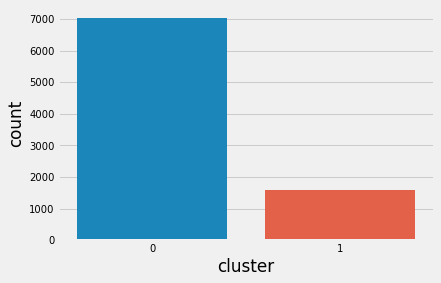

In [139]:
sns.countplot(x=df_cluster_with_kmediods.cluster)
plt.show()

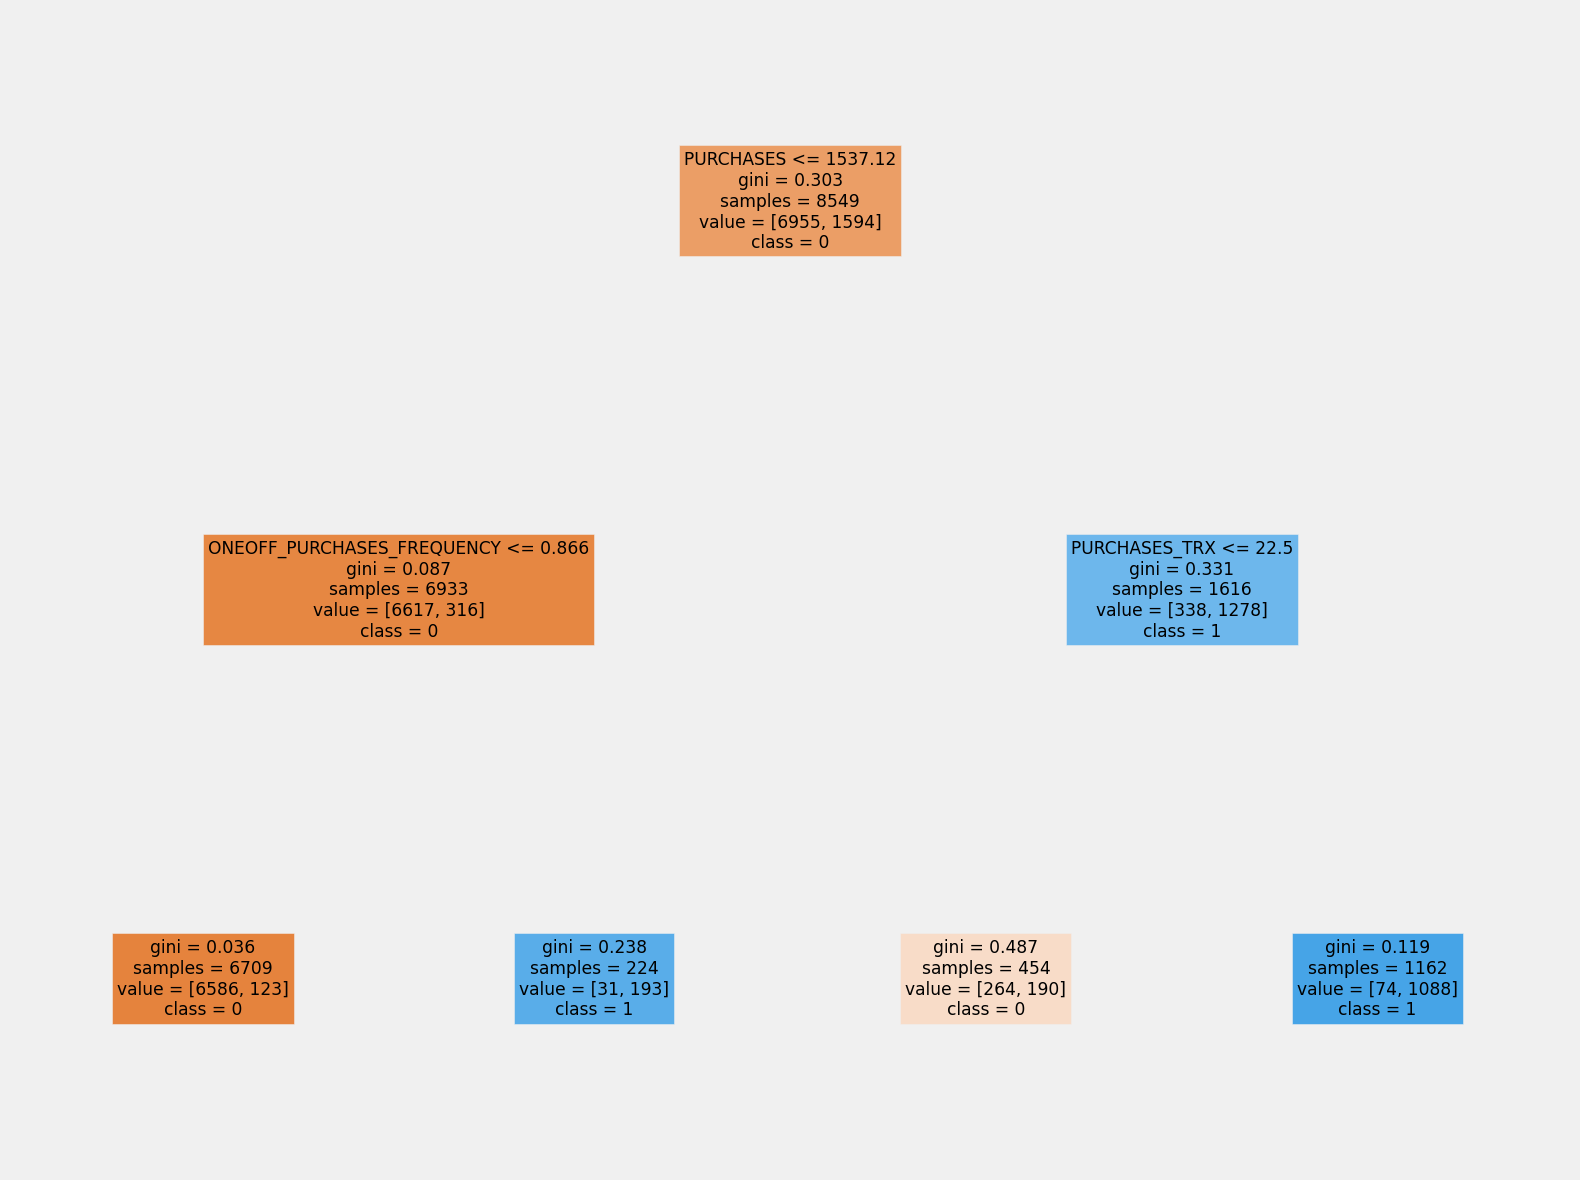

In [140]:
##visualization desision tree to find features that efect on decision
from sklearn import tree
from sklearn.model_selection  import train_test_split
X = df_cluster_with_kmediods. drop('cluster', axis =1)
y = df_cluster_with_kmediods['cluster']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.01,random_state=1)
clf = DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
feature_names = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY',
                'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX',
                'CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
target_names =['0','1']
fig = plt.figure(figsize=(25,20))
plot = tree.plot_tree(clf,
                     feature_names = feature_names,
                     class_names = target_names,
                     filled = True)
fig.savefig("Tree1.png")

### تفسیر کلاسها با توجه به درخت تصمیم 
افراد بیشتر در کلاس دو طبقه بندی می شوند

class 0:ONEOFF_PURCHASES_FREQUENCY <= 0.866 and PURCHASES <= 1537

کلاس صفر شامل 7029 نفر است که این افراد مقدار خریدهای انجام شده از حساب کمتر از 1537  است و تعداد دفعات خرید یکباره
 از 0.866 کمتر است

class 1:(PURCHASES_TRX <= 22.5) and (PURCHASES > 1537)

کلاس یک شامل 1607 نفر است که این افراد مقدار خریدهای انجام شده از حساب بیشتر از1664 است و همچنین تعداد تراکنشهای خرید کمتر از 22.5 است 


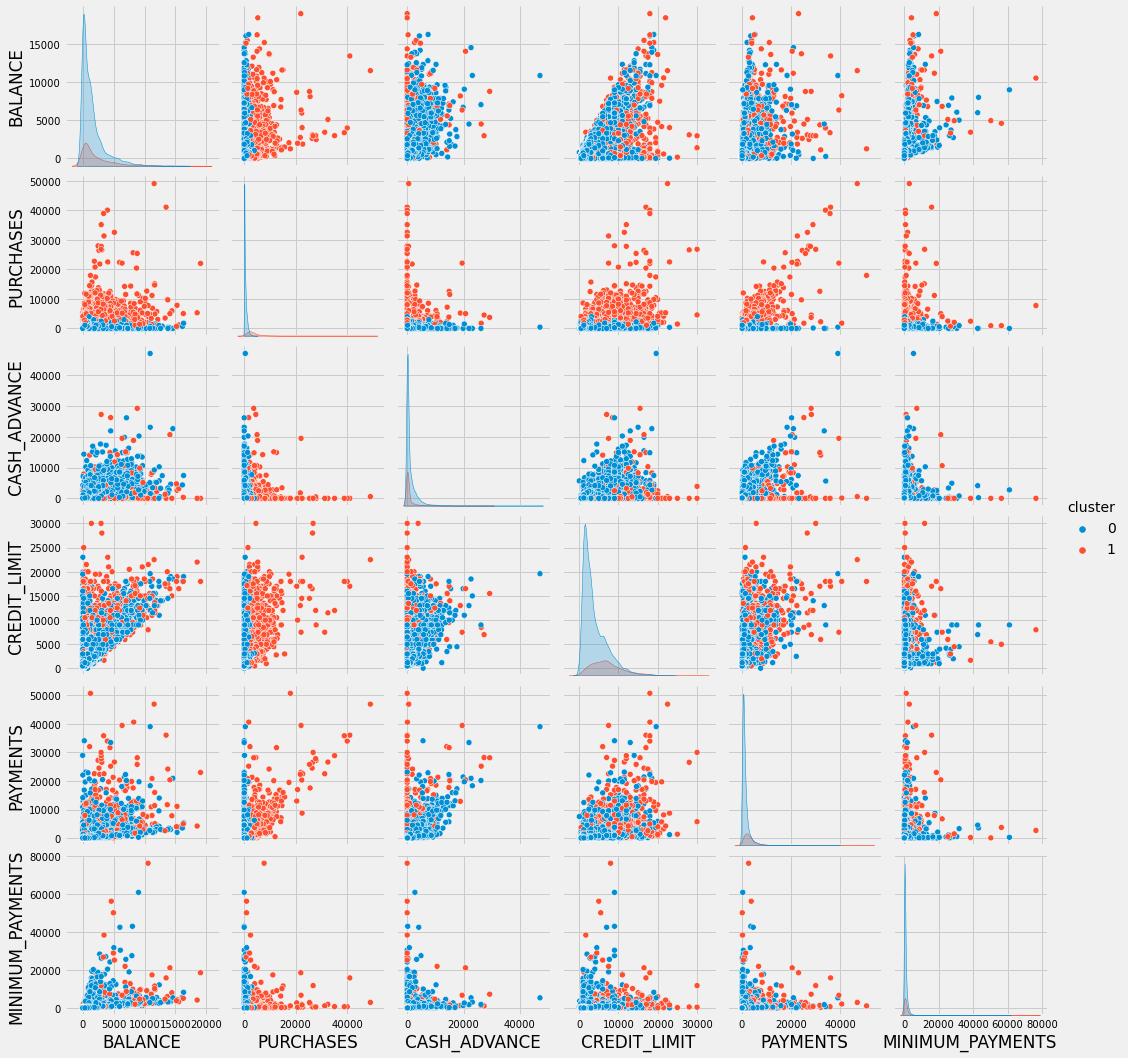

In [141]:
#در این قسمت چندین فیجر که پیوسته هستند را انتخاب می کنم تا نحوه ی کلاستربندی آنها را نیز مشاهده کنم
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","cluster"]
sns.pairplot( df_cluster_with_kmediods[ best_cols ], hue="cluster")